## OA and sizedistribution plots: ATTO station

In [154]:
%load_ext autoreload

%autoreload 2

The autoreload extension is already loaded. To reload it, use:
  %reload_ext autoreload


In [155]:
from pathlib import Path
from bs_fdbck.util.BSOA_datamanip import ds2df_inc_preprocessing, ds2df_echam
from bs_fdbck.util.collocate.collocateLONLAToutput import CollocateLONLATout
from bs_fdbck.util.collocate.collocate_echam_salsa import CollocateModelEcham
import useful_scit.util.log as log
from bs_fdbck.util.plot.BSOA_plots import make_cool_grid, plot_scatter
log.ger.setLevel(log.log.INFO)
import time
import xarray as xr
import matplotlib.pyplot as plt

In [156]:
import pandas as pd

In [157]:
from bs_fdbck.constants import path_measurement_data

In [158]:

import numpy as np



In [159]:

select_station = 'ATTO'

In [160]:
plot_path = Path(f'Plots/{select_station}')

In [161]:
def make_fn_scat(case, v_x, v_y):
    _x = v_x.split('(')[0]
    _y = v_y.split('(')[0]
    f = f'scat_all_years_echam_noresm_{case}_{_x}_{_y}-ATTO_ukesm.png'
    return plot_path /f

In [162]:
plot_path.mkdir(exist_ok=True, parents=True)

In [163]:
plot_path

PosixPath('Plots/ATTO')

In [164]:
from bs_fdbck.constants import path_measurement_data
postproc_data = path_measurement_data /'model_station'/select_station
postproc_data_obs = path_measurement_data /select_station/'processed'

In [165]:
fn_obs_comb_data_full_time =postproc_data_obs /'ATTO_data_comb_hourly.nc'

# Load observational data: 

In [166]:
postproc_data_obs = path_measurement_data /'ATTO'/'processed'

In [167]:


ds_ATTO = xr.open_dataset(fn_obs_comb_data_full_time)

In [168]:
fn_obs_comb_data_full_time

PosixPath('/proj/bolinc/users/x_sarbl/analysis/BS-FDBCK/Data/ATTO/processed/ATTO_data_comb_hourly.nc')

# Read in model data:

In [169]:
models = ['ECHAM-SALSA','NorESM']
mod2cases = {'ECHAM-SALSA':['SALSA_BSOA_feedback'],
             'NorESM':['OsloAero_intBVOC_f09_f09_mg17_fssp']
            }
di_mod2cases = mod2cases.copy()

In [170]:
select_station='ATTO'

In [171]:
dic_df_pre=dict()
for mod in models:
    print(mod)
    dic_df_pre[mod] = dict()
    for ca in mod2cases[mod]:
        print(mod, ca)
        fn_out = postproc_data/f'{select_station}_station_{mod}_{ca}.csv'
        print(fn_out)
        dic_df_pre[mod][ca] = pd.read_csv(fn_out, index_col=0)
        dic_df_pre[mod][ca].index = pd.to_datetime(dic_df_pre[mod][ca].index)
        #dic_df_mod_case[mod][ca].to_csv(fn_out)

ECHAM-SALSA
ECHAM-SALSA SALSA_BSOA_feedback
/proj/bolinc/users/x_sarbl/analysis/BS-FDBCK/Data/model_station/ATTO/ATTO_station_ECHAM-SALSA_SALSA_BSOA_feedback.csv
NorESM
NorESM OsloAero_intBVOC_f09_f09_mg17_fssp
/proj/bolinc/users/x_sarbl/analysis/BS-FDBCK/Data/model_station/ATTO/ATTO_station_NorESM_OsloAero_intBVOC_f09_f09_mg17_fssp.csv


## Read in observations

In [172]:
ds_ATTO = xr.open_dataset(fn_obs_comb_data_full_time, engine='netcdf4')

In [173]:
ds_ATTO = ds_ATTO.sel(time_traj=0)

In [174]:
varl = ['Pressure_reanalysis', 'Potential_Temperature_reanalysis', 'Temperature_reanalysis', 'Rainfall', 'Mixing_Depth', 'Relative_Humidity', 'Specific_Humidity_reanalysis',
 'Mixing_Ratio','Solar_Radiation', 'condensation_sink', 'N50-500', 'N100-500', 'N200-500', 'timeUTC-3', 'pressure', 'temperature', 'humidity','wind_dir','precip','Solar_inc_Wm2',
        'Solar_out_Wm2','wind_speed','wind_speed_v','OA'
]
ds_ATTO[varl].squeeze().to_dataframe()

,Pressure_reanalysis,Potential_Temperature_reanalysis,Temperature_reanalysis,Rainfall,Mixing_Depth,Relative_Humidity,Specific_Humidity_reanalysis,Mixing_Ratio,Solar_Radiation,condensation_sink,...,temperature,humidity,wind_dir,precip,Solar_inc_Wm2,Solar_out_Wm2,wind_speed,wind_speed_v,OA,time_traj
time,,,,,,,,,,,,,,,,,,,,,
2014-03-10 15:00:00,974.8,305.5,303.3,0.0,1437.6,55.1,15.1,15.4,681.2,0.001503,...,31.789,58.941,47.075,0.0,654.9700,67.26400,1.666302,1.791586,0.990,0
2014-03-10 16:00:00,974.1,305.5,303.2,0.0,1268.8,56.0,15.2,15.6,596.6,0.001285,...,30.779,64.285,89.357,0.0,212.0300,24.31200,0.036363,3.240096,1.620,0
2014-03-10 17:00:00,974.9,304.5,302.3,0.0,863.0,60.5,15.6,16.0,504.7,0.001317,...,28.459,69.707,27.566,0.0,65.0100,7.28400,2.293319,1.197186,1.660,0
2014-03-10 18:00:00,975.8,303.5,301.4,0.0,453.1,65.1,15.9,16.3,412.7,0.001469,...,27.532,79.319,124.100,0.0,2.3303,0.36233,1.313185,1.939566,0.985,0
2014-03-10 19:00:00,976.6,302.5,300.5,0.0,43.2,69.7,16.1,16.6,320.7,0.001441,...,26.475,88.807,132.140,0.0,0.0000,0.00000,1.981098,2.189450,2.420,0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
2019-01-28 05:00:00,979.4,298.0,296.2,0.0,254.7,85.8,15.3,15.7,18.9,0.000014,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,0
2019-01-28 06:00:00,980.0,297.9,296.2,0.0,363.3,88.0,15.7,16.1,38.1,0.000013,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,0
2019-01-28 07:00:00,980.7,297.8,296.1,0.0,472.0,90.2,16.0,16.4,57.4,0.000011,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,0


In [175]:
dic_df_pre['Observations'] = dict()
dic_df_pre['Observations']['Observations'] = ds_ATTO[varl].squeeze().to_dataframe()
dic_df_pre['Observations']['Observations'].index = pd.to_datetime(dic_df_pre['Observations']['Observations'].index)

In [176]:
mod2cases['Observations'] = ['Observations']

In [177]:
dic_mod_ca = dic_df_pre.copy()

<AxesSubplot:xlabel='time'>

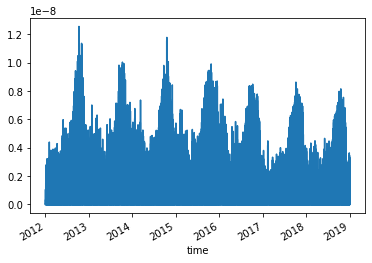

In [178]:
_ds =dic_mod_ca['ECHAM-SALSA']['SALSA_BSOA_feedback']

_ds =dic_mod_ca['NorESM'][mod2cases['NorESM'][0]]

_ds['SFisoprene'].plot()

### Save result in dictionary

In [179]:
dic_df_mod_case = di_mod2cases
for mo in models:
    cs = mod2cases[mo]
    for c in cs: 
        if len(cs)>1:
            use_name = f'{mo}_{c}'
        else:
            use_name =mo

In [180]:
dic_df_mod_case = dic_mod_ca.copy()

In [181]:
from bs_fdbck.util.BSOA_datamanip import calculate_daily_median_summer,calculate_summer_median, ds2df_ukesm

### Calculate Nx-500:


In [182]:
for mod in models:
    if mod=='UKESM':
        continue
    print(mod)
    for ca in dic_df_mod_case[mod].keys():
        print(ca)
        _df = dic_df_mod_case[mod][ca]
        for v in ['N50','N100','N200']:
            _df[f'{v}-500'] = _df[v] -_df['N500'] 
        dic_df_mod_case[mod][ca] = _df

ECHAM-SALSA
SALSA_BSOA_feedback
NorESM
OsloAero_intBVOC_f09_f09_mg17_fssp


# Merge with observations:

In [183]:
dic_df_pre = dict()#dic_df_mod_case.copy()#deep=True)
for mod in dic_df_mod_case.keys():
    dic_df_pre[mod] = dic_df_mod_case[mod].copy()

In [184]:
vars_obs = ['OA', 'N100-500','N50-500','N200-500','temperature']

In [185]:
ds_ATTO

<xarray.Dataset>
Dimensions:                           (time: 25448, D: 104, timeUTC: 25448, timeUTC-4: 25448)
Coordinates:
  * time                              (time) datetime64[ns] 2014-03-10T15:00:...
  * D                                 (D) float64 10.2 10.6 10.9 ... 399.5 414.2
    time_traj                         int64 0
  * timeUTC                           (timeUTC) datetime64[ns] 2014-03-10T19:...
  * timeUTC-4                         (timeUTC-4) datetime64[ns] 2014-03-10T1...
Data variables: (12/31)
    pnsd                              (time, D) float64 ...
    Pressure_reanalysis               (time) float64 974.8 974.1 ... 980.7 978.3
    Potential_Temperature_reanalysis  (time) float64 305.5 305.5 ... 301.9 304.3
    Temperature_reanalysis            (time) float64 303.3 303.2 ... 300.2 302.4
    Rainfall                          (time) float64 0.0 0.0 0.0 ... 0.0 0.0 0.0
    Mixing_Depth                      (time) float64 1.438e+03 ... 1.589e+03
    ...                                ...
    precip                            (time) float64 0.0 0.0 0.0 ... nan nan nan
    Solar_inc_Wm2                     (time) float64 655.0 212.0 ... nan nan
    Solar_out_Wm2                     (time) float64 67.26 24.31 ... nan nan
    wind_speed                        (time) float64 1.666 0.03636 ... nan nan
    wind_speed_v                      (time) float64 1.792 3.24 ... nan nan
    OA                                (time) float64 0.99 1.62 1.66 ... nan nan

In [186]:
df_ATTO = ds_ATTO[vars_obs].drop('time_traj').to_dataframe()

In [187]:
df_ATTO['some_obs_missing'] = df_ATTO.isnull().any(axis=1)

In [188]:
df_for_merge = df_ATTO[['OA','N100-500', 'some_obs_missing']].rename({'OA':'obs_OA','N100-500':'obs_N100-500',},axis=1)

In [189]:
for mod in dic_df_mod_case.keys():
    print(mod)
    for ca in dic_df_mod_case[mod].keys():
        dic_df_mod_case[mod][ca] = pd.merge(dic_df_pre[mod][ca], df_for_merge ,right_on='time', left_on='time', how='outer')
        dic_df_mod_case[mod][ca]['year'] = dic_df_mod_case[mod][ca].index.year

ECHAM-SALSA
NorESM
Observations


In [190]:
df_ATTO_obs_rename = df_ATTO.rename({'Org':'OA','temperature':'T_C'}, axis=1)

In [191]:
df_ATTO_obs_rename

,OA,N100-500,N50-500,N200-500,T_C,some_obs_missing
time,,,,,,
2014-03-10 15:00:00,0.990,261.098544,316.905190,127.278078,31.789,False
2014-03-10 16:00:00,1.620,222.251370,288.874999,105.323757,30.779,False
2014-03-10 17:00:00,1.660,224.833282,295.380458,107.522264,28.459,False
2014-03-10 18:00:00,0.985,244.399264,324.013175,123.680268,27.532,False
2014-03-10 19:00:00,2.420,237.142437,324.176730,120.145547,26.475,False
...,...,...,...,...,...,...
2019-01-28 05:00:00,NaN,2.436371,2.887577,1.192095,NaN,True
2019-01-28 06:00:00,NaN,2.164401,2.189073,1.299269,NaN,True
2019-01-28 07:00:00,NaN,1.913617,2.090813,0.994331,NaN,True


## Add observations to dictionary

In [192]:
dic_df_mod_case['Observations'] = dict()
dic_df_mod_case['Observations']['Observations'] = df_ATTO_obs_rename

In [193]:
dic_df_mod_case['Observations'].keys()

dict_keys(['Observations'])

In [194]:
dic_mod2case = mod2cases

In [195]:
def add_log(df, varl=None):
    if varl is None:
        varl = ['OA','N100', 'Org','N100 (cm^-3)','N50','N150','N200']
    var_exist = df.columns
    
    varl_f = set(varl).intersection(var_exist)
    print(varl_f)
    for v in varl_f:
        df[f'log10({v})'] = np.log10(df[v])
    return df


for mod in dic_df_mod_case.keys():
    for c in dic_df_mod_case[mod].keys():
    
        dic_df_mod_case[mod][c] = add_log(dic_df_mod_case[mod][c])
        #dic_dfsm_mod_case[mod][c] = add_log(dic_dfsm_mod_case[mod][c])
        
df_ATTO = add_log(df_ATTO)

{'N200', 'N100', 'N50', 'OA'}
{'N100', 'N50', 'N200', 'N150', 'OA'}
{'OA'}
{'OA'}


/home/x_sarbl/miniconda3/envs/env_analys/lib/python3.8/site-packages/pandas/core/arraylike.py:397: RuntimeWarning: divide by zero encountered in log10
  result = getattr(ufunc, method)(*inputs, **kwargs)
/home/x_sarbl/miniconda3/envs/env_analys/lib/python3.8/site-packages/pandas/core/arraylike.py:397: RuntimeWarning: invalid value encountered in log10
  result = getattr(ufunc, method)(*inputs, **kwargs)
/home/x_sarbl/miniconda3/envs/env_analys/lib/python3.8/site-packages/pandas/core/arraylike.py:397: RuntimeWarning: divide by zero encountered in log10
  result = getattr(ufunc, method)(*inputs, **kwargs)
/home/x_sarbl/miniconda3/envs/env_analys/lib/python3.8/site-packages/pandas/core/arraylike.py:397: RuntimeWarning: invalid value encountered in log10
  result = getattr(ufunc, method)(*inputs, **kwargs)


In [196]:
mod='NorESM'

In [197]:
ca = mod2cases[mod][0]

In [198]:
mask_obs_N = dic_df_mod_case[mod][ca]['obs_N100-500'].notnull()
mask_obs_OA = dic_df_mod_case[mod][ca]['obs_OA'].notnull()

## Compute daily medians:

In [199]:
dic_df_med = dict()
for mo in dic_df_mod_case.keys():
    for ca in dic_df_mod_case[mo].keys():
        if len(dic_df_mod_case[mo].keys())>1:
            use_name = f'{mo}_{ca}'
        else:
            use_name = mo
            
        _df = dic_df_mod_case[mo][ca]
        
        _df = _df[_df['some_obs_missing']==False]
        dic_df_med[use_name] = _df.resample('D').median()

In [200]:
from bs_fdbck.util.plot.BSOA_plots import cdic_model
import seaborn as sns
from matplotlib import pyplot as plt, gridspec as gridspec
from bs_fdbck.util.plot.BSOA_plots import make_cool_grid2, make_cool_grid3
import scipy

### Fit funcs

In [201]:
from bs_fdbck.util.BSOA_datamanip.fits import *
from bs_fdbck.util.BSOA_datamanip.atto import season2month

### season to monthseason2month

In [202]:
def select_months(df, season = None, month_list=None):
    if season is not None: 
        month_list = season2month[season]
    

    df['month'] = df.index.month
    return df['month'].isin(month_list)

In [203]:
from bs_fdbck.util.BSOA_datamanip.fits import *

In [204]:
from bs_fdbck.util.plot.BSOA_plots import cdic_model

ECHAM-SALSA
88


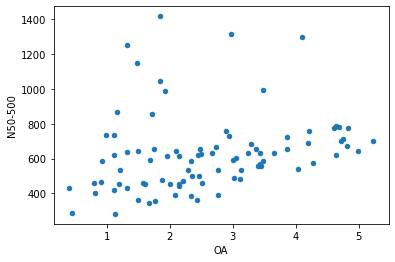

NorESM
88


<AxesSubplot:xlabel='time'>

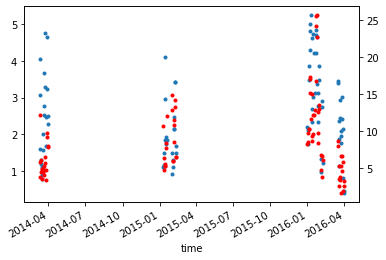

In [205]:
season = 'JFM'
mo ='ECHAM-SALSA'
df_s2 =  dic_df_med[mo]
print(mo)
mask_months = select_months(df_s2, season=season)
df_s2 = df_s2[mask_months].copy()
print(len(df_s2.dropna()))

df_s2.plot.scatter(x='OA',y='N50-500')
plt.show()
fi, ax = plt.subplots()
df_s2['OA'].plot(marker='.',linewidth=0)

season = 'JFM'
mo ='NorESM'
df_s1 =  dic_df_med[mo]
print(mo)
mask_months = select_months(df_s1, season=season)
df_s1 = df_s1[mask_months].copy()
print(len(df_s1.dropna()))
df_s1['OA'].plot(marker='.', linewidth=0, ax=ax.twinx(), c='r')

ECHAM-SALSA
88


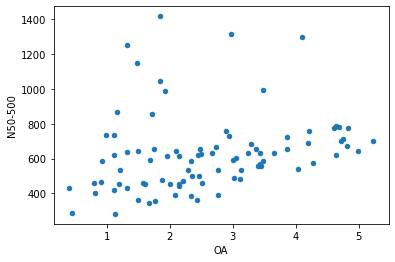

NorESM
88


<AxesSubplot:xlabel='time'>

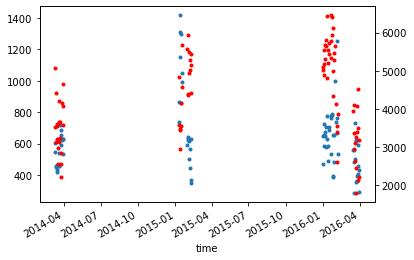

In [206]:
season = 'JFM'
mo ='ECHAM-SALSA'
df_s2 =  dic_df_med[mo]
print(mo)
mask_months = select_months(df_s2, season=season)
df_s2 = df_s2[mask_months].copy()
print(len(df_s2.dropna()))

df_s2.plot.scatter(x='OA',y='N50-500')
plt.show()
fi, ax = plt.subplots()
df_s2['N50-500'].plot(marker='.',linewidth=0)

season = 'JFM'
mo ='NorESM'
df_s1 =  dic_df_med[mo]
print(mo)
mask_months = select_months(df_s1, season=season)
df_s1 = df_s1[mask_months].copy()
print(len(df_s1.dropna()))
df_s1['N50-500'].plot(marker='.', linewidth=0, ax=ax.twinx(), c='r')

# PLOTS

In [207]:
models_and_obs =  models + ['Observations'] 

## T to OA

In [208]:
label_dic =dict(
    T_C=r'T  [$^\circ$C]',
    OA =r'OA [$\mu g m^{-3}$]',
)

## Define grid

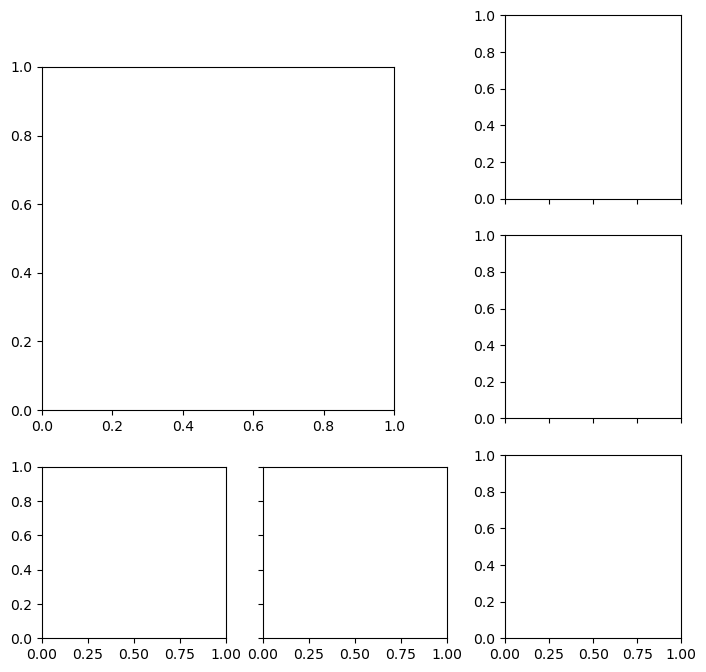

In [209]:

def make_cool_grid5(figsize=None,
                    width_ratios=None,
                    ncols=1,
                    nrows=1,
                    num_subplots_per_big_plot=2,
                    size_big_plot=5,
                    add_gs_kw=None,
                    sharex='col',
                    sharey='row',
                    
                    w_plot = 5.,
                    w_cbar = 1,
                    w_ratio_sideplot = 0.6,
                    frac_dist_axis_from_big = .15
                    ):
    width_small_plot = size_big_plot/num_subplots_per_big_plot
    width_dist_ax = size_big_plot*frac_dist_axis_from_big
    
    if figsize is None:
        
        figsize = [size_big_plot + width_small_plot+ width_dist_ax,
                   size_big_plot + width_small_plot+ width_dist_ax,
                  ]
    #figsize=[10,10]
    width_ratios = None
    add_gs_kw = None

    if width_ratios is None:
        width_ratios = [1] * ncols + [w_cbar / w_plot] #+ [1]* ncols_extra
    if add_gs_kw is None:
        add_gs_kw = dict()


    if 'hspace' not in add_gs_kw.keys():
        add_gs_kw['hspace'] = 0
    if 'wspace' not in add_gs_kw.keys():
        add_gs_kw['wspace'] = 0


    # add_gs_kw['width_ratios'] = width_ratios
    fig = plt.figure(figsize=figsize,
                     dpi=100)

    #gs = fig.add_gridspec(nrows, ncols, **add_gs_kw)

    
    w_r1 = [size_big_plot,size_big_plot*frac_dist_axis_from_big]
    h_r1 = [frac_dist_axis_from_big,1, ]
    
    gs0 = gridspec.GridSpec(2, 2, figure=fig, height_ratios= [size_big_plot+width_dist_ax,width_small_plot],
                            width_ratios = [size_big_plot+width_dist_ax,width_small_plot])
    #fig.show()
    
    gs00 = gridspec.GridSpecFromSubplotSpec(nrows+1, ncols+1, width_ratios=w_r1, height_ratios=h_r1, subplot_spec=gs0[0,0], **add_gs_kw)
    # for the small plots:
    gs01 = gridspec.GridSpecFromSubplotSpec(num_subplots_per_big_plot+1,1, subplot_spec=gs0[:,1])#, **add_gs_kw)
    gs03 = gridspec.GridSpecFromSubplotSpec(1,num_subplots_per_big_plot, subplot_spec=gs0[1,:1])#, **add_gs_kw)

    # gs_s = gs[:,:(ncols+1)].subgridspec(nrows=nrows, ncols=ncols, wspace=add_gs_kw['wspace'], hspace=add_gs_kw['hspace'])
    axs = gs00.subplots(sharex=sharex, sharey=sharey, )
    axs_extra = gs01.subplots(sharex=sharex, sharey=sharey, )
    axs_extra2 = gs03.subplots(sharex=sharex, sharey=sharey, )
    axs_extra = np.concatenate((axs_extra, axs_extra2,))
    axs[0,1].clear()
    axs[0,1].axis("off")
    daxs = dict(x=axs[0,0],y=axs[1,1])
    # distribution axis
    for a in daxs:
        _ax = daxs[a]
        sns.despine(bottom=False, left=False, ax=_ax)
        _ax.axis("off")
    #daxs = [dax1,dax2]
    #axs = np.array(axs)

    ax = axs[1,0]


    return fig, ax, daxs, axs_extra


fig, ax, daxs, axs_extra = make_cool_grid5(#ncols_extra=1, nrows_extra=1
                                           )# w_ratio_sideplot=.5)
#for ax_e in axs_extra:
#    ax_e.set_xlabel('')
#    ax_e.set_ylabel('')
#    ax_e.set_ylim(ax.get_ylim())
#    ax_e.set_xlim(ax.get_xlim())
#    ax_e.axes.xaxis.set_ticklabels([])
#    ax_e.axes.yaxis.set_ticklabels([])

#    sns.despine(ax = ax_e)



## Make plot

In [210]:
def make_plot(v_x, v_y, xlims, ylims, season, 
              xlab=None, ylab=None, alpha_scat=.3,
             source_list = models_and_obs, fig=None, ax=None, daxs=None, axs_extra=None,
              xscale='linear', yscale='linear',
              dic_df_med = dic_df_med,
             ):
    if fig is None: 
        fig, ax, daxs, axs_extra = make_cool_grid3(ncols_extra=2, nrows_extra=3,)# w_ratio_sideplot=.5)

    if xlab is None: 
        if xlab in label_dic:
            xlab = label_dic[v_x]
    if ylab is None: 
        if ylab in label_dic:
            ylab = label_dic[v_y]

    for mo, ax_ex in zip(models_and_obs, axs_extra[:]):
        df_s =  dic_df_med[mo]

        mask_months = select_months(df_s, season=season)
        df_s = df_s[mask_months].copy()


        sns.scatterplot(x=v_x,y=v_y, 
                    data = df_s, 
                    color=cdic_model[mo], 
                    alpha=alpha_scatt*.7, 
                    label='__nolegend__',
                    ax = ax,
                    #facecolor='none',
                    edgecolor=cdic_model[mo],
                        marker='.',
                    
                   )
        sns.scatterplot(x=v_x,y=v_y, 
                    data = df_s, 
                    color=cdic_model[mo], 
                    alpha=alpha_scatt+.1, 
                    label='__nolegend__',
                    ax = ax_ex,
                    #facecolor='none',
                    edgecolor=cdic_model[mo],
                        marker='.',
                    
                    
                   )
        ax_ex.set_title(mo, y=.95)
        
    ax.set_xlabel(xlab)
    ax.set_ylabel(ylab)
    fig.suptitle(f'ATTO, {season} season, 2012-2018', y=.95)
    xlim_dist = list(daxs['y'].get_xlim())
    for mo in models_and_obs:

        df_s =  dic_df_med[mo]

        mask_months = select_months(df_s, season=season)
        df_s = df_s[mask_months].copy()
        if xscale=='log':
            xbins = np.logspace(np.log10(xlims[0]),np.log10(xlims[1]),20)
        else:
            xbins = np.linspace(xlims[0],xlims[1],20)
            
        if yscale=='log':
            ybins = np.logspace(np.log10(ylims[0]),np.log10(ylims[1]),20)
        else:
            ybins = np.linspace(ylims[0],ylims[1],20)
            

        sns.histplot(#x=v_x,
                    x= df_s[v_x], 
            edgecolor=cdic_model[mo],
            #log_scale=(xscale=='log'),
            color=cdic_model[mo], 
            element="step",
            label=mo,
            linewidth=1,
            #log_scale=(xscale=='log',False,),

            alpha=.1,
            bins=xbins,
            ax = daxs['x'],
                    
                   )
        print(daxs['x'].get_ylim())
        _fi, ax_test = plt.subplots();
        ax_test = sns.histplot(#x=v_x,
            y=df_s[v_y],
            color=cdic_model[mo], 
            element="step",
            label=mo,
            ax = ax_test,
            #ax = daxs['y'],
            linewidth=2,
            
            #edgecolor=None,
            #log_scale=(False,yscale=='log'),
            alpha=.1,
            bins=ybins,
        );
        
        sns.histplot(#x=v_x,
            y=df_s[v_y],
            color=cdic_model[mo], 
            element="step",
            label=mo,
            ax = daxs['y'],
            linewidth=1,
            
            #edgecolor=None,
            #log_scale=(xscale=='log',yscale=='log'),
            #log_scale=(False,yscale=='log'),
            
            alpha=.1,
            bins=ybins,
            )
        xlim_dist_n = list(ax_test.get_xlim())
        _fi.clf()
        #if xlim_dist_n[1]>xlim_dist_n[1]:
        xlim_dist[1] = max(xlim_dist_n[1],xlim_dist[1])
        #daxs['y'].set_xlim([0,xlim_dist[1]])
        
        #plt.show()

    ax.set_ylim(ylims)
    ax.set_xlim(xlims)


    for ax_e in axs_extra:
        ax_e.set_xlabel('')
        ax_e.set_ylabel('')
        ax_e.set_ylim(ax.get_ylim())
        ax_e.set_xlim(ax.get_xlim())
        ax_e.axes.xaxis.set_ticklabels([])
        ax_e.axes.yaxis.set_ticklabels([])

        sns.despine(ax = ax_e)

    return

#### WET_mid

## T to OA, exp

### DJF

(0.0, 18.9)
(0.0, 18.9)
(0.0, 18.9)
ECHAM-SALSA
Beta: [0.10491981 0.09917061]
Beta Std Error: [0.05621047 0.01535368]
Beta Covariance: [[ 0.00287565 -0.00078376]
 [-0.00078376  0.00021455]]
Residual Variance: 1.0987481369874603
Inverse Condition #: 0.0014710318604772962
Reason(s) for Halting:
  Sum of squares convergence
[0.10491981 0.09917061]
NorESM
Beta: [1.52510865e-04 4.07831481e-01]
Beta Std Error: [0.00038961 0.09330321]
Beta Covariance: [[ 3.31879493e-08 -7.94281392e-06]
 [-7.94281392e-06  1.90332133e-03]]
Residual Variance: 4.573840661358877
Inverse Condition #: 0.0016908268618433333
Reason(s) for Halting:
  Sum of squares convergence
[1.52510865e-04 4.07831481e-01]
Observations
Beta: [1.55259053e-14 1.19616734e+00]
Beta Std Error: [3.53587002e-15 0.00000000e+00]
Beta Covariance: [[4.93174902e-30 0.00000000e+00]
 [0.00000000e+00 0.00000000e+00]]
Residual Variance: 2.5350796985516886
Inverse Condition #: 1.0
Reason(s) for Halting:
  Problem is not full rank at solution
  Sum of

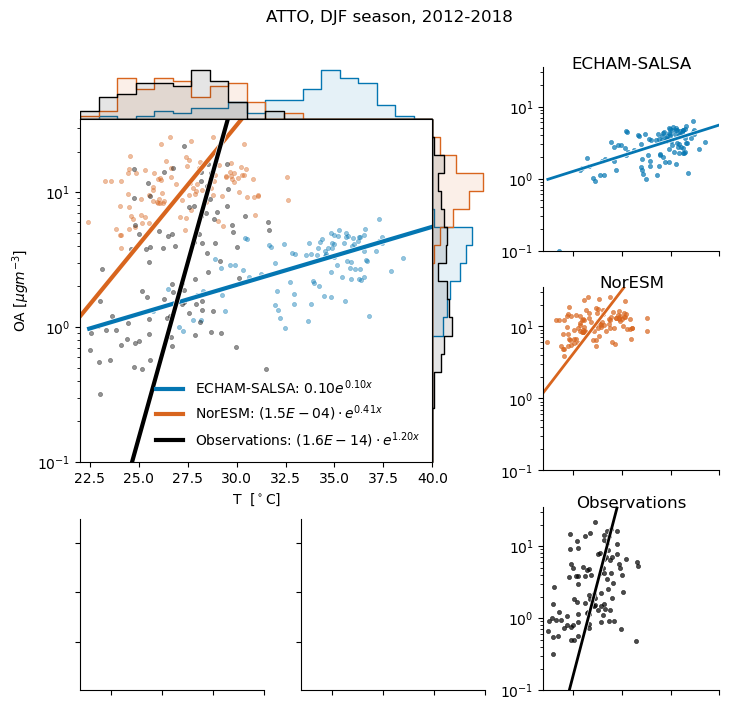

<Figure size 432x288 with 0 Axes>

<Figure size 432x288 with 0 Axes>

<Figure size 432x288 with 0 Axes>

In [211]:
fig, ax, daxs, axs_extra = make_cool_grid5()##ncols_extra=2, nrows_extra=2,)# w_ratio_sideplot=.5)
axs_extra = axs_extra.flatten()

## Settings
alpha_scatt = 0.6

xlab = r'T  [$^\circ$C]'
ylab = r'OA [$\mu g m^{-3}$]'


linewidth=2
xlims = [22,40]
ylims = [.1,35]


season='DJF'
v_x = 'T_C'
v_y = 'OA'


make_plot(v_x, v_y, xlims, ylims, season, 
              xlab, ylab, .3, models_and_obs, fig, ax, daxs, axs_extra,
          yscale='log',
         
         )


for mo, ax_ex in zip(models_and_obs, axs_extra[:]):
    df_s =  dic_df_med[mo]
    print(mo)
    mask_months = select_months(df_s, season=season)
    df_s = df_s[mask_months].copy()
    popt, pov, label, func = get_odr_fit_and_labs(df_s, v_x, v_y, fit_func = 'exp', return_func=True, beta0=[0.01,.12])
    _mi = df_s[v_x].min()
    _ma = df_s[v_x].max() 
    _xlim = [_mi*.95, _ma*1.05]
    x = np.linspace(*_xlim)
    
    ax.plot(x, func(x, *popt), c='w', linewidth=linewidth+2,label='__nolegend__')
    ax.plot(x, func(x, *popt), linewidth=linewidth+1, c=cdic_model[mo],label=f'{mo}: {label}')

    ax_ex.plot(x, func(x, *popt), c='w', linewidth=linewidth+1,label=f'{mo}: {label}',
             )
    ax_ex.plot(x, func(x, *popt), c=cdic_model[mo],label=f'{mo}: {label}',
               linewidth=linewidth,
              )
    ax_ex.set_yscale('log')
ax.set_yscale('log')


    
fn = make_fn_scat(f'exp1_{season}', v_x, v_y)
ax.legend(frameon=False)
fig.savefig(fn, dpi=150)
fig.savefig(fn.with_suffix('.pdf'), dpi=150)



plt.show()

### JFM

(0.0, 13.65)
(0.0, 27.3)
(0.0, 27.3)
ECHAM-SALSA
Beta: [0.4633526  0.05329703]
Beta Std Error: [0.21202906 0.01367967]
Beta Covariance: [[ 0.03528575 -0.00226497]
 [-0.00226497  0.00014688]]
Residual Variance: 1.2740643739164037
Inverse Condition #: 0.0005392082392175069
Reason(s) for Halting:
  Sum of squares convergence
[0.4633526  0.05329703]
NorESM
Beta: [2.29584647e-04 4.00128897e-01]
Beta Std Error: [0.00030496 0.05075217]
Beta Covariance: [[ 4.35690575e-08 -7.24166625e-06]
 [-7.24166625e-06  1.20673445e-03]]
Residual Variance: 2.1345069113215858
Inverse Condition #: 0.003414177020625921
Reason(s) for Halting:
  Sum of squares convergence
[2.29584647e-04 4.00128897e-01]
Observations
Beta: [8.46223608e-06 4.53498909e-01]
Beta Std Error: [9.52991934e-06 4.08997500e-02]
Beta Covariance: [[ 1.74082666e-10 -7.45635277e-07]
 [-7.45635277e-07  3.20640507e-03]]
Residual Variance: 0.5217025032111752
Inverse Condition #: 0.00017538259611959292
Reason(s) for Halting:
  Sum of squares conver

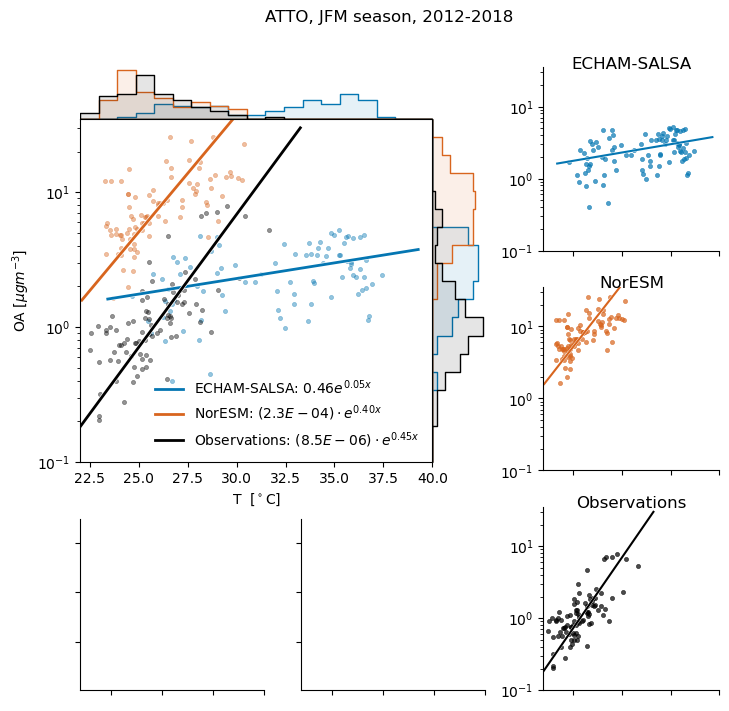

<Figure size 432x288 with 0 Axes>

<Figure size 432x288 with 0 Axes>

<Figure size 432x288 with 0 Axes>

In [212]:
fig, ax, daxs, axs_extra = make_cool_grid5()##ncols_extra=2, nrows_extra=2,)# w_ratio_sideplot=.5)
axs_extra = axs_extra.flatten()

## Settings
alpha_scatt = 0.6

xlab = r'T  [$^\circ$C]'
ylab = r'OA [$\mu g m^{-3}$]'



xlims = [22,40]
ylims = [.1,35]


season='JFM'
v_x = 'T_C'
v_y = 'OA'


make_plot(v_x, v_y, xlims, ylims, season, 
              xlab, ylab, .3, models_and_obs, fig, ax, daxs, axs_extra,
          yscale='log',
         
         )


for mo, ax_ex in zip(models_and_obs, axs_extra[:]):
    df_s =  dic_df_med[mo]
    print(mo)
    mask_months = select_months(df_s, season=season)
    df_s = df_s[mask_months].copy()
    popt, pov, label, func = get_odr_fit_and_labs(df_s, v_x, v_y, fit_func = 'exp', return_func=True, beta0=[0.01,.12])
    _mi = df_s[v_x].min()
    _ma = df_s[v_x].max() 
    _xlim = [_mi*.95, _ma*1.05]
    x = np.linspace(*_xlim)
    
    ax.plot(x, func(x, *popt), c='w', linewidth=3,label='__nolegend__')
    ax.plot(x, func(x, *popt), linewidth=2, c=cdic_model[mo],label=f'{mo}: {label}')

    ax_ex.plot(x, func(x, *popt), c='w', linewidth=2,label=f'{mo}: {label}',
             )
    ax_ex.plot(x, func(x, *popt), c=cdic_model[mo],label=f'{mo}: {label}',
              )
    ax_ex.set_yscale('log')
ax.set_yscale('log')


    
fn = make_fn_scat(f'exp1_{season}', v_x, v_y)
ax.legend(frameon=False)
fig.savefig(fn, dpi=150)
fig.savefig(fn.with_suffix('.pdf'), dpi=150)



plt.show()

### WET

(0.0, 39.9)
(0.0, 58.8)
(0.0, 58.8)
ECHAM-SALSA
Beta: [0.0855056  0.10172874]
Beta Std Error: [0.03016376 0.01073083]
Beta Covariance: [[ 0.00081711 -0.00028868]
 [-0.00028868  0.00010341]]
Residual Variance: 1.113499468692643
Inverse Condition #: 0.0033949512245671503
Reason(s) for Halting:
  Sum of squares convergence
[0.0855056  0.10172874]
NorESM
Beta: [1.06312508e-04 4.29772968e-01]
Beta Std Error: [0.00010295 0.03757731]
Beta Covariance: [[ 6.16708017e-09 -2.24837250e-06]
 [-2.24837250e-06  8.21657294e-04]]
Residual Variance: 1.718544352460404
Inverse Condition #: 0.0015544608862603313
Reason(s) for Halting:
  Sum of squares convergence
[1.06312508e-04 4.29772968e-01]
Observations
Beta: [3.52137136e-05 4.03681776e-01]
Beta Std Error: [2.58741608e-05 2.72173317e-02]
Beta Covariance: [[ 1.45045016e-09 -1.52264610e-06]
 [-1.52264610e-06  1.60494944e-03]]
Residual Variance: 0.4615616695392412
Inverse Condition #: 0.0007190941288187326
Reason(s) for Halting:
  Sum of squares convergen

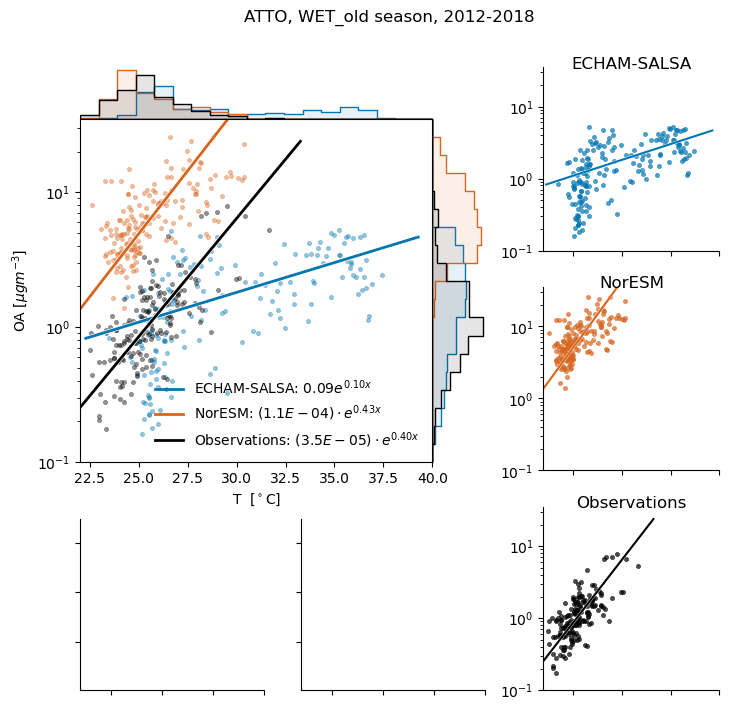

<Figure size 432x288 with 0 Axes>

<Figure size 432x288 with 0 Axes>

<Figure size 432x288 with 0 Axes>

In [213]:
fig, ax, daxs, axs_extra = make_cool_grid5()##ncols_extra=2, nrows_extra=2,)# w_ratio_sideplot=.5)
axs_extra = axs_extra.flatten()

## Settings
alpha_scatt = 0.6

xlab = r'T  [$^\circ$C]'
ylab = r'OA [$\mu g m^{-3}$]'



xlims = [22,40]
ylims = [.1,35]


season='WET_old'
v_x = 'T_C'
v_y = 'OA'


make_plot(v_x, v_y, xlims, ylims, season, 
              xlab, ylab, .3, models_and_obs, fig, ax, daxs, axs_extra,
          yscale='log',
         
         )


for mo, ax_ex in zip(models_and_obs, axs_extra[:]):
    df_s =  dic_df_med[mo]
    print(mo)
    mask_months = select_months(df_s, season=season)
    df_s = df_s[mask_months].copy()
    popt, pov, label, func = get_odr_fit_and_labs(df_s, v_x, v_y, fit_func = 'exp', return_func=True, beta0=[0.01,.12])
    _mi = df_s[v_x].min()
    _ma = df_s[v_x].max() 
    _xlim = [_mi*.95, _ma*1.05]
    x = np.linspace(*_xlim)
    
    ax.plot(x, func(x, *popt), c='w', linewidth=3,label='__nolegend__')
    ax.plot(x, func(x, *popt), linewidth=2, c=cdic_model[mo],label=f'{mo}: {label}')

    ax_ex.plot(x, func(x, *popt), c='w', linewidth=2,label=f'{mo}: {label}',
             )
    ax_ex.plot(x, func(x, *popt), c=cdic_model[mo],label=f'{mo}: {label}',
              )
    ax_ex.set_yscale('log')
ax.set_yscale('log')


    
fn = make_fn_scat(f'exp1_{season}', v_x, v_y)
ax.legend(frameon=False)
fig.savefig(fn, dpi=150)
fig.savefig(fn.with_suffix('.pdf'), dpi=150)



plt.show()

### WET_mid

(0.0, 38.85)
(0.0, 51.45)
(0.0, 51.45)
ECHAM-SALSA
Beta: [0.19536313 0.07108166]
Beta Std Error: [0.08012418 0.01340554]
Beta Covariance: [[ 0.0062448  -0.00103473]
 [-0.00103473  0.00017481]]
Residual Variance: 1.02803641611714
Inverse Condition #: 0.0019097016395801271
Reason(s) for Halting:
  Sum of squares convergence
[0.19536313 0.07108166]
NorESM
Beta: [2.11121077e-04 4.01452179e-01]
Beta Std Error: [0.00022237 0.04132817]
Beta Covariance: [[ 3.28809195e-08 -6.10467694e-06]
 [-6.10467694e-06  1.13574061e-03]]
Residual Variance: 1.5038797728441549
Inverse Condition #: 0.0027638688893689327
Reason(s) for Halting:
  Sum of squares convergence
[2.11121077e-04 4.01452179e-01]
Observations
Beta: [0.0005997  0.29403731]
Beta Std Error: [0.00053264 0.03404475]
Beta Covariance: [[ 9.57385783e-07 -6.11146057e-05]
 [-6.11146057e-05  3.91124634e-03]]
Residual Variance: 0.2963365426717856
Inverse Condition #: 0.008058745224093602
Reason(s) for Halting:
  Sum of squares convergence
[0.0005997 

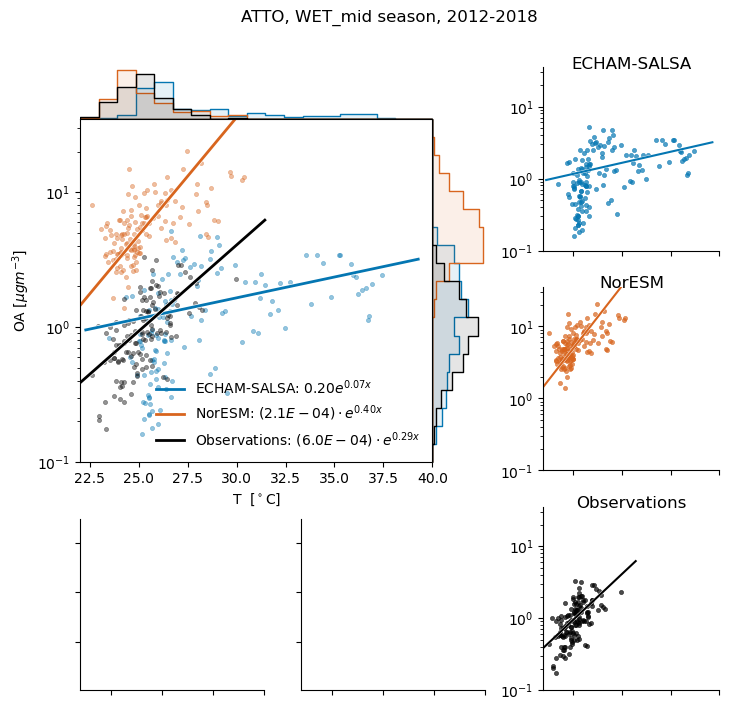

<Figure size 432x288 with 0 Axes>

<Figure size 432x288 with 0 Axes>

<Figure size 432x288 with 0 Axes>

In [214]:
fig, ax, daxs, axs_extra = make_cool_grid5()##ncols_extra=2, nrows_extra=2,)# w_ratio_sideplot=.5)
axs_extra = axs_extra.flatten()

## Settings
alpha_scatt = 0.6

xlab = r'T  [$^\circ$C]'
ylab = r'OA [$\mu g m^{-3}$]'



xlims = [22,40]
ylims = [.1,35]


season='WET_mid'
v_x = 'T_C'
v_y = 'OA'


make_plot(v_x, v_y, xlims, ylims, season, 
              xlab, ylab, .3, models_and_obs, fig, ax, daxs, axs_extra,
          yscale='log',
         
         )


for mo, ax_ex in zip(models_and_obs, axs_extra[:]):
    df_s =  dic_df_med[mo]
    print(mo)
    mask_months = select_months(df_s, season=season)
    df_s = df_s[mask_months].copy()
    popt, pov, label, func = get_odr_fit_and_labs(df_s, v_x, v_y, fit_func = 'exp', return_func=True, beta0=[0.01,.12])
    _mi = df_s[v_x].min()
    _ma = df_s[v_x].max() 
    _xlim = [_mi*.95, _ma*1.05]
    x = np.linspace(*_xlim)
    
    ax.plot(x, func(x, *popt), c='w', linewidth=3,label='__nolegend__')
    ax.plot(x, func(x, *popt), linewidth=2, c=cdic_model[mo],label=f'{mo}: {label}')

    ax_ex.plot(x, func(x, *popt), c='w', linewidth=2,label=f'{mo}: {label}',
             )
    ax_ex.plot(x, func(x, *popt), c=cdic_model[mo],label=f'{mo}: {label}',
              )
    ax_ex.set_yscale('log')
ax.set_yscale('log')


    
fn = make_fn_scat(f'exp1_{season}', v_x, v_y)
ax.legend(frameon=False)
fig.savefig(fn, dpi=150)
fig.savefig(fn.with_suffix('.pdf'), dpi=150)



plt.show()

### SON

(0.0, 15.75)
(0.0, 15.75)
(0.0, 15.75)
ECHAM-SALSA
Beta: [0.00430153 0.22151751]
Beta Std Error: [0.00442341 0.03089587]
Beta Covariance: [[ 8.39536212e-06 -5.85693786e-05]
 [-5.85693786e-05  4.09568385e-04]]
Residual Variance: 2.3306353627147374
Inverse Condition #: 0.01818096779058863
Reason(s) for Halting:
  Sum of squares convergence
[0.00430153 0.22151751]
NorESM
Beta: [3.08328225e-14 1.15050053e+00]
Beta Std Error: [1.0152785e-14 0.0000000e+00]
Beta Covariance: [[1.64219011e-29 0.00000000e+00]
 [0.00000000e+00 0.00000000e+00]]
Residual Variance: 6.276925135905414
Inverse Condition #: 1.0
Reason(s) for Halting:
  Problem is not full rank at solution
  Sum of squares convergence
[3.08328225e-14 1.15050053e+00]
Observations
Beta: [0.00038967 0.35200976]
Beta Std Error: [0.00077384 0.07397484]
Beta Covariance: [[ 1.75690193e-07 -1.67775075e-05]
 [-1.67775075e-05  1.60552940e-03]]
Residual Variance: 3.4083938791886643
Inverse Condition #: 0.005131632752563451
Reason(s) for Halting:
  

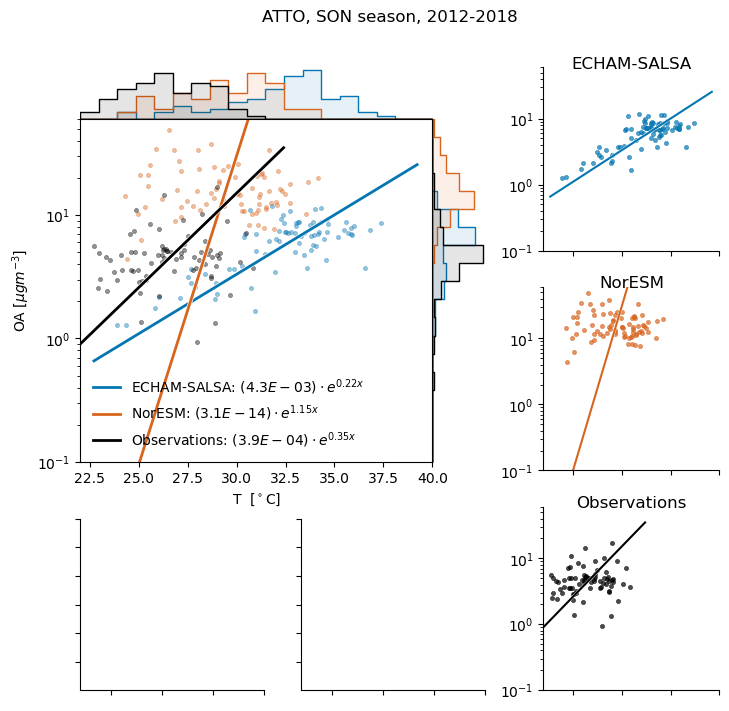

<Figure size 432x288 with 0 Axes>

<Figure size 432x288 with 0 Axes>

<Figure size 432x288 with 0 Axes>

In [215]:
fig, ax, daxs, axs_extra = make_cool_grid5()##ncols_extra=2, nrows_extra=2,)# w_ratio_sideplot=.5)
axs_extra = axs_extra.flatten()

## Settings
alpha_scatt = 0.6

xlab = r'T  [$^\circ$C]'
ylab = r'OA [$\mu g m^{-3}$]'



xlims = [22,40]
ylims = [.1,60]


season='SON'
v_x = 'T_C'
v_y = 'OA'


make_plot(v_x, v_y, xlims, ylims, season, 
              xlab, ylab, .3, models_and_obs, fig, ax, daxs, axs_extra,
          yscale='log',
         
         )


for mo, ax_ex in zip(models_and_obs, axs_extra[:]):
    df_s =  dic_df_med[mo]
    print(mo)
    mask_months = select_months(df_s, season=season)
    df_s = df_s[mask_months].copy()
    popt, pov, label, func = get_odr_fit_and_labs(df_s, v_x, v_y, fit_func = 'exp', return_func=True, beta0=[0.01,.12])
    _mi = df_s[v_x].min()
    _ma = df_s[v_x].max() 
    _xlim = [_mi*.95, _ma*1.05]
    x = np.linspace(*_xlim)
    
    ax.plot(x, func(x, *popt), c='w', linewidth=3,label='__nolegend__')
    ax.plot(x, func(x, *popt), linewidth=2, c=cdic_model[mo],label=f'{mo}: {label}')

    ax_ex.plot(x, func(x, *popt), c='w', linewidth=2,label=f'{mo}: {label}',
             )
    ax_ex.plot(x, func(x, *popt), c=cdic_model[mo],label=f'{mo}: {label}',
              )
    ax_ex.set_yscale('log')
ax.set_yscale('log')


    
fn = make_fn_scat(f'exp1_{season}', v_x, v_y)
ax.legend(frameon=False)
fig.savefig(fn, dpi=150)
fig.savefig(fn.with_suffix('.pdf'), dpi=150)



plt.show()

### MAM

(0.0, 37.8)
(0.0, 47.25)
(0.0, 47.25)
ECHAM-SALSA
Beta: [0.17564327 0.07447486]
Beta Std Error: [0.07733697 0.0145505 ]
Beta Covariance: [[ 0.00562031 -0.00104624]
 [-0.00104624  0.00019895]]
Residual Variance: 1.0641774416447993
Inverse Condition #: 0.00224532491497462
Reason(s) for Halting:
  Sum of squares convergence
[0.17564327 0.07447486]
NorESM
Beta: [6.20921529e-05 4.50930757e-01]
Beta Std Error: [8.19002928e-05 5.21900969e-02]
Beta Covariance: [[ 5.03129809e-09 -3.20355120e-06]
 [-3.20355120e-06  2.04307988e-03]]
Residual Variance: 1.3331863533363895
Inverse Condition #: 0.0007434025096929539
Reason(s) for Halting:
  Sum of squares convergence
[6.20921529e-05 4.50930757e-01]
Observations
Beta: [2.68189317e-04 3.26713114e-01]
Beta Std Error: [0.0002699  0.03862671]
Beta Covariance: [[ 2.36555546e-07 -3.38161562e-05]
 [-3.38161562e-05  4.84522877e-03]]
Residual Variance: 0.3079364888206339
Inverse Condition #: 0.003722121594123926
Reason(s) for Halting:
  Sum of squares converge

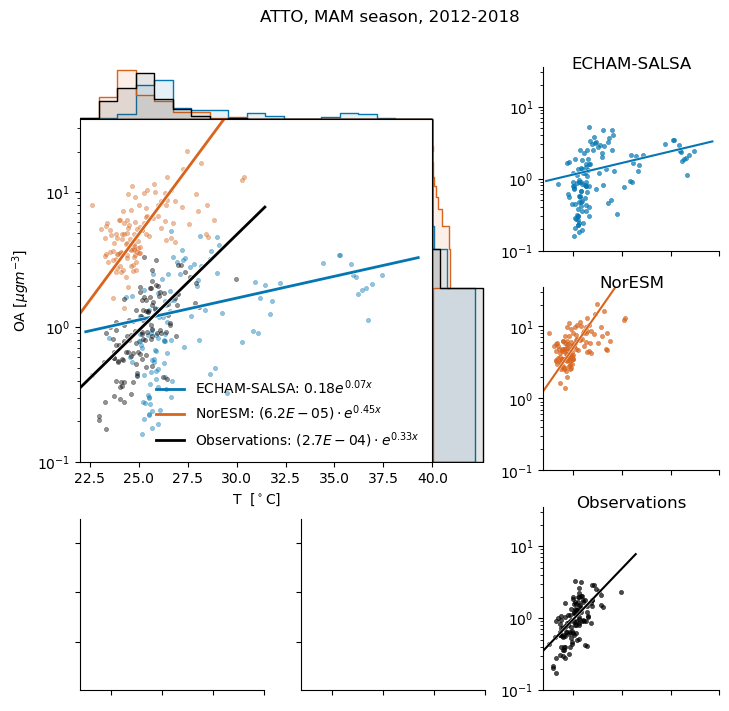

<Figure size 432x288 with 0 Axes>

<Figure size 432x288 with 0 Axes>

<Figure size 432x288 with 0 Axes>

In [216]:
fig, ax, daxs, axs_extra = make_cool_grid5()##ncols_extra=2, nrows_extra=2,)# w_ratio_sideplot=.5)
axs_extra = axs_extra.flatten()

## Settings
alpha_scatt = 0.6

xlab = r'T  [$^\circ$C]'
ylab = r'OA [$\mu g m^{-3}$]'



xlims = [22,40]
ylims = [.1,35]


season='MAM'
v_x = 'T_C'
v_y = 'OA'


make_plot(v_x, v_y, xlims, ylims, season, 
              xlab, ylab, .3, models_and_obs, fig, ax, daxs, axs_extra,
          yscale='linear',
         
         )


for mo, ax_ex in zip(models_and_obs, axs_extra[:]):
    df_s =  dic_df_med[mo]
    print(mo)
    mask_months = select_months(df_s, season=season)
    df_s = df_s[mask_months].copy()
    popt, pov, label, func = get_odr_fit_and_labs(df_s, v_x, v_y, fit_func = 'exp', return_func=True, beta0=[0.01,.12])
    _mi = df_s[v_x].min()
    _ma = df_s[v_x].max() 
    _xlim = [_mi*.95, _ma*1.05]
    x = np.linspace(*_xlim)
    
    ax.plot(x, func(x, *popt), c='w', linewidth=3,label='__nolegend__')
    ax.plot(x, func(x, *popt), linewidth=2, c=cdic_model[mo],label=f'{mo}: {label}')

    ax_ex.plot(x, func(x, *popt), c='w', linewidth=2,label=f'{mo}: {label}',
             )
    ax_ex.plot(x, func(x, *popt), c=cdic_model[mo],label=f'{mo}: {label}',
              )
    ax_ex.set_yscale('log')
ax.set_yscale('log')


    
fn = make_fn_scat(f'exp1_{season}', v_x, v_y)
ax.legend(frameon=False)
fig.savefig(fn, dpi=150)
fig.savefig(fn.with_suffix('.pdf'), dpi=150)



plt.show()

### JJA

(0.0, 45.15)
(0.0, 45.15)
(0.0, 45.15)
ECHAM-SALSA
Beta: [0.00253639 0.26336634]
Beta Std Error: [0.00145766 0.01990591]
Beta Covariance: [[ 1.52024231e-06 -2.07239218e-05]
 [-2.07239218e-05  2.83506305e-04]]
Residual Variance: 1.3976591159110083
Inverse Condition #: 0.028524440827459058
Reason(s) for Halting:
  Sum of squares convergence
[0.00253639 0.26336634]
NorESM
Beta: [9.96966930e-06 5.01386322e-01]
Beta Std Error: [2.54971077e-05 9.18600409e-02]
Beta Covariance: [[ 2.40795536e-10 -8.67223479e-07]
 [-8.67223479e-07  3.12550259e-03]]
Residual Variance: 2.6998112663823237
Inverse Condition #: 8.814601200582345e-05
Reason(s) for Halting:
  Sum of squares convergence
[9.96966930e-06 5.01386322e-01]
Observations
Beta: [1.46002155e-06 5.55054048e-01]
Beta Std Error: [2.84577214e-06 7.32761580e-02]
Beta Covariance: [[ 3.92326933e-12 -1.00940186e-07]
 [-1.00940186e-07  2.60119708e-03]]
Residual Variance: 2.064201663566625
Inverse Condition #: 1.8602918863484208e-05
Reason(s) for Halting

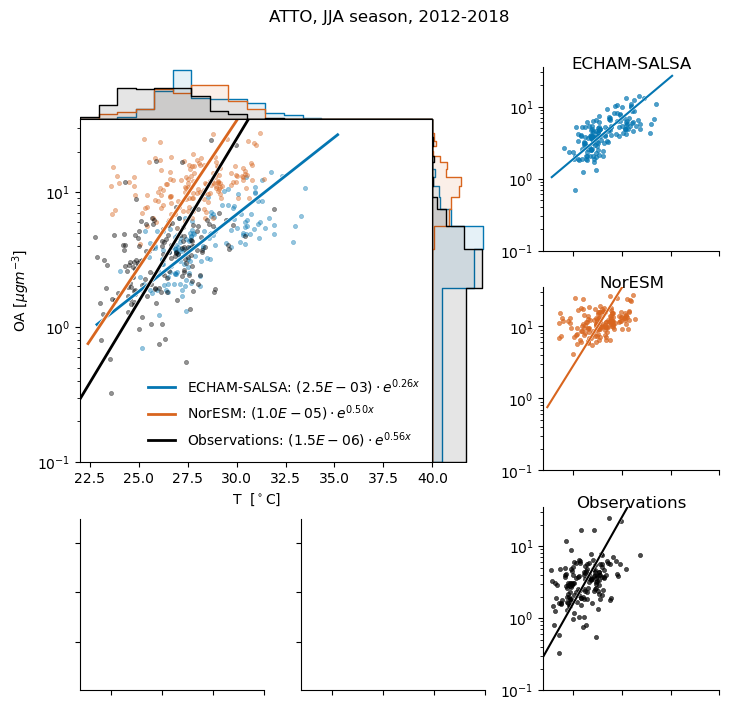

<Figure size 432x288 with 0 Axes>

<Figure size 432x288 with 0 Axes>

<Figure size 432x288 with 0 Axes>

In [217]:
fig, ax, daxs, axs_extra = make_cool_grid5()##ncols_extra=2, nrows_extra=2,)# w_ratio_sideplot=.5)
axs_extra = axs_extra.flatten()

## Settings
alpha_scatt = 0.6

xlab = r'T  [$^\circ$C]'
ylab = r'OA [$\mu g m^{-3}$]'



xlims = [22,40]
ylims = [.1,35]


season='JJA'
v_x = 'T_C'
v_y = 'OA'


make_plot(v_x, v_y, xlims, ylims, season, 
              xlab, ylab, .3, models_and_obs, fig, ax, daxs, axs_extra,
          yscale='linear',
         
         )


for mo, ax_ex in zip(models_and_obs, axs_extra[:]):
    df_s =  dic_df_med[mo]
    print(mo)
    mask_months = select_months(df_s, season=season)
    df_s = df_s[mask_months].copy()
    popt, pov, label, func = get_odr_fit_and_labs(df_s, v_x, v_y, fit_func = 'exp', return_func=True, beta0=[0.01,.12])
    _mi = df_s[v_x].min()
    _ma = df_s[v_x].max() 
    _xlim = [_mi*.95, _ma*1.05]
    x = np.linspace(*_xlim)
    
    ax.plot(x, func(x, *popt), c='w', linewidth=3,label='__nolegend__')
    ax.plot(x, func(x, *popt), linewidth=2, c=cdic_model[mo],label=f'{mo}: {label}')

    ax_ex.plot(x, func(x, *popt), c='w', linewidth=2,label=f'{mo}: {label}',
             )
    ax_ex.plot(x, func(x, *popt), c=cdic_model[mo],label=f'{mo}: {label}',
              )
    ax_ex.set_yscale('log')
ax.set_yscale('log')


    
fn = make_fn_scat(f'exp1_{season}', v_x, v_y)
ax.legend(frameon=False)
fig.savefig(fn, dpi=150)
fig.savefig(fn.with_suffix('.pdf'), dpi=150)



plt.show()

### JF

(0.0, 10.5)
(0.0, 11.55)
(0.0, 11.55)
ECHAM-SALSA
Beta: [0.02518804 0.14000619]
Beta Std Error: [0.02452794 0.02817188]
Beta Covariance: [[ 0.00058267 -0.00066823]
 [-0.00066823  0.00076865]]
Residual Variance: 1.0325303196280091
Inverse Condition #: 0.004802405716745936
Reason(s) for Halting:
  Sum of squares convergence
[0.02518804 0.14000619]
NorESM
Beta: [3.31736843e-04 3.87394161e-01]
Beta Std Error: [0.00071372 0.08048931]
Beta Covariance: [[ 1.89174119e-07 -2.13141221e-05]
 [-2.13141221e-05  2.40594650e-03]]
Residual Variance: 2.692714998997336
Inverse Condition #: 0.004176198721668665
Reason(s) for Halting:
  Sum of squares convergence
[3.31736843e-04 3.87394161e-01]
Observations
Beta: [4.17338449e-06 4.78090770e-01]
Beta Std Error: [7.87066400e-06 6.73159617e-02]
Beta Covariance: [[ 7.70111300e-11 -6.57646155e-07]
 [-6.57646155e-07  5.63335162e-03]]
Residual Variance: 0.8043947904417005
Inverse Condition #: 7.765020123081347e-05
Reason(s) for Halting:
  Sum of squares converge

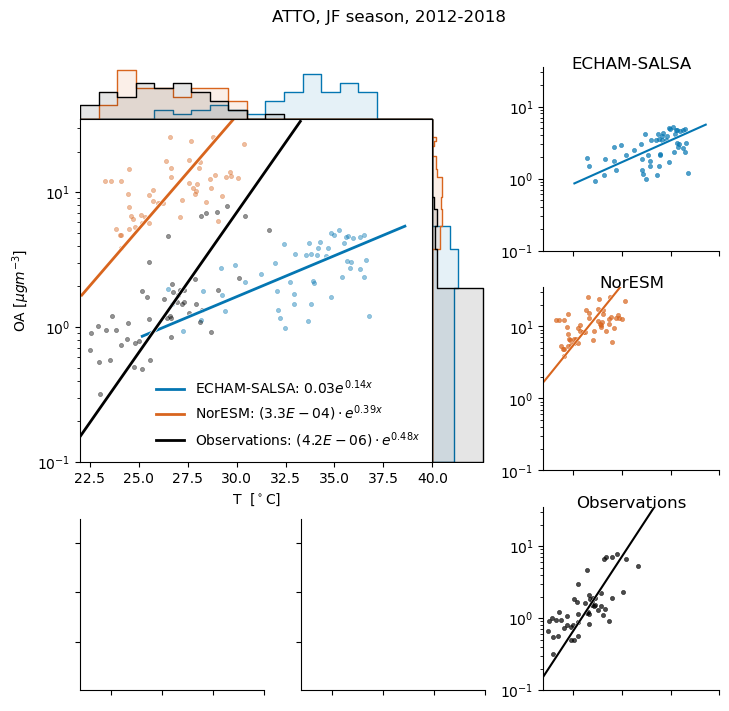

<Figure size 432x288 with 0 Axes>

<Figure size 432x288 with 0 Axes>

<Figure size 432x288 with 0 Axes>

In [218]:
fig, ax, daxs, axs_extra = make_cool_grid5()##ncols_extra=2, nrows_extra=2,)# w_ratio_sideplot=.5)
axs_extra = axs_extra.flatten()

## Settings
alpha_scatt = 0.6

xlab = r'T  [$^\circ$C]'
ylab = r'OA [$\mu g m^{-3}$]'



xlims = [22,40]
ylims = [.1,35]


season='JF'
v_x = 'T_C'
v_y = 'OA'


make_plot(v_x, v_y, xlims, ylims, season, 
              xlab, ylab, .3, models_and_obs, fig, ax, daxs, axs_extra,
          yscale='linear',
         
         )


for mo, ax_ex in zip(models_and_obs, axs_extra[:]):
    df_s =  dic_df_med[mo]
    print(mo)
    mask_months = select_months(df_s, season=season)
    df_s = df_s[mask_months].copy()
    popt, pov, label, func = get_odr_fit_and_labs(df_s, v_x, v_y, fit_func = 'exp', return_func=True, beta0=[0.01,.12])
    _mi = df_s[v_x].min()
    _ma = df_s[v_x].max() 
    _xlim = [_mi*.95, _ma*1.05]
    x = np.linspace(*_xlim)
    
    ax.plot(x, func(x, *popt), c='w', linewidth=3,label='__nolegend__')
    ax.plot(x, func(x, *popt), linewidth=2, c=cdic_model[mo],label=f'{mo}: {label}')

    ax_ex.plot(x, func(x, *popt), c='w', linewidth=2,label=f'{mo}: {label}',
             )
    ax_ex.plot(x, func(x, *popt), c=cdic_model[mo],label=f'{mo}: {label}',
              )
    ax_ex.set_yscale('log')
ax.set_yscale('log')


    
fn = make_fn_scat(f'exp1_{season}', v_x, v_y)
ax.legend(frameon=False)
fig.savefig(fn, dpi=150)
fig.savefig(fn.with_suffix('.pdf'), dpi=150)



plt.show()

### WET_mid

(0.0, 34.65)
(0.0, 37.8)
(0.0, 37.8)
ECHAM-SALSA
Beta: [0.19536313 0.07108166]
Beta Std Error: [0.08012418 0.01340554]
Beta Covariance: [[ 0.0062448  -0.00103473]
 [-0.00103473  0.00017481]]
Residual Variance: 1.02803641611714
Inverse Condition #: 0.0019097016395801271
Reason(s) for Halting:
  Sum of squares convergence
[0.19536313 0.07108166]
NorESM
Beta: [2.11121077e-04 4.01452179e-01]
Beta Std Error: [0.00022237 0.04132817]
Beta Covariance: [[ 3.28809195e-08 -6.10467694e-06]
 [-6.10467694e-06  1.13574061e-03]]
Residual Variance: 1.5038797728441549
Inverse Condition #: 0.0027638688893689327
Reason(s) for Halting:
  Sum of squares convergence
[2.11121077e-04 4.01452179e-01]
Observations
Beta: [0.0005997  0.29403731]
Beta Std Error: [0.00053264 0.03404475]
Beta Covariance: [[ 9.57385783e-07 -6.11146057e-05]
 [-6.11146057e-05  3.91124634e-03]]
Residual Variance: 0.2963365426717856
Inverse Condition #: 0.008058745224093602
Reason(s) for Halting:
  Sum of squares convergence
[0.0005997  0

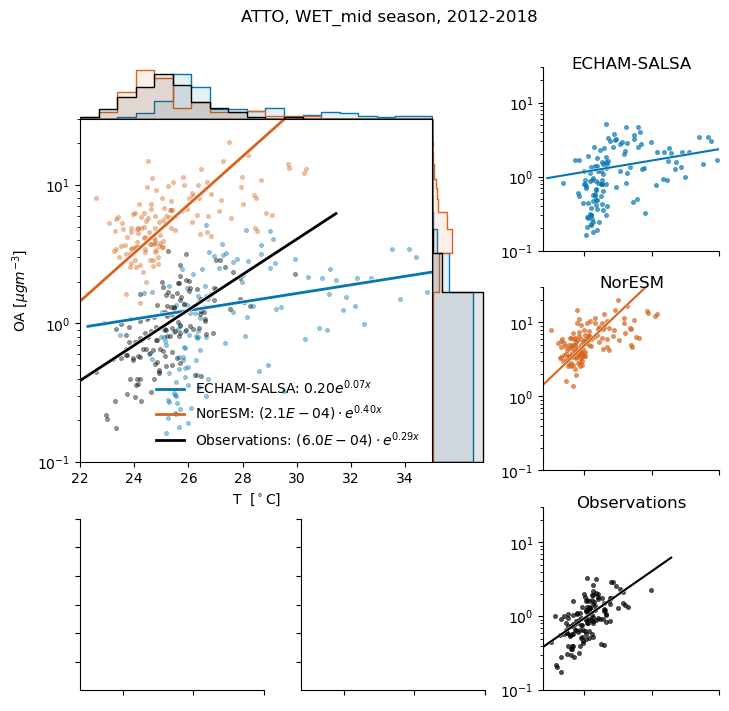

<Figure size 432x288 with 0 Axes>

<Figure size 432x288 with 0 Axes>

<Figure size 432x288 with 0 Axes>

In [219]:
fig, ax, daxs, axs_extra = make_cool_grid5()##ncols_extra=2, nrows_extra=2,)# w_ratio_sideplot=.5)
axs_extra = axs_extra.flatten()

## Settings
alpha_scatt = 0.6

xlab = r'T  [$^\circ$C]'
ylab = r'OA [$\mu g m^{-3}$]'



xlims = [22,35]
ylims = [.1,30]


season='WET_mid'
v_x = 'T_C'
v_y = 'OA'


make_plot(v_x, v_y, xlims, ylims, season, 
              xlab, ylab, .3, models_and_obs, fig, ax, daxs, axs_extra,
          yscale='linear',
         
         )


for mo, ax_ex in zip(models_and_obs, axs_extra[:]):
    df_s =  dic_df_med[mo]
    print(mo)
    mask_months = select_months(df_s, season=season)
    df_s = df_s[mask_months].copy()
    popt, pov, label, func = get_odr_fit_and_labs(df_s, v_x, v_y, fit_func = 'exp', return_func=True, beta0=[0.01,.12])
    _mi = df_s[v_x].min()
    _ma = df_s[v_x].max() 
    _xlim = [_mi*.95, _ma*1.05]
    x = np.linspace(*_xlim)
    
    ax.plot(x, func(x, *popt), c='w', linewidth=3,label='__nolegend__')
    ax.plot(x, func(x, *popt), linewidth=2, c=cdic_model[mo],label=f'{mo}: {label}')

    ax_ex.plot(x, func(x, *popt), c='w', linewidth=2,label=f'{mo}: {label}',
             )
    ax_ex.plot(x, func(x, *popt), c=cdic_model[mo],label=f'{mo}: {label}',
              )
    ax_ex.set_yscale('log')
ax.set_yscale('log')


    
fn = make_fn_scat(f'exp1_{season}', v_x, v_y)
ax.legend(frameon=False)
fig.savefig(fn, dpi=150)
fig.savefig(fn.with_suffix('.pdf'), dpi=150)



plt.show()

### WET

(0.0, 66.15)
(0.0, 69.3)
(0.0, 77.7)
ECHAM-SALSA
Beta: [0.62804521 0.04816224]
Beta Std Error: [0.14201517 0.00725036]
Beta Covariance: [[ 9.32072774e-03 -4.71390605e-04]
 [-4.71390605e-04  2.42940063e-05]]
Residual Variance: 2.163812757024335
Inverse Condition #: 0.0005792925294105622
Reason(s) for Halting:
  Sum of squares convergence
[0.62804521 0.04816224]
NorESM
Beta: [2.37136390e-04 3.93509454e-01]
Beta Std Error: [0.00019446 0.03073205]
Beta Covariance: [[ 1.39333786e-08 -2.19955911e-06]
 [-2.19955911e-06  3.48003035e-04]]
Residual Variance: 2.7139379674702395
Inverse Condition #: 0.0033415971006656
Reason(s) for Halting:
  Sum of squares convergence
[2.37136390e-04 3.93509454e-01]
Observations
Beta: [8.37535723e-09 7.32679412e-01]
Beta Std Error: [1.47967041e-08 6.59301823e-02]
Beta Covariance: [[ 1.34261541e-16 -5.97741835e-10]
 [-5.97741835e-10  2.66557066e-03]]
Residual Variance: 1.6307160793734776
Inverse Condition #: 1.0919371386755359e-07
Reason(s) for Halting:
  Sum of s

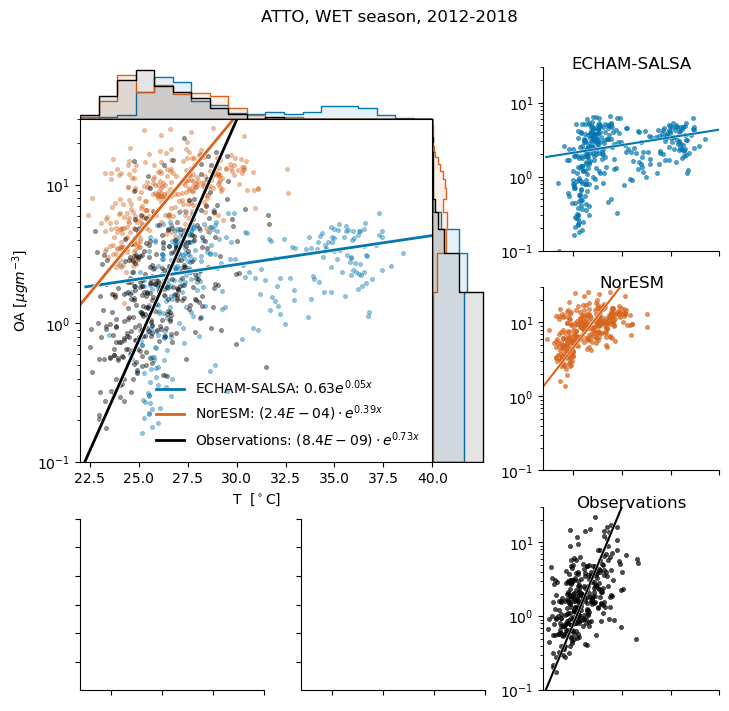

<Figure size 432x288 with 0 Axes>

<Figure size 432x288 with 0 Axes>

<Figure size 432x288 with 0 Axes>

In [220]:
fig, ax, daxs, axs_extra = make_cool_grid5()##ncols_extra=2, nrows_extra=2,)# w_ratio_sideplot=.5)
axs_extra = axs_extra.flatten()

## Settings
alpha_scatt = 0.6

xlab = r'T  [$^\circ$C]'
ylab = r'OA [$\mu g m^{-3}$]'



xlims = [22,40]
ylims = [.1,30]


season='WET'
v_x = 'T_C'
v_y = 'OA'


make_plot(v_x, v_y, xlims, ylims, season, 
              xlab, ylab, .3, models_and_obs, fig, ax, daxs, axs_extra,
          yscale='linear',#xscale='log'
         
         )


for mo, ax_ex in zip(models_and_obs, axs_extra[:]):
    df_s =  dic_df_med[mo]
    print(mo)
    mask_months = select_months(df_s, season=season)
    df_s = df_s[mask_months].copy()
    popt, pov, label, func = get_odr_fit_and_labs(df_s, v_x, v_y, fit_func = 'exp', return_func=True, beta0=[0.01,.12])
    _mi = df_s[v_x].min()
    _ma = df_s[v_x].max() 
    _xlim = [_mi*.95, _ma*1.05]
    x = np.linspace(*_xlim)
    
    ax.plot(x, func(x, *popt), c='w', linewidth=3,label='__nolegend__')
    ax.plot(x, func(x, *popt), linewidth=2, c=cdic_model[mo],label=f'{mo}: {label}')

    ax_ex.plot(x, func(x, *popt), c='w', linewidth=2,label=f'{mo}: {label}',
             )
    ax_ex.plot(x, func(x, *popt), c=cdic_model[mo],label=f'{mo}: {label}',
              )
    ax_ex.set_yscale('log')
ax.set_yscale('log')


    
fn = make_fn_scat(f'exp1_{season}', v_x, v_y)
ax.legend(frameon=False)
fig.savefig(fn, dpi=150)
fig.savefig(fn.with_suffix('.pdf'), dpi=150)



plt.show()

### WET_early

(0.0, 21.0)
(0.0, 31.5)
(0.0, 31.5)
ECHAM-SALSA
Beta: [0.30992725 0.06691496]
Beta Std Error: [0.11496758 0.01082486]
Beta Covariance: [[ 1.05905229e-02 -9.93050386e-04]
 [-9.93050386e-04  9.38882898e-05]]
Residual Variance: 1.2480539370213575
Inverse Condition #: 0.0007065204020015398
Reason(s) for Halting:
  Sum of squares convergence
[0.30992725 0.06691496]
NorESM
Beta: [0.00054386 0.36194539]
Beta Std Error: [0.00069248 0.04729852]
Beta Covariance: [[ 1.29324397e-07 -8.82215065e-06]
 [-8.82215065e-06  6.03341709e-04]]
Residual Variance: 3.7079319865817033
Inverse Condition #: 0.007555555211508035
Reason(s) for Halting:
  Sum of squares convergence
[0.00054386 0.36194539]
Observations
Beta: [1.30063263e-14 1.20600245e+00]
Beta Std Error: [2.48048226e-15 0.00000000e+00]
Beta Covariance: [[3.15146589e-30 0.00000000e+00]
 [0.00000000e+00 0.00000000e+00]]
Residual Variance: 1.9523588175347124
Inverse Condition #: 1.0
Reason(s) for Halting:
  Problem is not full rank at solution
  Sum of

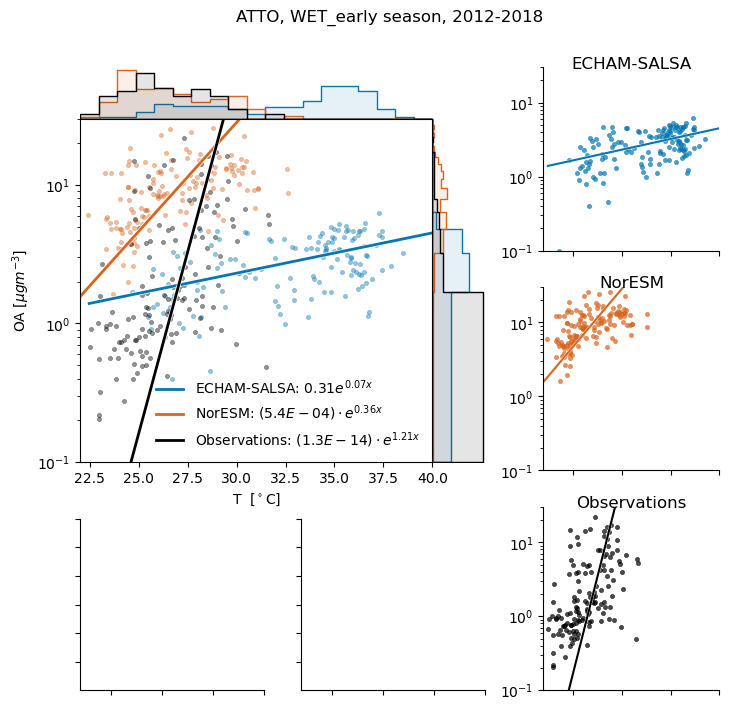

<Figure size 432x288 with 0 Axes>

<Figure size 432x288 with 0 Axes>

<Figure size 432x288 with 0 Axes>

In [221]:
fig, ax, daxs, axs_extra = make_cool_grid5()##ncols_extra=2, nrows_extra=2,)# w_ratio_sideplot=.5)
axs_extra = axs_extra.flatten()

## Settings
alpha_scatt = 0.6

xlab = r'T  [$^\circ$C]'
ylab = r'OA [$\mu g m^{-3}$]'



xlims = [22,40]
ylims = [.1,30]


season='WET_early'
v_x = 'T_C'
v_y = 'OA'


make_plot(v_x, v_y, xlims, ylims, season, 
              xlab, ylab, .3, models_and_obs, fig, ax, daxs, axs_extra,
          yscale='linear',
         
         )


for mo, ax_ex in zip(models_and_obs, axs_extra[:]):
    df_s =  dic_df_med[mo]
    print(mo)
    mask_months = select_months(df_s, season=season)
    df_s = df_s[mask_months].copy()
    popt, pov, label, func = get_odr_fit_and_labs(df_s, v_x, v_y, fit_func = 'exp', return_func=True, beta0=[0.01,.12])
    _mi = df_s[v_x].min()
    _ma = df_s[v_x].max() 
    _xlim = [_mi*.95, _ma*1.05]
    x = np.linspace(*_xlim)
    
    ax.plot(x, func(x, *popt), c='w', linewidth=3,label='__nolegend__')
    ax.plot(x, func(x, *popt), linewidth=2, c=cdic_model[mo],label=f'{mo}: {label}')

    ax_ex.plot(x, func(x, *popt), c='w', linewidth=2,label=f'{mo}: {label}',
             )
    ax_ex.plot(x, func(x, *popt), c=cdic_model[mo],label=f'{mo}: {label}',
              )
    ax_ex.set_yscale('log')
ax.set_yscale('log')


    
fn = make_fn_scat(f'exp1_{season}', v_x, v_y)
ax.legend(frameon=False)
fig.savefig(fn, dpi=150)
fig.savefig(fn.with_suffix('.pdf'), dpi=150)



plt.show()

### WET_late

(0.0, 56.7)
(0.0, 56.7)
(0.0, 56.7)
ECHAM-SALSA
Beta: [8.80251539e-11 8.82134864e-01]
Beta Std Error: [3.40036842e-10 1.41083787e-01]
Beta Covariance: [[ 7.44637148e-20 -3.08851370e-11]
 [-3.08851370e-11  1.28187881e-02]]
Residual Variance: 1.5527704198930943
Inverse Condition #: 7.505902429129795e-10
Reason(s) for Halting:
  Sum of squares convergence
[8.80251539e-11 8.82134864e-01]
NorESM
Beta: [1.09095721e-04 4.23330588e-01]
Beta Std Error: [0.00011575 0.04003414]
Beta Covariance: [[ 6.70330885e-09 -2.31623784e-06]
 [-2.31623784e-06  8.01918728e-04]]
Residual Variance: 1.998622082224299
Inverse Condition #: 0.0014878074562327032
Reason(s) for Halting:
  Sum of squares convergence
[1.09095721e-04 4.23330588e-01]
Observations
Beta: [1.23224079e-05 4.63390167e-01]
Beta Std Error: [1.68557135e-05 5.20883225e-02]
Beta Covariance: [[ 2.57859350e-10 -7.96188345e-07]
 [-7.96188345e-07  2.46246091e-03]]
Residual Variance: 1.1018218951156171
Inverse Condition #: 0.00015752449775696767
Reason(

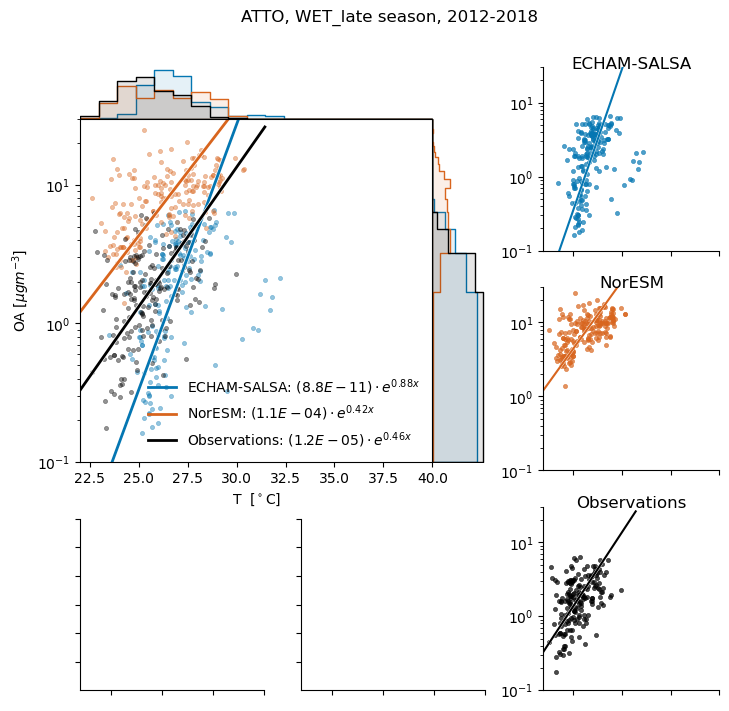

<Figure size 432x288 with 0 Axes>

<Figure size 432x288 with 0 Axes>

<Figure size 432x288 with 0 Axes>

In [222]:
fig, ax, daxs, axs_extra = make_cool_grid5()##ncols_extra=2, nrows_extra=2,)# w_ratio_sideplot=.5)
axs_extra = axs_extra.flatten()

## Settings
alpha_scatt = 0.6

xlab = r'T  [$^\circ$C]'
ylab = r'OA [$\mu g m^{-3}$]'



xlims = [22,40]
ylims = [.1,30]


season='WET_late'
v_x = 'T_C'
v_y = 'OA'


make_plot(v_x, v_y, xlims, ylims, season, 
              xlab, ylab, .3, models_and_obs, fig, ax, daxs, axs_extra,
          yscale='linear',
         
         )


for mo, ax_ex in zip(models_and_obs, axs_extra[:]):
    df_s =  dic_df_med[mo]
    print(mo)
    mask_months = select_months(df_s, season=season)
    df_s = df_s[mask_months].copy()
    popt, pov, label, func = get_odr_fit_and_labs(df_s, v_x, v_y, fit_func = 'exp', return_func=True, beta0=[0.01,.12])
    _mi = df_s[v_x].min()
    _ma = df_s[v_x].max() 
    _xlim = [_mi*.95, _ma*1.05]
    x = np.linspace(*_xlim)
    
    ax.plot(x, func(x, *popt), c='w', linewidth=3,label='__nolegend__')
    ax.plot(x, func(x, *popt), linewidth=2, c=cdic_model[mo],label=f'{mo}: {label}')

    ax_ex.plot(x, func(x, *popt), c='w', linewidth=2,label=f'{mo}: {label}',
             )
    ax_ex.plot(x, func(x, *popt), c=cdic_model[mo],label=f'{mo}: {label}',
              )
    ax_ex.set_yscale('log')
ax.set_yscale('log')


    
fn = make_fn_scat(f'exp1_{season}', v_x, v_y)
ax.legend(frameon=False)
fig.savefig(fn, dpi=150)
fig.savefig(fn.with_suffix('.pdf'), dpi=150)



plt.show()

### DRY

(0.0, 21.0)
(0.0, 24.15)
(0.0, 24.15)
ECHAM-SALSA
Beta: [0.00136703 0.2653296 ]
Beta Std Error: [0.00176946 0.0402715 ]
Beta Covariance: [[ 8.49591871e-07 -1.93189149e-05]
 [-1.93189149e-05  4.40070706e-04]]
Residual Variance: 3.685302776231747
Inverse Condition #: 0.014717101695265461
Reason(s) for Halting:
  Sum of squares convergence
[0.00136703 0.2653296 ]
NorESM
Beta: [1.35315030e-13 1.10526221e+00]
Beta Std Error: [2.35541229e-12 5.94839538e-01]
Beta Covariance: [[ 1.14187355e-24 -2.88348019e-13]
 [-2.88348019e-13  7.28255536e-02]]
Residual Variance: 4.858652751529806
Inverse Condition #: 5.939645017929127e-13
Reason(s) for Halting:
  Iteration limit reached
[1.35315030e-13 1.10526221e+00]
Observations
Beta: [1.03488903e-05 4.87370383e-01]
Beta Std Error: [2.48669097e-05 8.92305835e-02]
Beta Covariance: [[ 1.81955112e-10 -6.52453902e-07]
 [-6.52453902e-07  2.34286948e-03]]
Residual Variance: 3.398438162019056
Inverse Condition #: 0.00012516127653998952
Reason(s) for Halting:
  Su

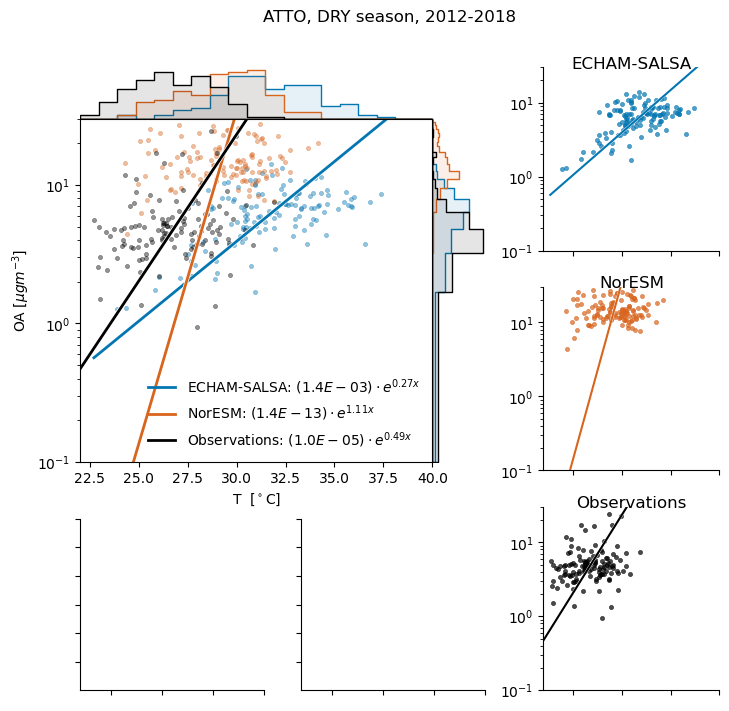

<Figure size 432x288 with 0 Axes>

<Figure size 432x288 with 0 Axes>

<Figure size 432x288 with 0 Axes>

In [233]:
fig, ax, daxs, axs_extra = make_cool_grid5()##ncols_extra=2, nrows_extra=2,)# w_ratio_sideplot=.5)
axs_extra = axs_extra.flatten()

## Settings
alpha_scatt = 0.6

xlab = r'T  [$^\circ$C]'
ylab = r'OA [$\mu g m^{-3}$]'



xlims = [22,40]
ylims = [.1,30]


season='DRY'
v_x = 'T_C'
v_y = 'OA'


make_plot(v_x, v_y, xlims, ylims, season, 
              xlab, ylab, .3, models_and_obs, fig, ax, daxs, axs_extra,
          yscale='linear',
         
         )


for mo, ax_ex in zip(models_and_obs, axs_extra[:]):
    df_s =  dic_df_med[mo]
    print(mo)
    mask_months = select_months(df_s, season=season)
    df_s = df_s[mask_months].copy()
    popt, pov, label, func = get_odr_fit_and_labs(df_s, v_x, v_y, fit_func = 'exp', return_func=True, beta0=[0.01,.12])
    _mi = df_s[v_x].min()
    _ma = df_s[v_x].max() 
    _xlim = [_mi*.95, _ma*1.05]
    x = np.linspace(*_xlim)
    
    ax.plot(x, func(x, *popt), c='w', linewidth=3,label='__nolegend__')
    ax.plot(x, func(x, *popt), linewidth=2, c=cdic_model[mo],label=f'{mo}: {label}')

    ax_ex.plot(x, func(x, *popt), c='w', linewidth=2,label=f'{mo}: {label}',
             )
    ax_ex.plot(x, func(x, *popt), c=cdic_model[mo],label=f'{mo}: {label}',
              )
    ax_ex.set_yscale('log')
ax.set_yscale('log')


    
fn = make_fn_scat(f'exp1_{season}', v_x, v_y)
ax.legend(frameon=False)
fig.savefig(fn, dpi=150)
fig.savefig(fn.with_suffix('.pdf'), dpi=150)



plt.show()

In [224]:
from bs_fdbck.util.BSOA_datamanip.fits import *

In [225]:
import scipy

## OA to number

### Nx new version: Nx

In [262]:
def make_plot2(v_x, v_y, xlims, ylims, season, 
              xlab=None, ylab=None, alpha_scat=.4,
             source_list = models_and_obs, fig=None, 
               axs=None,
              xscale='linear', yscale='linear',
              dic_df_med = dic_df_med,
               divide_NorESM_by_factor = None,
             ):
    if xlab is None: 
        if xlab in label_dic:
            xlab = label_dic[v_x]
    if ylab is None: 
        if ylab in label_dic:
            ylab = label_dic[v_y]

    for mo, ax in zip(source_list, axs[:]):
        df_s =  dic_df_med[mo]
        mask_months = select_months(df_s, season=season)
        df_s = df_s[mask_months].copy()
        if (mo =='NorESM') &  (divide_NorESM_by_factor is not None):
            df_s = df_s/divide_NorESM_by_factor
            title = f'{mo}/{divide_NorESM_by_factor}'
            ax.spines['bottom'].set_color('r')
            ax.spines['top'].set_color('r') 
            ax.spines['right'].set_color('red')
            ax.spines['left'].set_color('red')
            ax.set_title(title, y=.95, c='r')

        else:
            title = mo
            ax.set_title(title, y=.95)
            
        sns.scatterplot(x=v_x,y=v_y, 
                    data = df_s, 
                    color=cdic_model[mo], 
                    alpha=alpha_scatt+.1, 
                    label='__nolegend__',
                    ax = ax,
                    #facecolor='none',
                    edgecolor=cdic_model[mo],
                        marker='.',
                    
                    
                   )
        
        
    ax.set_xlabel(xlab)
    ax.set_ylabel(ylab)
    fig.suptitle(f'{select_station}, {season} season, 2012-2018', y=.95)
    xlim_dist = list(daxs['y'].get_xlim())
    for mo,ax in zip(source_list, axs):

        df_s =  dic_df_med[mo]

        mask_months = select_months(df_s, season=season)
        df_s = df_s[mask_months].copy()
        if xscale=='log':
            xbins = np.logspace(np.log10(xlims[0]),np.log10(xlims[1]),20)
        else:
            xbins = np.linspace(xlims[0],xlims[1],20)
            
        if yscale=='log':
            ybins = np.logspace(np.log10(ylims[0]),np.log10(ylims[1]),20)
        else:
            ybins = np.linspace(ylims[0],ylims[1],20)
            

        ax.set_ylim(ylims)
        ax.set_xlim(xlims)

        sns.despine(ax = ax)

    return

#### WET_mid

In [264]:
models_and_obs[::-1]

['Observations', 'NorESM', 'ECHAM-SALSA']

Observations
Beta: [365.29119327  35.8736804 ]
Beta Std Error: [12.49479063 26.68555098]
Beta Covariance: [[ 660.54728538 -994.29154159]
 [-994.29154159 3012.99418723]]
Residual Variance: 0.23634915527888417
Inverse Condition #: 0.2937944810987725
Reason(s) for Halting:
  Sum of squares convergence
[365.29119327  35.8736804 ]
reason for haltng
NorESM
Beta: [ 265.70241069 1979.04620478]
Beta Std Error: [ 17.2115822  167.40594395]
Beta Covariance: [[  42.24112415 -367.30253892]
 [-367.30253892 3996.093352  ]]
Residual Variance: 7.013036884349719
Inverse Condition #: 0.04389091278576738
Reason(s) for Halting:
  Sum of squares convergence
[ 265.70241069 1979.04620478]
reason for haltng
ECHAM-SALSA
Beta: [184.26136961 238.91608205]
Beta Std Error: [26.04070211 63.37271228]
Beta Covariance: [[ 269.81306275 -571.8777482 ]
 [-571.8777482  1597.94630748]]
Residual Variance: 2.513288864866981
Inverse Condition #: 0.16711452294811124
Reason(s) for Halting:
  Iteration limit reached
[184.26136961 

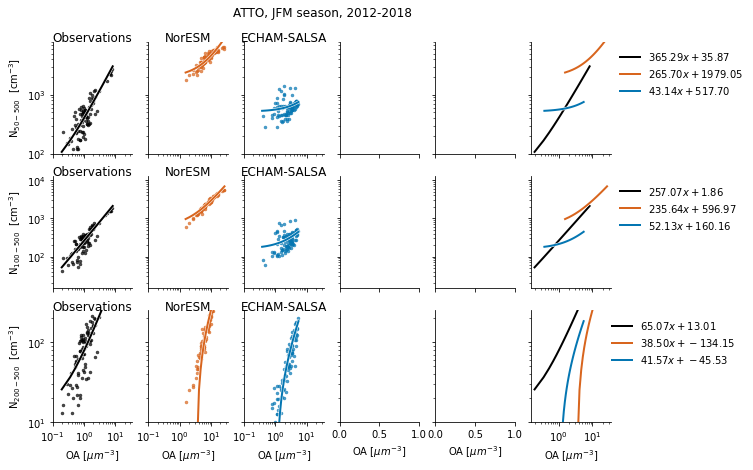

In [395]:
## Settings
alpha_scatt = 0.5
figsize=[10,7]

xlab = r'OA [$\mu m^{-3}$]'

season = 'JFM'
source_list = models_and_obs[::-1]

xlims = [.1,35]

ylims = [100,8000]

# OBS: 
v_y = 'N50-500'
v_x = 'OA'
ylab = r'N$_{50-500}$  [cm$^{-3}$]'



xscale='log'
yscale='log'

fig, axs_all = plt.subplots(3,6,figsize=figsize, sharey='row', sharex='col')


## Settings
alpha_scatt = 0.6



# Make plot
axs_sub = axs_all[0,:]
axs_sub[0].set_ylabel(ylab)

make_plot2(v_x, v_y, xlims, ylims, season, 
              xlab=xlab, ylab=ylab, alpha_scat=.4,
             source_list = source_list, 
           fig=fig, 
           axs=axs_sub,
           xscale='linear', yscale='linear',
           dic_df_med = dic_df_med,
         )


for mo, ax in zip(source_list, axs_sub):
    df_s =  dic_df_med[mo]
    print(mo)
    mask_months = select_months(df_s, season=season)
    df_s = df_s[mask_months].copy()
    
    #popt, pov, label, func = get_log_fit_abc(df_s,v_x,v_y, return_func=True)
    popt, pov, label, func = get_odr_fit_and_labs(df_s,v_x,v_y, fit_func='linear', return_func=True)

    _mi = df_s[v_x].min()
    _ma = df_s[v_x].max() 
    _xlim = [_mi*.95, _ma*1.05]
    
    plot_fit(func, popt, mo, _xlim, yscale, xscale, ax, label)
    plot_fit(func, popt, mo, _xlim, yscale, xscale, axs_sub[-1], label)
    ax.set_yscale(yscale)
    ax.set_xscale(xscale)

axs_sub[-1].legend(bbox_to_anchor=(1,1,), frameon=False)
#xlims = [.01,10]

xlims = [.1,35]

ylims = [15,13000]

# OBS: 
v_y = 'N100-500'
ylab = r'N$_{100-500}$  [cm$^{-3}$]'


xscale='log'
yscale='log'
axs_sub = axs_all[1,:]
axs_sub[0].set_ylabel(ylab)

make_plot2(v_x, v_y, xlims, ylims, season, 
              xlab=xlab, ylab=ylab, alpha_scat=.4,
             source_list =source_list, fig=fig, 
               axs=axs_sub,
              xscale='linear', yscale='linear',
              dic_df_med = dic_df_med,
         )
for mo, ax in zip(source_list, axs_sub):
    df_s =  dic_df_med[mo]
    print(mo)
    mask_months = select_months(df_s, season=season)
    df_s = df_s[mask_months].copy()
    popt, pov, label, func = get_odr_fit_and_labs(df_s,v_x,v_y, fit_func='linear', return_func=True)
    _mi = df_s[v_x].min()
    _ma = df_s[v_x].max() 
    _xlim = [_mi*.95, _ma*1.05]
    
    plot_fit(func, popt, mo, _xlim, yscale, xscale, ax, label)
    plot_fit(func, popt, mo, _xlim, yscale, xscale, axs_sub[-1], label)

    ax.set_yscale(yscale)
    ax.set_xscale(xscale)

    
axs_sub[-1].legend(bbox_to_anchor=(1,1,), frameon=False)
    
    

    
    
    

    
#xlims = [.01,10]

ylims = [10,250]





# OBS: 
v_y = 'N200-500'
ylab = r'N$_{200-500}$  [cm$^{-3}$]'


xscale='log'
yscale='log'
axs_sub = axs_all[2,:]
axs_sub[0].set_ylabel(ylab)

make_plot2(v_x, v_y, xlims, ylims, season, 
              xlab=xlab, ylab=ylab, alpha_scat=.4,
             source_list = source_list, fig=fig, 
               axs=axs_sub,
              xscale='linear', yscale='linear',
              dic_df_med = dic_df_med,
         )

for mo, ax in zip(source_list, axs_sub):
    print(mo)
    df_s =  dic_df_med[mo]
    print(mo)
    mask_months = select_months(df_s, season=season)
    df_s = df_s[mask_months].copy()
    
    #popt, pov, label, func = get_log_fit_abc(df_s,v_x,v_y, return_func=True)
    popt, pov, label, func = get_odr_fit_and_labs(df_s,v_x,v_y, fit_func='linear', return_func=True)
    
    _mi = df_s[v_x].min()
    _ma = df_s[v_x].max() 
    _xlim = [_mi*.95, _ma*1.05]
    
    plot_fit(func, popt, mo, _xlim, yscale, xscale, ax, label=label)
    plot_fit(func, popt, mo, _xlim, yscale, xscale, axs_sub[-1], label=label)

    ax.set_yscale(yscale)
    ax.set_xscale(xscale)

leg = axs_sub[-1].legend(bbox_to_anchor=(.9,1,), frameon=False)

    
for ax in axs_sub:
    ax.set_xlabel(xlab)
sns.despine(fig) 

    
    
fn = make_fn_scat(f'together_{season}', v_x, 'Nx')
#ax.legend(frameon=False)
fig.savefig(fn, dpi=150, bbox_inches='tight')#)
fig.savefig(fn.with_suffix('.pdf'), dpi=150, bbox_inches='tight')#)
print(fn)

In [290]:
def plot_fit(func, popt, mo, xlims, yscale, xscale, ax, label):

    x = np.linspace(*xlims)
    ax.plot(x, func(x, *popt), c='w', linewidth=3,label='__nolegend__')

    ax.plot(x, func(x, *popt), linewidth=2, c=cdic_model[mo],label=f'{label}')
    ax.set_yscale(yscale)
    ax.set_xscale(xscale)



Observations
Beta: [365.29119327  35.8736804 ]
Beta Std Error: [12.49479063 26.68555098]
Beta Covariance: [[ 660.54728538 -994.29154159]
 [-994.29154159 3012.99418723]]
Residual Variance: 0.23634915527888417
Inverse Condition #: 0.2937944810987725
Reason(s) for Halting:
  Sum of squares convergence
[365.29119327  35.8736804 ]
reason for haltng
parameter: 365.29119326669706
   conf interval: 340.45237157274084 390.1300149606533
   tstat: 29.235479332417363
   pstat: 0.0

parameter: 35.87368040031887
   conf interval: -17.175439197447332 88.92279999808507
   tstat: 1.3443110254526909
   pstat: 0.18238319460860586

NorESM
Beta: [265.70244186 989.52302448]
Beta Std Error: [17.21160565 83.70310793]
Beta Covariance: [[ 168.96495703 -734.60745796]
 [-734.60745796 3996.10633352]]
Residual Variance: 1.7532592210875009
Inverse Condition #: 0.08337879043689017
Reason(s) for Halting:
  Sum of squares convergence
[265.70244186 989.52302448]
reason for haltng
parameter: 265.70244185804165
   conf in

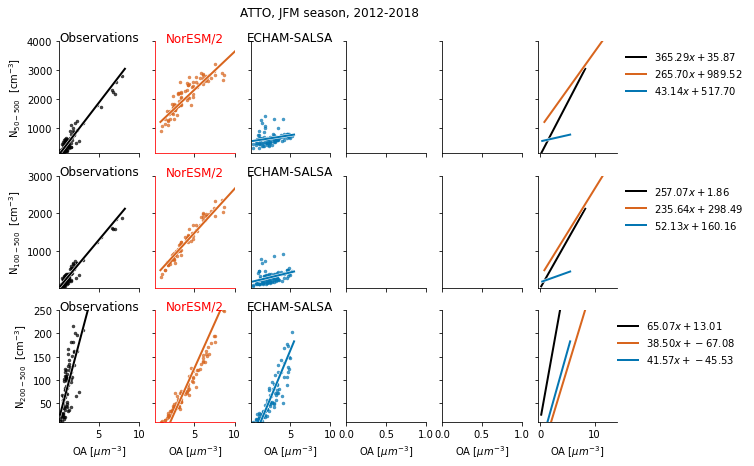

In [393]:
## Settings
alpha_scatt = 0.5
figsize=[10,7]
divide_NorESM_by_factor = 2
xlab = r'OA [$\mu m^{-3}$]'

season = 'JFM'
source_list = models_and_obs[::-1]

xlims = [.1,10]

ylims = [100,4000]

# OBS: 
v_x = 'OA'

v_y = 'N50-500'
ylab = r'N$_{50-500}$  [cm$^{-3}$]'



xscale='linear'
yscale='linear'

fig, axs_all = plt.subplots(3,6,figsize=figsize, sharey='row', sharex='col')


## Settings
alpha_scatt = 0.6



# Make plot
axs_sub = axs_all[0,:]
axs_sub[0].set_ylabel(ylab)

make_plot2(v_x, v_y, xlims, ylims, season, 
              xlab=xlab, ylab=ylab, alpha_scat=.4,
             source_list = source_list, fig=fig, 
               axs=axs_sub,
              xscale='linear', yscale='linear',
              dic_df_med = dic_df_med,
           divide_NorESM_by_factor = divide_NorESM_by_factor,
         )


for mo, ax in zip(source_list, axs_sub):
    df_s =  dic_df_med[mo]
    print(mo)
    mask_months = select_months(df_s, season=season)
    df_s = df_s[mask_months].copy()
    if (mo =='NorESM') &  (divide_NorESM_by_factor is not None):
        df_s = df_s/divide_NorESM_by_factor

    #popt, pov, label, func = get_log_fit_abc(df_s,v_x,v_y, return_func=True)
    popt, pov, label, func, out = get_odr_fit_and_labs(df_s, v_x, v_y, fit_func='linear',  #beta0 = [0,500],
                                                       #least_square_kwrgs = dict(bounds=[[0,0],[1e9,1e9]]),
                                                       
                                                       return_func=True, return_out_obj=True)
    
    
    compute_p_value(df_s, out, popt)

    _mi = df_s[v_x].min()
    _ma = df_s[v_x].max() 
    _xlim = [_mi*.95, _ma*1.05]
    
    plot_fit(func, popt, mo, _xlim, yscale, xscale, ax, label=label)
    plot_fit(func, popt, mo, _xlim, yscale, xscale, axs_sub[-1], label=label)
    ax.set_yscale(yscale)
    ax.set_xscale(xscale)

axs_sub[-1].legend(bbox_to_anchor=(1,1,), frameon=False)
#xlims = [.01,10]

ylims = [15,3000]

# OBS: 
v_y = 'N100-500'
ylab = r'N$_{100-500}$  [cm$^{-3}$]'

xscale='linear'
yscale='linear'
axs_sub = axs_all[1,:]
axs_sub[0].set_ylabel(ylab)

make_plot2(v_x, v_y, xlims, ylims, season, 
              xlab=xlab, ylab=ylab, alpha_scat=.4,
             source_list =source_list, fig=fig, 
               axs=axs_sub,
              xscale='linear', yscale='linear',
              dic_df_med = dic_df_med,
           divide_NorESM_by_factor = divide_NorESM_by_factor,
           
         )
for mo, ax in zip(source_list, axs_sub):
    df_s =  dic_df_med[mo]
    print(mo)
    mask_months = select_months(df_s, season=season)
    df_s = df_s[mask_months].copy()
    if (mo =='NorESM') &  (divide_NorESM_by_factor is not None):
        df_s = df_s/divide_NorESM_by_factor

    popt, pov, label, func, out = get_odr_fit_and_labs(df_s,v_x,v_y, beta0 = [0,500],
                                                       #least_square_kwrgs = dict(bounds=[[0,0],[1e9,1e9]]),
                                                       
                                                  fit_func='linear', return_func=True, return_out_obj=True)
    compute_p_value(df_s, out, popt)
    
    _mi = df_s[v_x].min()
    _ma = df_s[v_x].max() 
    _xlim = [_mi*.95, _ma*1.05]
    
    plot_fit(func, popt, mo, _xlim, yscale, xscale, ax, label=label)
    plot_fit(func, popt, mo, _xlim, yscale, xscale, axs_sub[-1], label=label)

    ax.set_yscale(yscale)
    ax.set_xscale(xscale)

    

    
axs_sub[-1].legend(bbox_to_anchor=(1,1,), frameon=False)
    
    
#xlims = [.01,10]

ylims = [10,250]





# OBS: 
v_y = 'N200-500'
ylab = r'N$_{200-500}$  [cm$^{-3}$]'


xscale='linear'
yscale='linear'
axs_sub = axs_all[2,:]
axs_sub[0].set_ylabel(ylab)

make_plot2(v_x, v_y, xlims, ylims, season, 
              xlab=xlab, ylab=ylab, alpha_scat=.4,
             source_list = source_list, fig=fig, 
               axs=axs_sub,
              xscale='linear', yscale='linear',
              dic_df_med = dic_df_med,
           divide_NorESM_by_factor = divide_NorESM_by_factor,
           
         )

for mo, ax in zip(source_list, axs_sub):
    print(mo)
    df_s =  dic_df_med[mo]
    print(mo)
    mask_months = select_months(df_s, season=season)
    df_s = df_s[mask_months].copy()
    if (mo =='NorESM') &  (divide_NorESM_by_factor is not None):
        df_s = df_s/divide_NorESM_by_factor
    
    #popt, pov, label, func = get_log_fit_abc(df_s,v_x,v_y, return_func=True)
    popt, pov, label, func, out = get_odr_fit_and_labs(df_s,v_x,v_y, fit_func='linear', 
                                                       #least_square_kwrgs = dict(bounds=[[0,0],[1e9,1e9]]),
                                                       return_func=True, return_out_obj=True)
    compute_p_value(df_s, out, popt)
    _mi = df_s[v_x].min()
    _ma = df_s[v_x].max() 
    _xlim = [_mi*.95, _ma*1.05]
    
    plot_fit(func, popt, mo, _xlim, yscale, xscale, ax, label)
    plot_fit(func, popt, mo, _xlim, yscale, xscale, axs_sub[-1], label)

    ax.set_yscale(yscale)
    ax.set_xscale(xscale)

leg = axs_sub[-1].legend(bbox_to_anchor=(.9,1,), frameon=False)

    
for ax in axs_sub:
    ax.set_xlabel(xlab)
sns.despine(fig) 



    
    
fn = make_fn_scat(f'together_{season}_linscale', v_x, 'Nx')
#ax.legend(frameon=False)
fig.savefig(fn, dpi=150, bbox_inches='tight')#)
fig.savefig(fn.with_suffix('.pdf'), dpi=150, bbox_inches='tight')#)
print(fn)

In [343]:
from scipy import odr

Beta: [ 41.57366437 -45.52621524]
Beta Std Error: [2.25756626 6.33796493]
Beta Covariance: [[ 16.63404768 -43.05697024]
 [-43.05697024 131.1041963 ]]
Residual Variance: 0.3063959858772681
Inverse Condition #: 0.11336786515176285
Reason(s) for Halting:
  Sum of squares convergence
[ 41.57366437 -45.52621524]


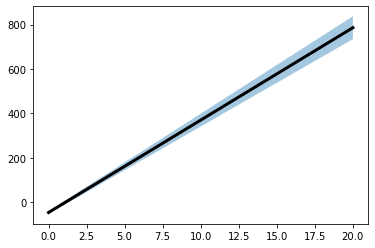

In [ ]:
popt, pov, label, func, out = get_odr_fit_and_labs(df_s,v_x,v_y, fit_func='linear', return_func=True, return_out_obj=True)
x = np.linspace(0,20)
#plt.plot(x, func(x))
plt.plot(x, func(x, *popt), c='k', linewidth=3,label='__nolegend__')

y1 = func(x, *(popt-out.sd_beta))
y2 = func(x, popt[0]-out.sd_beta[0],popt[1]+out.sd_beta[1], )
y3 = func(x, *(popt+out.sd_beta))
y4 = func(x, popt[0]+out.sd_beta[0],popt[1]-out.sd_beta[1], )
#ym = np.max(np.concatenate(y1,y2), axis=0)
ym = np.maximum(y1,y2)
ym = np.maximum(ym,y3)
ym = np.maximum(ym,y4)
ymi = np.minimum(y1,y2)
ymi = np.minimum(ymi,y3)
ymi = np.minimum(ymi,y4)


plt.fill_between(x, ymi,ym, alpha=.4)

In [271]:
#parameters, cov= curve_fit(f, x, y)

#model = scipy.odr.odrpack.Model(f_wrapper_for_odr)
#data = scipy.odr.odrpack.Data(x,y)
#myodr = scipy.odr.odrpack.ODR(data, model, beta0=parameters,  maxit=0)
#myodr.set_job(fit_type=2)
def compute_p_value(df_s, out, popt):
    parameters = popt
    parameterStatistics = out#myodr.run()    
    x = df_s.dropna()
    df_e = len(x) - len(popt) # degrees of freedom, error
    cov_beta = parameterStatistics.cov_beta # parameter covariance matrix from ODR
    sd_beta = parameterStatistics.sd_beta * parameterStatistics.sd_beta
    ci = []
    t_df = scipy.stats.t.ppf(0.975, df_e)
    ci = []
    for i in range(len(parameters)):
        ci.append([parameters[i] - t_df * parameterStatistics.sd_beta[i], parameters[i] + t_df * parameterStatistics.sd_beta[i]])

    tstat_beta = parameters / parameterStatistics.sd_beta # coeff t-statistics
    pstat_beta = (1.0 - scipy.stats.t.cdf(np.abs(tstat_beta), df_e)) * 2.0    # coef. p-values

    for i in range(len(parameters)):
        print('parameter:', parameters[i])
        print('   conf interval:', ci[i][0], ci[i][1])
        print('   tstat:', tstat_beta[i])
        print('   pstat:', pstat_beta[i])
        print()

## New version SON

Observations
Beta: [259.01981048 122.23656333]
Beta Std Error: [18.56494761 99.05112683]
Beta Covariance: [[ 173.90334896 -842.23668407]
 [-842.23668407 4950.38904212]]
Residual Variance: 1.9818898360732153
Inverse Condition #: 0.07139338650923563
Reason(s) for Halting:
  Sum of squares convergence
[259.01981048 122.23656333]
reason for haltng
parameter: 259.0198104806325
   conf interval: 222.0365383635309 296.0030825977341
   tstat: 13.952089492595373
   pstat: 0.0

parameter: 122.23656333292122
   conf interval: -75.08339975948086 319.5565264253233
   tstat: 1.2340754440600055
   pstat: 0.22102785216765808

NorESM
Beta: [ 160.21776151 1084.58418712]
Beta Std Error: [10.51367444 95.3589866 ]
Beta Covariance: [[  28.83521145 -242.46118778]
 [-242.46118778 2372.12376994]]
Residual Variance: 3.833415625867731
Inverse Condition #: 0.03885174285541075
Reason(s) for Halting:
  Sum of squares convergence
[ 160.21776151 1084.58418712]
reason for haltng
parameter: 160.21776150621457
   conf i

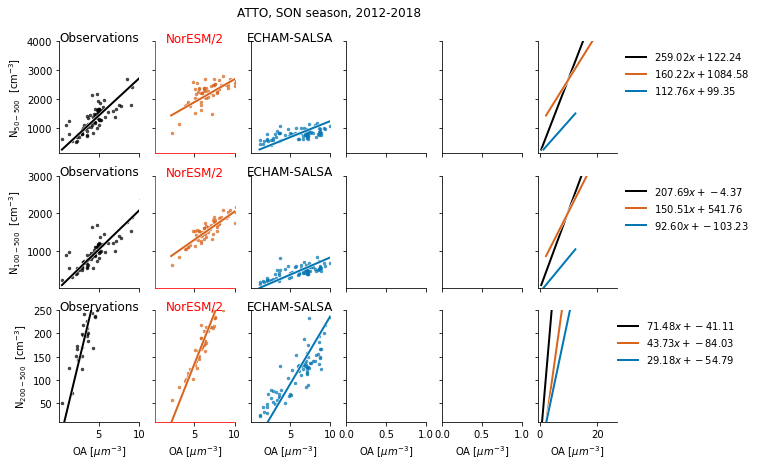

In [396]:
## Settings
alpha_scatt = 0.5
figsize=[10,7]
divide_NorESM_by_factor = 2
xlab = r'OA [$\mu m^{-3}$]'

season = 'SON'
source_list = models_and_obs[::-1]

xlims = [.1,10]

ylims = [100,4000]

# OBS: 
v_x = 'OA'

v_y = 'N50-500'
ylab = r'N$_{50-500}$  [cm$^{-3}$]'



xscale='linear'
yscale='linear'

fig, axs_all = plt.subplots(3,6,figsize=figsize, sharey='row', sharex='col')


## Settings
alpha_scatt = 0.6



# Make plot
axs_sub = axs_all[0,:]
axs_sub[0].set_ylabel(ylab)

make_plot2(v_x, v_y, xlims, ylims, season, 
              xlab=xlab, ylab=ylab, alpha_scat=.4,
             source_list = source_list, fig=fig, 
               axs=axs_sub,
              xscale='linear', yscale='linear',
              dic_df_med = dic_df_med,
           divide_NorESM_by_factor = divide_NorESM_by_factor,
         )


for mo, ax in zip(source_list, axs_sub):
    df_s =  dic_df_med[mo]
    print(mo)
    mask_months = select_months(df_s, season=season)
    df_s = df_s[mask_months].copy()
    if (mo =='NorESM') &  (divide_NorESM_by_factor is not None):
        df_s = df_s/divide_NorESM_by_factor

    #popt, pov, label, func = get_log_fit_abc(df_s,v_x,v_y, return_func=True)
    popt, pov, label, func, out = get_odr_fit_and_labs(df_s, v_x, v_y, fit_func='linear',  #beta0 = [0,500],
                                                       #least_square_kwrgs = dict(bounds=[[0,0],[1e9,1e9]]),
                                                       
                                                       return_func=True, return_out_obj=True)
    
    
    compute_p_value(df_s, out, popt)

    _mi = df_s[v_x].min()
    _ma = df_s[v_x].max() 
    _xlim = [_mi*.95, _ma*1.05]
    
    plot_fit(func, popt, mo, _xlim, yscale, xscale, ax, label=label)
    plot_fit(func, popt, mo, _xlim, yscale, xscale, axs_sub[-1], label=label)
    ax.set_yscale(yscale)
    ax.set_xscale(xscale)

axs_sub[-1].legend(bbox_to_anchor=(1,1,), frameon=False)
#xlims = [.01,10]

ylims = [15,3000]

# OBS: 
v_y = 'N100-500'
ylab = r'N$_{100-500}$  [cm$^{-3}$]'

xscale='linear'
yscale='linear'
axs_sub = axs_all[1,:]
axs_sub[0].set_ylabel(ylab)

make_plot2(v_x, v_y, xlims, ylims, season, 
              xlab=xlab, ylab=ylab, alpha_scat=.4,
             source_list =source_list, fig=fig, 
               axs=axs_sub,
              xscale='linear', yscale='linear',
              dic_df_med = dic_df_med,
           divide_NorESM_by_factor = divide_NorESM_by_factor,
           
         )
for mo, ax in zip(source_list, axs_sub):
    df_s =  dic_df_med[mo]
    print(mo)
    mask_months = select_months(df_s, season=season)
    df_s = df_s[mask_months].copy()
    if (mo =='NorESM') &  (divide_NorESM_by_factor is not None):
        df_s = df_s/divide_NorESM_by_factor

    popt, pov, label, func, out = get_odr_fit_and_labs(df_s,v_x,v_y, beta0 = [0,500],
                                                       #least_square_kwrgs = dict(bounds=[[0,0],[1e9,1e9]]),
                                                       
                                                  fit_func='linear', return_func=True, return_out_obj=True)
    compute_p_value(df_s, out, popt)
    
    _mi = df_s[v_x].min()
    _ma = df_s[v_x].max() 
    _xlim = [_mi*.95, _ma*1.05]
    
    plot_fit(func, popt, mo, _xlim, yscale, xscale, ax, label=label)
    plot_fit(func, popt, mo, _xlim, yscale, xscale, axs_sub[-1], label=label)

    ax.set_yscale(yscale)
    ax.set_xscale(xscale)

    

    
axs_sub[-1].legend(bbox_to_anchor=(1,1,), frameon=False)
    
    
#xlims = [.01,10]

ylims = [10,250]





# OBS: 
v_y = 'N200-500'
ylab = r'N$_{200-500}$  [cm$^{-3}$]'


xscale='linear'
yscale='linear'
axs_sub = axs_all[2,:]
axs_sub[0].set_ylabel(ylab)

make_plot2(v_x, v_y, xlims, ylims, season, 
              xlab=xlab, ylab=ylab, alpha_scat=.4,
             source_list = source_list, fig=fig, 
               axs=axs_sub,
              xscale='linear', yscale='linear',
              dic_df_med = dic_df_med,
           divide_NorESM_by_factor = divide_NorESM_by_factor,
           
         )

for mo, ax in zip(source_list, axs_sub):
    print(mo)
    df_s =  dic_df_med[mo]
    print(mo)
    mask_months = select_months(df_s, season=season)
    df_s = df_s[mask_months].copy()
    if (mo =='NorESM') &  (divide_NorESM_by_factor is not None):
        df_s = df_s/divide_NorESM_by_factor
    
    #popt, pov, label, func = get_log_fit_abc(df_s,v_x,v_y, return_func=True)
    popt, pov, label, func, out = get_odr_fit_and_labs(df_s,v_x,v_y, fit_func='linear', 
                                                       #least_square_kwrgs = dict(bounds=[[0,0],[1e9,1e9]]),
                                                       return_func=True, return_out_obj=True)
    compute_p_value(df_s, out, popt)
    _mi = df_s[v_x].min()
    _ma = df_s[v_x].max() 
    _xlim = [_mi*.95, _ma*1.05]
    
    plot_fit(func, popt, mo, _xlim, yscale, xscale, ax, label)
    plot_fit(func, popt, mo, _xlim, yscale, xscale, axs_sub[-1], label)

    ax.set_yscale(yscale)
    ax.set_xscale(xscale)

leg = axs_sub[-1].legend(bbox_to_anchor=(.9,1,), frameon=False)

    
for ax in axs_sub:
    ax.set_xlabel(xlab)
sns.despine(fig) 



    
    
fn = make_fn_scat(f'together_{season}_linscale', v_x, 'Nx')
#ax.legend(frameon=False)
fig.savefig(fn, dpi=150, bbox_inches='tight')#)
fig.savefig(fn.with_suffix('.pdf'), dpi=150, bbox_inches='tight')#)
print(fn)

Observations
Beta: [259.01981048 122.23656333]
Beta Std Error: [18.56494761 99.05112683]
Beta Covariance: [[ 173.90334896 -842.23668407]
 [-842.23668407 4950.38904212]]
Residual Variance: 1.9818898360732153
Inverse Condition #: 0.07139338650923563
Reason(s) for Halting:
  Sum of squares convergence
[259.01981048 122.23656333]
NorESM
Beta: [ 160.21782392 2169.16713753]
Beta Std Error: [ 10.51366822 190.71785675]
Beta Covariance: [[   7.20879434 -121.23043068]
 [-121.23043068 2372.12087284]]
Residual Variance: 15.333662503477074
Inverse Condition #: 0.020040569757954225
Reason(s) for Halting:
  Sum of squares convergence
[ 160.21782392 2169.16713753]
ECHAM-SALSA
Beta: [112.76278099  99.34621452]
Beta Std Error: [13.23663439 86.02364088]
Beta Covariance: [[  49.32824233 -307.61133567]
 [-307.61133567 2083.41666423]]
Residual Variance: 3.5518899878757173
Inverse Condition #: 0.03911793715163702
Reason(s) for Halting:
  Sum of squares convergence
[112.76278099  99.34621452]
Observations
Bet

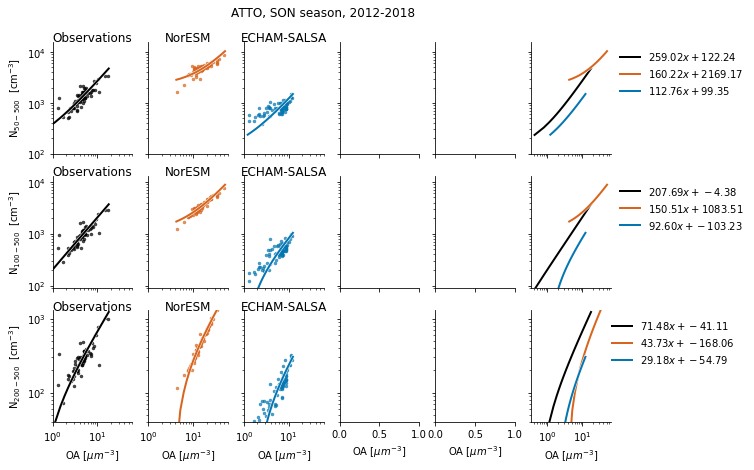

In [272]:
## Settings
alpha_scatt = 0.5
figsize=[10,7]

xlab = r'OA [$\mu m^{-3}$]'

season = 'SON'
source_list = models_and_obs[::-1]

xlims = [.1,50]
xlims = [1,60]

ylims = [100,16000]

# OBS: 
v_y = 'N50-500'
ylab = r'N$_{50-500}$  [cm$^{-3}$]'



xscale='log'
yscale='log'

fig, axs_all = plt.subplots(3,6,figsize=figsize, sharey='row', sharex='col')


## Settings
alpha_scatt = 0.6



# Make plot
axs_sub = axs_all[0,:]
axs_sub[0].set_ylabel(ylab)

make_plot2(v_x, v_y, xlims, ylims, season, 
              xlab=xlab, ylab=ylab, alpha_scat=.4,
             source_list = source_list, fig=fig, 
               axs=axs_sub,
              xscale='linear', yscale='linear',
              dic_df_med = dic_df_med,
         )


for mo, ax in zip(source_list, axs_sub):
    df_s =  dic_df_med[mo]
    print(mo)
    mask_months = select_months(df_s, season=season)
    df_s = df_s[mask_months].copy()
    
    #popt, pov, label, func = get_log_fit_abc(df_s,v_x,v_y, return_func=True)
    popt, pov, label, func = get_odr_fit_and_labs(df_s,v_x,v_y, fit_func='linear', return_func=True)

    _mi = df_s[v_x].min()
    _ma = df_s[v_x].max() 
    _xlim = [_mi*.95, _ma*1.05]
    
    plot_fit(func, popt, mo, _xlim, yscale, xscale, ax)
    plot_fit(func, popt, mo, _xlim, yscale, xscale, axs_sub[-1])
    ax.set_yscale(yscale)
    ax.set_xscale(xscale)

axs_sub[-1].legend(bbox_to_anchor=(1,1,), frameon=False)

ylims = [90,13000]

# OBS: 
v_y = 'N100-500'
ylab = r'N$_{100-500}$  [cm$^{-3}$]'


xscale='log'
yscale='log'
axs_sub = axs_all[1,:]
axs_sub[0].set_ylabel(ylab)

make_plot2(v_x, v_y, xlims, ylims, season, 
              xlab=xlab, ylab=ylab, alpha_scat=.4,
             source_list =source_list, fig=fig, 
               axs=axs_sub,
              xscale='linear', yscale='linear',
              dic_df_med = dic_df_med,
         )
for mo, ax in zip(source_list, axs_sub):
    df_s =  dic_df_med[mo]
    print(mo)
    mask_months = select_months(df_s, season=season)
    df_s = df_s[mask_months].copy()
    popt, pov, label, func = get_odr_fit_and_labs(df_s,v_x,v_y, fit_func='linear', return_func=True)
    _mi = df_s[v_x].min()
    _ma = df_s[v_x].max() 
    _xlim = [_mi*.95, _ma*1.05]
    
    plot_fit(func, popt, mo, _xlim, yscale, xscale, ax)
    plot_fit(func, popt, mo, _xlim, yscale, xscale, axs_sub[-1])

    ax.set_yscale(yscale)
    ax.set_xscale(xscale)

    
axs_sub[-1].legend(bbox_to_anchor=(1,1,), frameon=False)
    
    



ylims = [40,1300]




# OBS: 
v_y = 'N200-500'
ylab = r'N$_{200-500}$  [cm$^{-3}$]'


xscale='log'
yscale='log'

axs_sub = axs_all[2,:]
axs_sub[0].set_ylabel(ylab)

make_plot2(v_x, v_y, xlims, ylims, season, 
              xlab=xlab, ylab=ylab, alpha_scat=.4,
             source_list = source_list, fig=fig, 
               axs=axs_sub,
              xscale='linear', yscale='linear',
              dic_df_med = dic_df_med,
         )

for mo, ax in zip(source_list, axs_sub):
    print(mo)
    df_s =  dic_df_med[mo]
    print(mo)
    mask_months = select_months(df_s, season=season)
    df_s = df_s[mask_months].copy()
    
    #popt, pov, label, func = get_log_fit_abc(df_s,v_x,v_y, return_func=True)
    popt, pov, label, func = get_odr_fit_and_labs(df_s,v_x,v_y, fit_func='linear', return_func=True)
    _mi = df_s[v_x].min()
    _ma = df_s[v_x].max() 
    _xlim = [_mi*.95, _ma*1.05]
    
    plot_fit(func, popt, mo, _xlim, yscale, xscale, ax)
    plot_fit(func, popt, mo, _xlim, yscale, xscale, axs_sub[-1])

    ax.set_yscale(yscale)
    ax.set_xscale(xscale)

leg = axs_sub[-1].legend(bbox_to_anchor=(.9,1,), frameon=False)

    
for ax in axs_sub:
    ax.set_xlabel(xlab)
sns.despine(fig) 



    
    
fn = make_fn_scat(f'together_{season}', v_x, 'Nx')
#ax.legend(frameon=False)
fig.savefig(fn, dpi=150, bbox_inches='tight')#)
fig.savefig(fn.with_suffix('.pdf'), dpi=150, bbox_inches='tight')#)
print(fn)

### N50

#### DJF

(0.0, 28.35)
(0.0, 35.7)
(0.0, 35.7)
ECHAM-SALSA
Beta: [  839.96365608 -1701.87609491]
Beta Std Error: [263.60387059 803.6976249 ]
Beta Covariance: [[  45266.71207681 -136851.01732539]
 [-136851.01732539  420785.48940144]]
Residual Variance: 1.5350573832313121
Inverse Condition #: 0.033040989240703894
Reason(s) for Halting:
  Sum of squares convergence
[  839.96365608 -1701.87609491]
NorESM
Beta: [ 251.50355105 2051.53071824]
Beta Std Error: [ 20.64655063 244.82307825]
Beta Covariance: [[  52.33882307 -593.35286815]
 [-593.35286815 7359.25158375]]
Residual Variance: 8.144624349493318
Inverse Condition #: 0.02339092584898492
Reason(s) for Halting:
  Sum of squares convergence
[ 251.50355105 2051.53071824]
Observations
Beta: [262.35003335  76.37849805]
Beta Std Error: [ 20.87567191 119.0142274 ]
Beta Covariance: [[  51.86152451 -227.42824896]
 [-227.42824896 1685.62947624]]
Residual Variance: 8.403024819190644
Inverse Condition #: 0.1074650606012632
Reason(s) for Halting:
  Sum of square

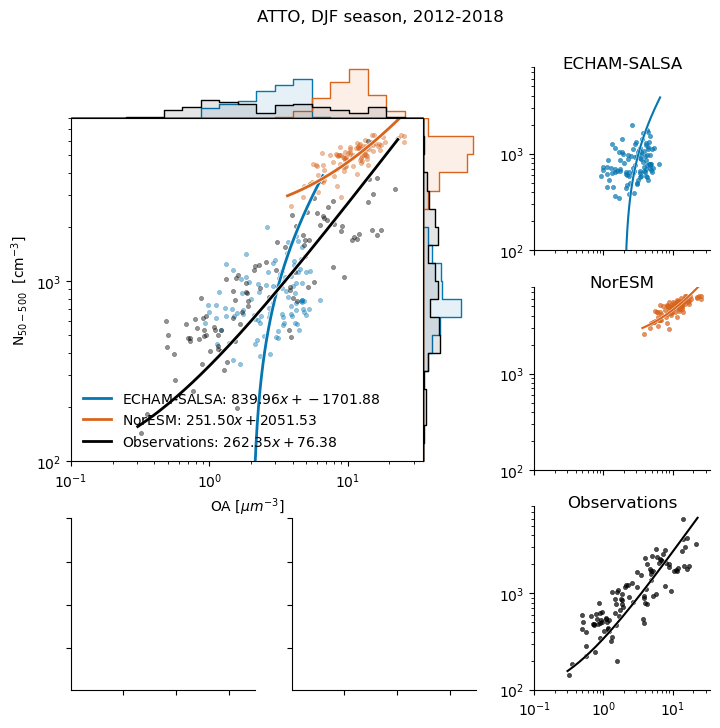

<Figure size 432x288 with 0 Axes>

<Figure size 432x288 with 0 Axes>

<Figure size 432x288 with 0 Axes>

In [231]:

## Settings
alpha_scatt = 0.5

ylab = r'N$_{50-500}$  [cm$^{-3}$]'
xlab = r'OA [$\mu m^{-3}$]'

season = 'DJF'
xlims = [.1,35]

ylims = [100,8000]

# OBS: 
v_x = 'OA'
v_y = 'N50-500'


xscale='log'
yscale='log'

fig, ax, daxs, axs_extra = make_cool_grid5()##ncols_extra=2, nrows_extra=2,)# w_ratio_sideplot=.5)
axs_extra = axs_extra.flatten()

## Settings
alpha_scatt = 0.6



# Make plot
make_plot(v_x, v_y, xlims, ylims, season, 
          xlab, ylab, .3, models_and_obs, fig, ax, daxs, axs_extra,
          yscale=yscale,
          xscale=xscale,
         )


for mo, ax_ex in zip(models_and_obs, axs_extra[:]):
    df_s =  dic_df_med[mo]
    print(mo)
    mask_months = select_months(df_s, season=season)
    df_s = df_s[mask_months].copy()
    popt, pov, label, func = get_odr_fit_and_labs(df_s,v_x,v_y, fit_func='linear', return_func=True)
    
    _mi = df_s[v_x].min()
    _ma = df_s[v_x].max() 
    _xlim = [_mi*.95, _ma*1.05]
    x = np.linspace(*_xlim,1000)
    ax.plot(x, func(x, *popt), c='w', linewidth=3,label='__nolegend__')
    ax.plot(x, func(x, *popt), linewidth=2, c=cdic_model[mo],label=f'{mo}: {label}')

    ax_ex.plot(x, func(x, *popt), c='w', linewidth=2,label=f'{mo}: {label}',
             )
    ax_ex.plot(x, func(x, *popt), c=cdic_model[mo],label=f'{mo}: {label}',
              )    
    ax_ex.set_yscale(yscale)
    ax_ex.set_xscale(xscale)


ax.set_yscale(yscale)
ax.set_xscale(xscale)


    
fn = make_fn_scat(f'lin1_{season}', v_x, v_y)
ax.legend(frameon=False)
fig.savefig(fn, dpi=150)
fig.savefig(fn.with_suffix('.pdf'), dpi=150)

#### JF

(0.0, 12.6)
(0.0, 15.75)
(0.0, 15.75)
ECHAM-SALSA
Beta: [  4108.83260537 -10864.07618665]
Beta Std Error: [12572.98631514 35431.75112081]
Beta Covariance: [[ 9.58084360e+07 -2.69937630e+08]
 [-2.69937630e+08  7.60872869e+08]]
Residual Variance: 1.649958933593429
Inverse Condition #: 0.005493000860692041
Reason(s) for Halting:
  Iteration limit reached
[  4108.83260537 -10864.07618665]
NorESM
Beta: [ 217.48633063 2544.41019813]
Beta Std Error: [ 22.53447494 267.60158993]
Beta Covariance: [[  52.0567691  -577.81594727]
 [-577.81594727 7341.07569804]]
Residual Variance: 9.754784431815255
Inverse Condition #: 0.028495600689286086
Reason(s) for Halting:
  Sum of squares convergence
[ 217.48633063 2544.41019813]
Observations
Beta: [336.20168959 154.58320938]
Beta Std Error: [11.67326499 31.57918029]
Beta Covariance: [[  634.36892971 -1240.61971274]
 [-1240.61971274  4642.57491425]]
Residual Variance: 0.2148042080326679
Inverse Condition #: 0.23271395969976885
Reason(s) for Halting:
  Sum of 

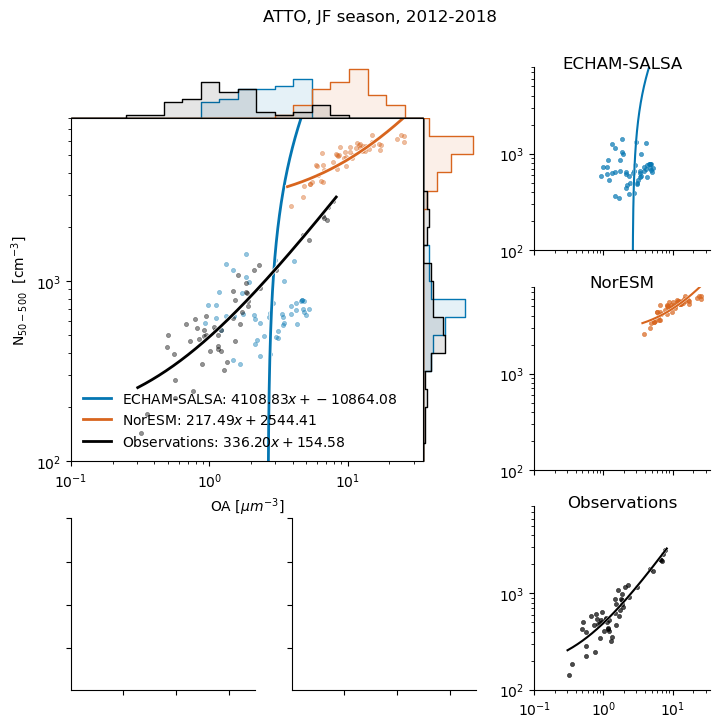

<Figure size 432x288 with 0 Axes>

<Figure size 432x288 with 0 Axes>

<Figure size 432x288 with 0 Axes>

In [75]:

## Settings
alpha_scatt = 0.5

ylab = r'N$_{50-500}$  [cm$^{-3}$]'
xlab = r'OA [$\mu m^{-3}$]'

season = 'JF'
xlims = [.1,35]

ylims = [100,8000]

# OBS: 
v_x = 'OA'
v_y = 'N50-500'


xscale='log'
yscale='log'

fig, ax, daxs, axs_extra = make_cool_grid5()##ncols_extra=2, nrows_extra=2,)# w_ratio_sideplot=.5)
axs_extra = axs_extra.flatten()

## Settings
alpha_scatt = 0.6



# Make plot
make_plot(v_x, v_y, xlims, ylims, season, 
          xlab, ylab, .3, models_and_obs, fig, ax, daxs, axs_extra,
          yscale=yscale,
          xscale=xscale,
         )


for mo, ax_ex in zip(models_and_obs, axs_extra[:]):
    df_s =  dic_df_med[mo]
    print(mo)
    mask_months = select_months(df_s, season=season)
    df_s = df_s[mask_months].copy()
    popt, pov, label, func = get_odr_fit_and_labs(df_s,v_x,v_y, fit_func='linear', return_func=True)
    
    _mi = df_s[v_x].min()
    _ma = df_s[v_x].max() 
    _xlim = [_mi*.95, _ma*1.05]
    x = np.linspace(*_xlim,1000)
    ax.plot(x, func(x, *popt), c='w', linewidth=3,label='__nolegend__')
    ax.plot(x, func(x, *popt), linewidth=2, c=cdic_model[mo],label=f'{mo}: {label}')

    ax_ex.plot(x, func(x, *popt), c='w', linewidth=2,label=f'{mo}: {label}',
             )
    ax_ex.plot(x, func(x, *popt), c=cdic_model[mo],label=f'{mo}: {label}',
              )    
    ax_ex.set_yscale(yscale)
    ax_ex.set_xscale(xscale)


ax.set_yscale(yscale)
ax.set_xscale(xscale)


    
fn = make_fn_scat(f'lin1_{season}', v_x, v_y)
ax.legend(frameon=False)
fig.savefig(fn, dpi=150)
fig.savefig(fn.with_suffix('.pdf'), dpi=150)

#### JFM

(0.0, 18.9)
(0.0, 18.9)
(0.0, 21.0)
ECHAM-SALSA
203
Beta: [  760.68413728 -1339.66421414]
Beta Std Error: [334.54132203 871.3645519 ]
Beta Covariance: [[  78307.75327985 -202698.45603689]
 [-202698.45603689  531257.41283167]]
Residual Variance: 1.4292058124100149
Inverse Condition #: 0.03184231163288849
Reason(s) for Halting:
  Sum of squares convergence
[  760.68413728 -1339.66421414]
NorESM
203
Beta: [ 265.70241069 1979.04620478]
Beta Std Error: [ 17.2115822  167.40594395]
Beta Covariance: [[  42.24112415 -367.30253892]
 [-367.30253892 3996.093352  ]]
Residual Variance: 7.013036884349719
Inverse Condition #: 0.04389091278576738
Reason(s) for Halting:
  Sum of squares convergence
[ 265.70241069 1979.04620478]
Observations
203
Beta: [365.29119327  35.8736804 ]
Beta Std Error: [12.49479063 26.68555098]
Beta Covariance: [[ 660.54728538 -994.29154159]
 [-994.29154159 3012.99418723]]
Residual Variance: 0.23634915527888417
Inverse Condition #: 0.2937944810987725
Reason(s) for Halting:
  Sum

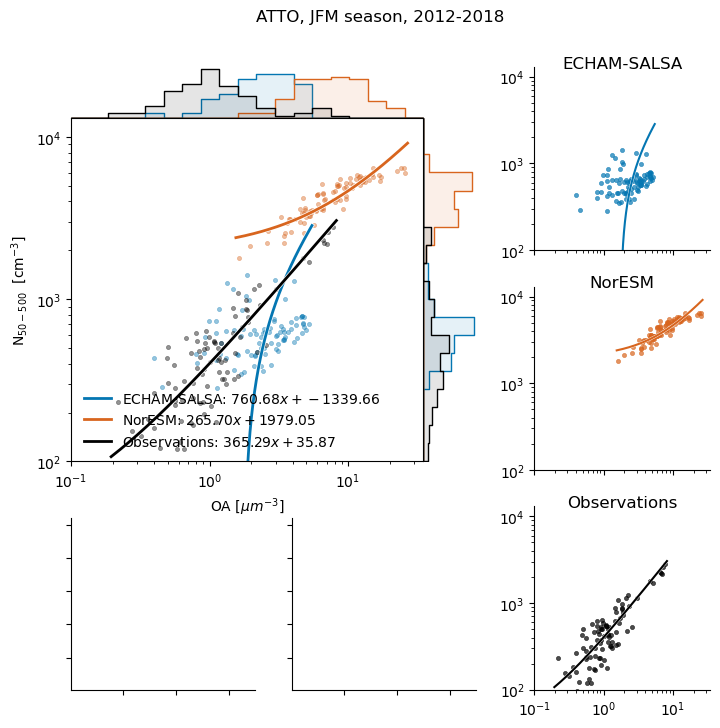

<Figure size 432x288 with 0 Axes>

<Figure size 432x288 with 0 Axes>

<Figure size 432x288 with 0 Axes>

In [76]:

## Settings
alpha_scatt = 0.5

ylab = r'N$_{50-500}$  [cm$^{-3}$]'
xlab = r'OA [$\mu m^{-3}$]'

season = 'JFM'
xlims = [.1,35]

ylims = [100,13000]

# OBS: 
v_x = 'OA'
v_y = 'N50-500'


xscale='log'
yscale='log'

fig, ax, daxs, axs_extra = make_cool_grid5()##ncols_extra=2, nrows_extra=2,)# w_ratio_sideplot=.5)
axs_extra = axs_extra.flatten()

## Settings
alpha_scatt = 0.6



# Make plot
make_plot(v_x, v_y, xlims, ylims, season, 
          xlab, ylab, .3, models_and_obs, fig, ax, daxs, axs_extra,
          yscale=yscale,
          xscale=xscale,
         )


for mo, ax_ex in zip(models_and_obs, axs_extra[:]):
    df_s =  dic_df_med[mo]
    print(mo)
    mask_months = select_months(df_s, season=season)
    df_s = df_s[mask_months].copy()
    print(len(df_s))
    popt, pov, label, func = get_odr_fit_and_labs(df_s,v_x,v_y, fit_func='linear', return_func=True)
    
    _mi = df_s[v_x].min()
    _ma = df_s[v_x].max() 
    _xlim = [_mi*.95, _ma*1.05]
    x = np.linspace(*_xlim,1000)
    ax.plot(x, func(x, *popt), c='w', linewidth=3,label='__nolegend__')
    ax.plot(x, func(x, *popt), linewidth=2, c=cdic_model[mo],label=f'{mo}: {label}')

    ax_ex.plot(x, func(x, *popt), c='w', linewidth=2,label=f'{mo}: {label}',
             )
    ax_ex.plot(x, func(x, *popt), c=cdic_model[mo],label=f'{mo}: {label}',
              )    
    ax_ex.set_yscale(yscale)
    ax_ex.set_xscale(xscale)


ax.set_yscale(yscale)
ax.set_xscale(xscale)


    
fn = make_fn_scat(f'lin1_{season}', v_x, v_y)
ax.legend(frameon=False)
fig.savefig(fn, dpi=150)
fig.savefig(fn.with_suffix('.pdf'), dpi=150)

#### WET_old

(0.0, 24.15)
(0.0, 34.65)
(0.0, 35.7)
ECHAM-SALSA
386
Beta: [ 327.17450757 -121.37484658]
Beta Std Error: [37.95638387 75.18994572]
Beta Covariance: [[ 1167.76745232 -2148.49559012]
 [-2148.49559012  4582.53983397]]
Residual Variance: 1.233710593207715
Inverse Condition #: 0.14133085123480765
Reason(s) for Halting:
  Sum of squares convergence
[ 327.17450757 -121.37484658]
NorESM
386
Beta: [ 280.68612537 1778.39354509]
Beta Std Error: [ 13.12505883 109.45849256]
Beta Covariance: [[  30.22276694 -222.53393294]
 [-222.53393294 2101.98992754]]
Residual Variance: 5.699913894447756
Inverse Condition #: 0.05336727051682675
Reason(s) for Halting:
  Sum of squares convergence
[ 280.68612537 1778.39354509]
Observations
386
Beta: [368.41966762   4.31400084]
Beta Std Error: [11.12248569 19.88812693]
Beta Covariance: [[ 566.41524165 -757.31353471]
 [-757.31353471 1811.0022347 ]]
Residual Variance: 0.2184081197390578
Inverse Condition #: 0.3092070563559554
Reason(s) for Halting:
  Sum of squares co

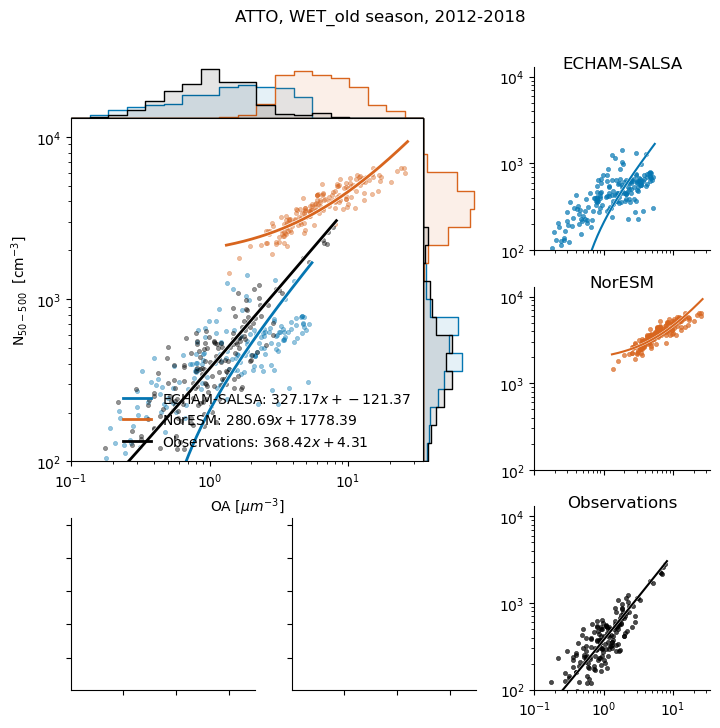

<Figure size 432x288 with 0 Axes>

<Figure size 432x288 with 0 Axes>

<Figure size 432x288 with 0 Axes>

In [77]:

## Settings
alpha_scatt = 0.5

ylab = r'N$_{50-500}$  [cm$^{-3}$]'
xlab = r'OA [$\mu m^{-3}$]'

season = 'WET_old'
xlims = [.1,35]

ylims = [100,13000]

# OBS: 
v_x = 'OA'
v_y = 'N50-500'


xscale='log'
yscale='log'

fig, ax, daxs, axs_extra = make_cool_grid5()##ncols_extra=2, nrows_extra=2,)# w_ratio_sideplot=.5)
axs_extra = axs_extra.flatten()

## Settings
alpha_scatt = 0.6



# Make plot
make_plot(v_x, v_y, xlims, ylims, season, 
          xlab, ylab, .3, models_and_obs, fig, ax, daxs, axs_extra,
          yscale=yscale,
          xscale=xscale,
         )


for mo, ax_ex in zip(models_and_obs, axs_extra[:]):
    df_s =  dic_df_med[mo]
    print(mo)
    mask_months = select_months(df_s, season=season)
    df_s = df_s[mask_months].copy()
    print(len(df_s))
    popt, pov, label, func = get_odr_fit_and_labs(df_s,v_x,v_y, fit_func='linear', return_func=True)
    
    _mi = df_s[v_x].min()
    _ma = df_s[v_x].max() 
    _xlim = [_mi*.95, _ma*1.05]
    x = np.linspace(*_xlim,1000)
    ax.plot(x, func(x, *popt), c='w', linewidth=3,label='__nolegend__')
    ax.plot(x, func(x, *popt), linewidth=2, c=cdic_model[mo],label=f'{mo}: {label}')

    ax_ex.plot(x, func(x, *popt), c='w', linewidth=2,label=f'{mo}: {label}',
             )
    ax_ex.plot(x, func(x, *popt), c=cdic_model[mo],label=f'{mo}: {label}',
              )    
    ax_ex.set_yscale(yscale)
    ax_ex.set_xscale(xscale)


ax.set_yscale(yscale)
ax.set_xscale(xscale)


    
fn = make_fn_scat(f'lin1_{season}', v_x, v_y)
ax.legend(frameon=False)
fig.savefig(fn, dpi=150)
fig.savefig(fn.with_suffix('.pdf'), dpi=150)

#### SON

(0.0, 24.15)
(0.0, 24.15)
(0.0, 26.25)
ECHAM-SALSA
273
Beta: [112.76278099  99.34621452]
Beta Std Error: [13.23663439 86.02364088]
Beta Covariance: [[  49.32824233 -307.61133567]
 [-307.61133567 2083.41666423]]
Residual Variance: 3.5518899878757173
Inverse Condition #: 0.03911793715163702
Reason(s) for Halting:
  Sum of squares convergence
[112.76278099  99.34621452]
NorESM
273
Beta: [ 160.21782392 2169.16713753]
Beta Std Error: [ 10.51366822 190.71785675]
Beta Covariance: [[   7.20879434 -121.23043068]
 [-121.23043068 2372.12087284]]
Residual Variance: 15.333662503477074
Inverse Condition #: 0.020040569757954225
Reason(s) for Halting:
  Sum of squares convergence
[ 160.21782392 2169.16713753]
Observations
273
Beta: [259.01981048 122.23656333]
Beta Std Error: [18.56494761 99.05112683]
Beta Covariance: [[ 173.90334896 -842.23668407]
 [-842.23668407 4950.38904212]]
Residual Variance: 1.9818898360732153
Inverse Condition #: 0.07139338650923563
Reason(s) for Halting:
  Sum of squares conve

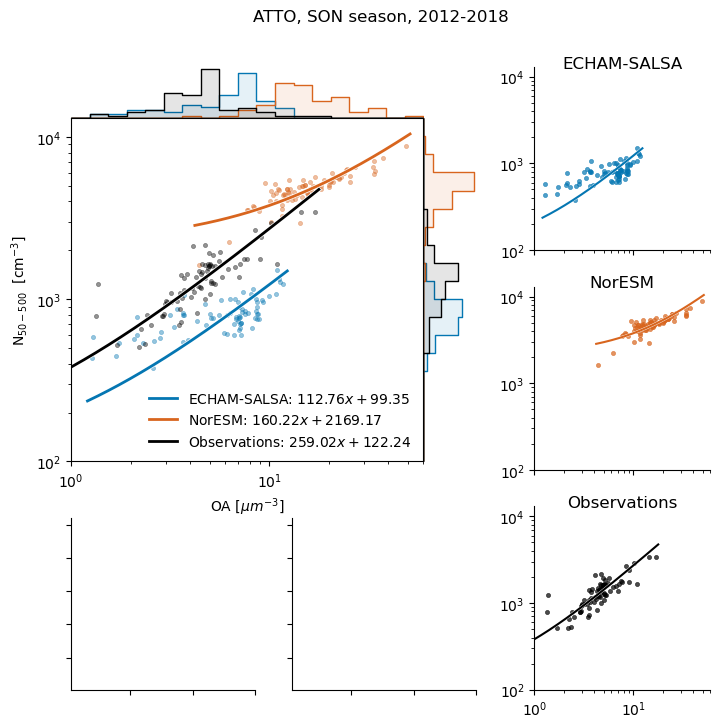

<Figure size 432x288 with 0 Axes>

<Figure size 432x288 with 0 Axes>

<Figure size 432x288 with 0 Axes>

In [78]:

## Settings
alpha_scatt = 0.5

ylab = r'N$_{50-500}$  [cm$^{-3}$]'
xlab = r'OA [$\mu m^{-3}$]'

season = 'SON'
xlims = [1,60]

ylims = [100,13000]

# OBS: 
v_x = 'OA'
v_y = 'N50-500'


xscale='log'
yscale='log'

fig, ax, daxs, axs_extra = make_cool_grid5()##ncols_extra=2, nrows_extra=2,)# w_ratio_sideplot=.5)
axs_extra = axs_extra.flatten()

## Settings
alpha_scatt = 0.6



# Make plot
make_plot(v_x, v_y, xlims, ylims, season, 
          xlab, ylab, .3, models_and_obs, fig, ax, daxs, axs_extra,
          yscale=yscale,
          xscale=xscale,
         )


for mo, ax_ex in zip(models_and_obs, axs_extra[:]):
    df_s =  dic_df_med[mo]
    print(mo)
    mask_months = select_months(df_s, season=season)
    df_s = df_s[mask_months].copy()
    print(len(df_s))
    popt, pov, label, func = get_odr_fit_and_labs(df_s,v_x,v_y, fit_func='linear', return_func=True)
    
    _mi = df_s[v_x].min()
    _ma = df_s[v_x].max() 
    _xlim = [_mi*.95, _ma*1.05]
    x = np.linspace(*_xlim,1000)
    ax.plot(x, func(x, *popt), c='w', linewidth=3,label='__nolegend__')
    ax.plot(x, func(x, *popt), linewidth=2, c=cdic_model[mo],label=f'{mo}: {label}')

    ax_ex.plot(x, func(x, *popt), c='w', linewidth=2,label=f'{mo}: {label}',
             )
    ax_ex.plot(x, func(x, *popt), c=cdic_model[mo],label=f'{mo}: {label}',
              )    
    ax_ex.set_yscale(yscale)
    ax_ex.set_xscale(xscale)


ax.set_yscale(yscale)
ax.set_xscale(xscale)


    
fn = make_fn_scat(f'lin1_{season}', v_x, v_y)
ax.legend(frameon=False)
fig.savefig(fn, dpi=150)
fig.savefig(fn.with_suffix('.pdf'), dpi=150)

#### DRY

(0.0, 37.8)
(0.0, 37.8)
(0.0, 50.4)
ECHAM-SALSA
Beta: [130.25657107  -5.71701699]
Beta Std Error: [ 9.02153043 62.74484998]
Beta Covariance: [[  30.5186727  -202.34530125]
 [-202.34530125 1476.25498015]]
Residual Variance: 2.666826701151685
Inverse Condition #: 0.03959160606635082
Reason(s) for Halting:
  Sum of squares convergence
[130.25657107  -5.71701699]
NorESM
Beta: [ 211.55267618 1541.43151643]
Beta Std Error: [ 12.54750716 219.86586877]
Beta Covariance: [[   9.00701735 -147.34330938]
 [-147.34330938 2765.55135552]]
Residual Variance: 17.479697187833576
Inverse Condition #: 0.01978757181946334
Reason(s) for Halting:
  Sum of squares convergence
[ 211.55267618 1541.43151643]
Observations
Beta: [238.49421389 279.87580003]
Beta Std Error: [11.52552327 72.28505389]
Beta Covariance: [[  45.01758913 -243.7060647 ]
 [-243.7060647  1770.75284102]]
Residual Variance: 2.950795218164344
Inverse Condition #: 0.07539702559282936
Reason(s) for Halting:
  Sum of squares convergence
[238.494213

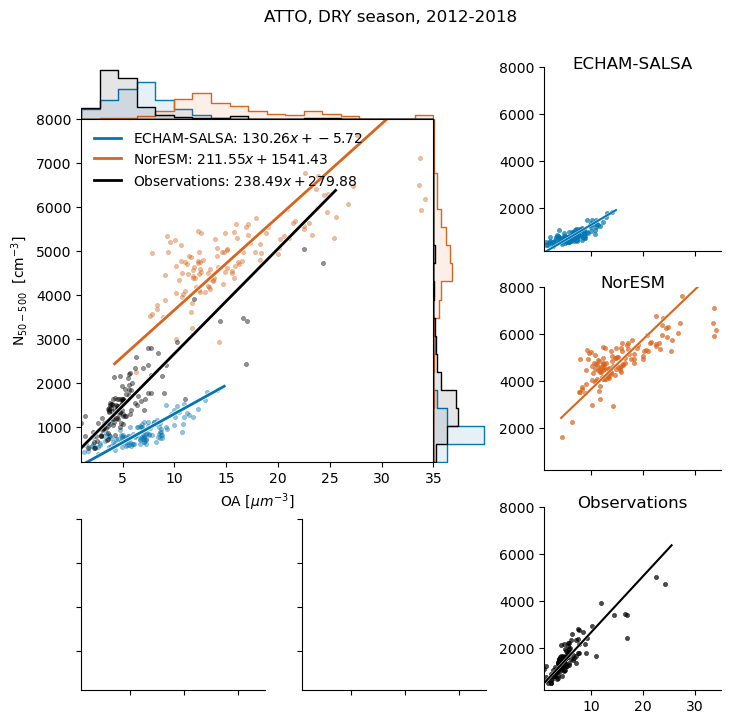

<Figure size 432x288 with 0 Axes>

<Figure size 432x288 with 0 Axes>

<Figure size 432x288 with 0 Axes>

In [79]:
#fig, axs = plt.subplots(1,1,dpi=150, figsize=[5,5])
# fig, ax, daxs, axs_extra = make_cool_grid3()
# ax = axsaxs_extra


## Settings
alpha_scatt = 0.5

ylab = r'N$_{50-500}$  [cm$^{-3}$]'
xlab = r'OA [$\mu m^{-3}$]'

season = 'DRY'
xlims = [1,35]

ylims = [200,8000]

# OBS: 
v_x = 'OA'
v_y = 'N50-500'


xscale='linear'
yscale='linear'

fig, ax, daxs, axs_extra = make_cool_grid5()##ncols_extra=2, nrows_extra=2,)# w_ratio_sideplot=.5)
axs_extra = axs_extra.flatten()

## Settings
alpha_scatt = 0.6




make_plot(v_x, v_y, xlims, ylims, season, 
              xlab, ylab, .3, models_and_obs, fig, ax, daxs, axs_extra,
          yscale=yscale,
          xscale=xscale,
         
         )


for mo, ax_ex in zip(models_and_obs, axs_extra[:]):
    df_s =  dic_df_med[mo]
    print(mo)
    mask_months = select_months(df_s, season=season)
    df_s = df_s[mask_months].copy()
    popt, pov, label, func = get_odr_fit_and_labs(df_s,v_x,v_y, fit_func='linear', return_func=True)
    
    _mi = df_s[v_x].min()
    _ma = df_s[v_x].max() 
    _xlim = [_mi*.95, _ma*1.05]
    x = np.linspace(*_xlim)
    ax.plot(x, func(x, *popt), c='w', linewidth=3,label='__nolegend__')
    ax.plot(x, func(x, *popt), linewidth=2, c=cdic_model[mo],label=f'{mo}: {label}')

    ax_ex.plot(x, func(x, *popt), c='w', linewidth=2,label=f'{mo}: {label}',
             )
    ax_ex.plot(x, func(x, *popt), c=cdic_model[mo],label=f'{mo}: {label}',
              )    
    ax_ex.set_yscale(yscale)
    ax_ex.set_xscale(xscale)


ax.set_yscale(yscale)
ax.set_xscale(xscale)


    
fn = make_fn_scat(f'lin1_{season}', v_x, v_y)
ax.legend(frameon=False)
fig.savefig(fn, dpi=150)
fig.savefig(fn.with_suffix('.pdf'), dpi=150)

#### WET

(0.0, 69.3)
(0.0, 79.8)
(0.0, 79.8)
ECHAM-SALSA
Beta: [ 388.47050851 -450.47522013]
Beta Std Error: [ 38.60898712 105.22474085]
Beta Covariance: [[  803.98205247 -2103.7081337 ]
 [-2103.7081337   5971.80017223]]
Residual Variance: 1.854088510743847
Inverse Condition #: 0.08118709083600427
Reason(s) for Halting:
  Sum of squares convergence
[ 388.47050851 -450.47522013]
NorESM
Beta: [ 261.95361255 1797.38727305]
Beta Std Error: [ 9.31399088 91.26806123]
Beta Covariance: [[  14.9903923  -135.61845753]
 [-135.61845753 1439.39182536]]
Residual Variance: 5.787068437034773
Inverse Condition #: 0.03706645410179307
Reason(s) for Halting:
  Sum of squares convergence
[ 261.95361255 1797.38727305]
Observations
Beta: [289.52768312  98.22842481]
Beta Std Error: [11.35858343 41.07770626]
Beta Covariance: [[  41.84913791 -109.74671049]
 [-109.74671049  547.33162389]]
Residual Variance: 3.0829169696258405
Inverse Condition #: 0.17925192199677709
Reason(s) for Halting:
  Sum of squares convergence
[28

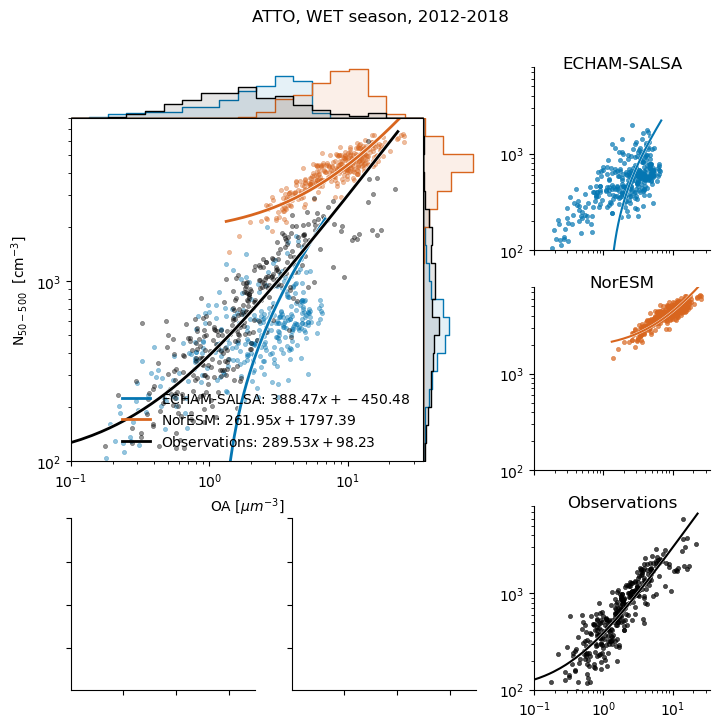

<Figure size 432x288 with 0 Axes>

<Figure size 432x288 with 0 Axes>

<Figure size 432x288 with 0 Axes>

In [80]:
#fig, axs = plt.subplots(1,1,dpi=150, figsize=[5,5])
# fig, ax, daxs, axs_extra = make_cool_grid3()
# ax = axsaxs_extra


## Settings
alpha_scatt = 0.5

ylab = r'N$_{50-500}$  [cm$^{-3}$]'
xlab = r'OA [$\mu m^{-3}$]'

season = 'WET'
xlims = [.1,35]

ylims = [100,8000]

# OBS: 
v_x = 'OA'
v_y = 'N50-500'


xscale='log'
yscale='log'

fig, ax, daxs, axs_extra = make_cool_grid5()##ncols_extra=2, nrows_extra=2,)# w_ratio_sideplot=.5)
axs_extra = axs_extra.flatten()

## Settings
alpha_scatt = 0.6




make_plot(v_x, v_y, xlims, ylims, season, 
              xlab, ylab, .3, models_and_obs, fig, ax, daxs, axs_extra,
          yscale=yscale,
          xscale=xscale,
         
         )


for mo, ax_ex in zip(models_and_obs, axs_extra[:]):
    df_s =  dic_df_med[mo]
    print(mo)
    mask_months = select_months(df_s, season=season)
    df_s = df_s[mask_months].copy()
    popt, pov, label, func = get_odr_fit_and_labs(df_s,v_x,v_y, fit_func='linear', return_func=True)
    
    _mi = df_s[v_x].min()
    _ma = df_s[v_x].max() 
    _xlim = [_mi*.95, _ma*1.05]
    x = np.linspace(*_xlim,1000)
    ax.plot(x, func(x, *popt), c='w', linewidth=3,label='__nolegend__')
    ax.plot(x, func(x, *popt), linewidth=2, c=cdic_model[mo],label=f'{mo}: {label}')

    ax_ex.plot(x, func(x, *popt), c='w', linewidth=2,label=f'{mo}: {label}',
             )
    ax_ex.plot(x, func(x, *popt), c=cdic_model[mo],label=f'{mo}: {label}',
              )    
    ax_ex.set_yscale(yscale)
    ax_ex.set_xscale(xscale)


ax.set_yscale(yscale)
ax.set_xscale(xscale)


    
fn = make_fn_scat(f'lin1_{season}', v_x, v_y)
ax.legend(frameon=False)
fig.savefig(fn, dpi=150)
fig.savefig(fn.with_suffix('.pdf'), dpi=150)

#### Wet mid

(0.0, 22.05)
(0.0, 31.5)
(0.0, 31.5)
ECHAM-SALSA
Beta: [289.25077505 -21.34633085]
Beta Std Error: [36.92488812 59.40521742]
Beta Covariance: [[ 1622.84593344 -2409.00580096]
 [-2409.00580096  4200.37528764]]
Residual Variance: 0.8401582275131972
Inverse Condition #: 0.17151615598680636
Reason(s) for Halting:
  Sum of squares convergence
[289.25077505 -21.34633085]
NorESM
Beta: [ 327.43676453 1514.09914879]
Beta Std Error: [ 20.337848  134.5958611]
Beta Covariance: [[ 112.94629435 -684.36374068]
 [-684.36374068 4946.81196813]]
Residual Variance: 3.662165843711834
Inverse Condition #: 0.05607442575124014
Reason(s) for Halting:
  Sum of squares convergence
[ 327.43676453 1514.09914879]
Observations
Beta: [372.57182651 -26.7309959 ]
Beta Std Error: [25.3897724  29.85589668]
Beta Covariance: [[ 3626.54267797 -3798.53138443]
 [-3798.53138443  5014.5898288 ]]
Residual Variance: 0.1777562266921835
Inverse Condition #: 0.22370008173520203
Reason(s) for Halting:
  Sum of squares convergence
[37

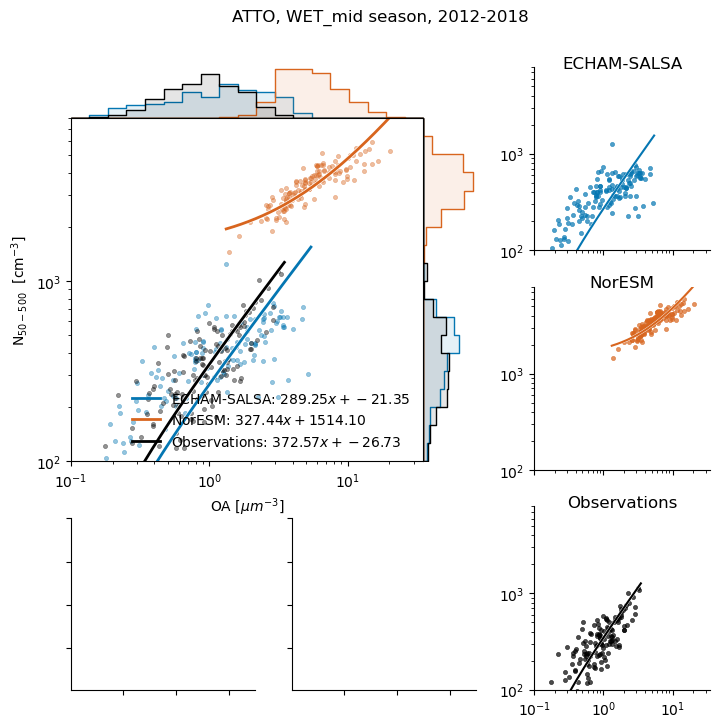

<Figure size 432x288 with 0 Axes>

<Figure size 432x288 with 0 Axes>

<Figure size 432x288 with 0 Axes>

In [81]:
#fig, axs = plt.subplots(1,1,dpi=150, figsize=[5,5])
# fig, ax, daxs, axs_extra = make_cool_grid3()
# ax = axsaxs_extra


## Settings
alpha_scatt = 0.5

ylab = r'N$_{50-500}$  [cm$^{-3}$]'
xlab = r'OA [$\mu m^{-3}$]'

season = 'WET_mid'
xlims = [.1,35]

ylims = [100,8000]

# OBS: 
v_x = 'OA'
v_y = 'N50-500'


xscale='log'
yscale='log'

fig, ax, daxs, axs_extra = make_cool_grid5()##ncols_extra=2, nrows_extra=2,)# w_ratio_sideplot=.5)
axs_extra = axs_extra.flatten()

## Settings
alpha_scatt = 0.6




make_plot(v_x, v_y, xlims, ylims, season, 
              xlab, ylab, .3, models_and_obs, fig, ax, daxs, axs_extra,
          yscale=yscale,
          xscale=xscale,
         
         )


for mo, ax_ex in zip(models_and_obs, axs_extra[:]):
    df_s =  dic_df_med[mo]
    print(mo)
    mask_months = select_months(df_s, season=season)
    df_s = df_s[mask_months].copy()
    popt, pov, label, func = get_odr_fit_and_labs(df_s,v_x,v_y, fit_func='linear', return_func=True)
    
    _mi = df_s[v_x].min()
    _ma = df_s[v_x].max() 
    _xlim = [_mi*.95, _ma*1.05]
    x = np.linspace(*_xlim,1000)
    ax.plot(x, func(x, *popt), c='w', linewidth=3,label='__nolegend__')
    ax.plot(x, func(x, *popt), linewidth=2, c=cdic_model[mo],label=f'{mo}: {label}')

    ax_ex.plot(x, func(x, *popt), c='w', linewidth=2,label=f'{mo}: {label}',
             )
    ax_ex.plot(x, func(x, *popt), c=cdic_model[mo],label=f'{mo}: {label}',
              )    
    ax_ex.set_yscale(yscale)
    ax_ex.set_xscale(xscale)


ax.set_yscale(yscale)
ax.set_xscale(xscale)


    
fn = make_fn_scat(f'lin1_{season}', v_x, v_y)
ax.legend(frameon=False)
fig.savefig(fn, dpi=150)
fig.savefig(fn.with_suffix('.pdf'), dpi=150)

#### Wet_early

(0.0, 32.55)
(0.0, 36.75)
(0.0, 36.75)
ECHAM-SALSA
Beta: [  624.94888033 -1012.12675302]
Beta Std Error: [121.9664969 349.6922844]
Beta Covariance: [[ 10687.68558816 -30141.5936153 ]
 [-30141.5936153   87856.65596205]]
Residual Variance: 1.3918660166528614
Inverse Condition #: 0.048860367603156235
Reason(s) for Halting:
  Sum of squares convergence
[  624.94888033 -1012.12675302]
NorESM
Beta: [ 267.06236952 1889.99437196]
Beta Std Error: [ 14.48857774 152.71668494]
Beta Covariance: [[  31.6263866  -307.6724107 ]
 [-307.6724107  3513.75147433]]
Residual Variance: 6.6374602844872355
Inverse Condition #: 0.03466641053093757
Reason(s) for Halting:
  Sum of squares convergence
[ 267.06236952 1889.99437196]
Observations
Beta: [264.83884219  58.45229015]
Beta Std Error: [16.11419573 78.86734519]
Beta Covariance: [[  42.2362827  -145.28522135]
 [-145.28522135 1011.72588865]]
Residual Variance: 6.147967752794847
Inverse Condition #: 0.14097082587618784
Reason(s) for Halting:
  Sum of squares co

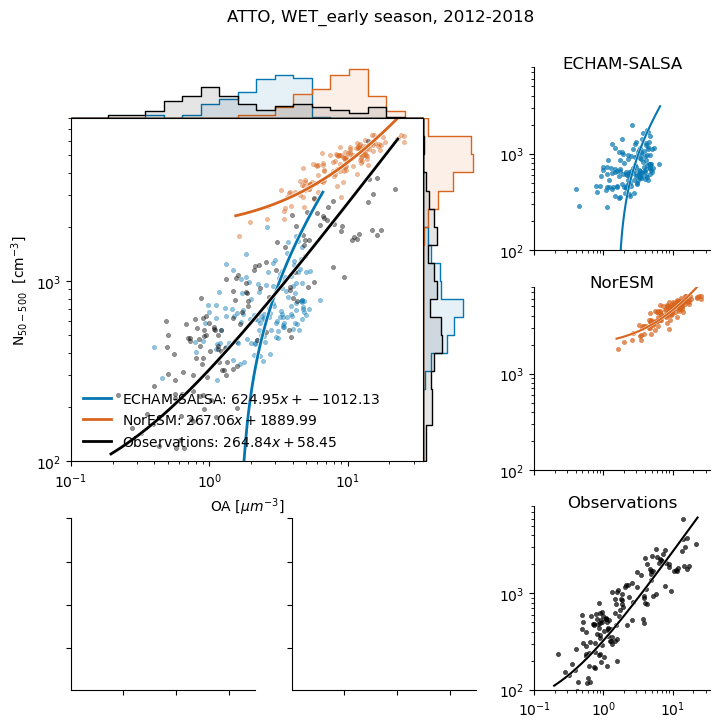

<Figure size 432x288 with 0 Axes>

<Figure size 432x288 with 0 Axes>

<Figure size 432x288 with 0 Axes>

In [82]:
#fig, axs = plt.subplots(1,1,dpi=150, figsize=[5,5])
# fig, ax, daxs, axs_extra = make_cool_grid3()
# ax = axsaxs_extra


## Settings
alpha_scatt = 0.5

ylab = r'N$_{50-500}$  [cm$^{-3}$]'
xlab = r'OA [$\mu m^{-3}$]'

season = 'WET_early'
xlims = [.1,35]

ylims = [100,8000]

# OBS: 
v_x = 'OA'
v_y = 'N50-500'


xscale='log'
yscale='log'

fig, ax, daxs, axs_extra = make_cool_grid5()##ncols_extra=2, nrows_extra=2,)# w_ratio_sideplot=.5)
axs_extra = axs_extra.flatten()

## Settings
alpha_scatt = 0.6




make_plot(v_x, v_y, xlims, ylims, season, 
              xlab, ylab, .3, models_and_obs, fig, ax, daxs, axs_extra,
          yscale=yscale,
          xscale=xscale,
         
         )


for mo, ax_ex in zip(models_and_obs, axs_extra[:]):
    df_s =  dic_df_med[mo]
    print(mo)
    mask_months = select_months(df_s, season=season)
    df_s = df_s[mask_months].copy()
    popt, pov, label, func = get_odr_fit_and_labs(df_s,v_x,v_y, fit_func='linear', return_func=True)
    
    _mi = df_s[v_x].min()
    _ma = df_s[v_x].max() 
    _xlim = [_mi*.95, _ma*1.05]
    x = np.linspace(*_xlim,1000)
    ax.plot(x, func(x, *popt), c='w', linewidth=3,label='__nolegend__')
    ax.plot(x, func(x, *popt), linewidth=2, c=cdic_model[mo],label=f'{mo}: {label}')

    ax_ex.plot(x, func(x, *popt), c='w', linewidth=2,label=f'{mo}: {label}',
             )
    ax_ex.plot(x, func(x, *popt), c=cdic_model[mo],label=f'{mo}: {label}',
              )    
    ax_ex.set_yscale(yscale)
    ax_ex.set_xscale(xscale)


ax.set_yscale(yscale)
ax.set_xscale(xscale)


    
fn = make_fn_scat(f'lin1_{season}', v_x, v_y)
ax.legend(frameon=False)
fig.savefig(fn, dpi=150)
fig.savefig(fn.with_suffix('.pdf'), dpi=150)

#### Wet_late

(0.0, 36.75)
(0.0, 44.1)
(0.0, 44.1)
ECHAM-SALSA
Beta: [145.01592101  72.50352838]
Beta Std Error: [10.32776912 28.49021364]
Beta Covariance: [[  74.11414463 -182.8127963 ]
 [-182.8127963   564.00047701]]
Residual Variance: 1.4391694803497423
Inverse Condition #: 0.1355646496370164
Reason(s) for Halting:
  Sum of squares convergence
[145.01592101  72.50352838]
NorESM
Beta: [ 236.37424881 1911.15018425]
Beta Std Error: [10.69666054 98.85770107]
Beta Covariance: [[  24.23943293 -207.13048753]
 [-207.13048753 2070.36559422]]
Residual Variance: 4.7203475015053815
Inverse Condition #: 0.0388165037368511
Reason(s) for Halting:
  Sum of squares convergence
[ 236.37424881 1911.15018425]
Observations
Beta: [409.32882244 -51.965499  ]
Beta Std Error: [13.03131196 30.93818572]
Beta Covariance: [[  579.44985473 -1170.71183312]
 [-1170.71183312  3266.0983603 ]]
Residual Variance: 0.293062617773759
Inverse Condition #: 0.1844619545758398
Reason(s) for Halting:
  Sum of squares convergence
[409.32882

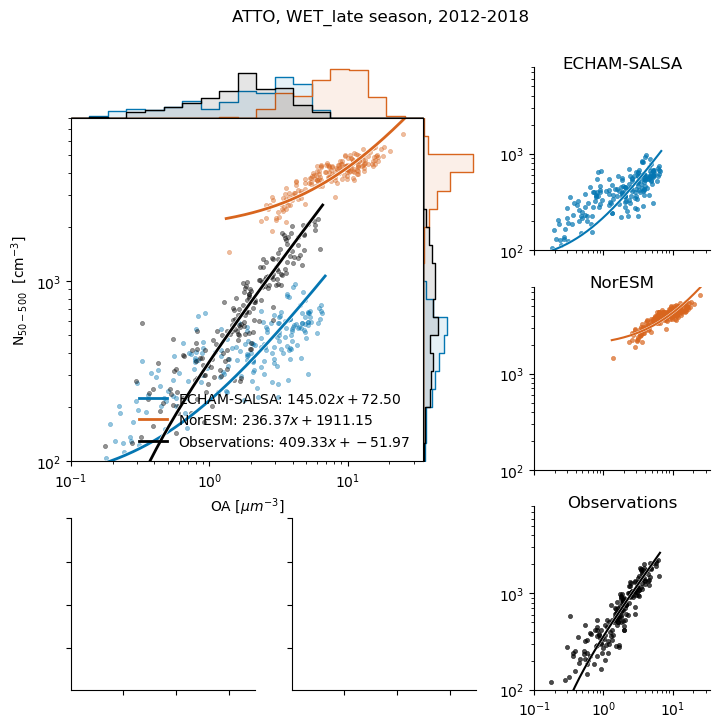

<Figure size 432x288 with 0 Axes>

<Figure size 432x288 with 0 Axes>

<Figure size 432x288 with 0 Axes>

In [83]:
#fig, axs = plt.subplots(1,1,dpi=150, figsize=[5,5])
# fig, ax, daxs, axs_extra = make_cool_grid3()
# ax = axsaxs_extra


## Settings
alpha_scatt = 0.5

ylab = r'N$_{50-500}$  [cm$^{-3}$]'
xlab = r'OA [$\mu m^{-3}$]'

season = 'WET_late'
xlims = [.1,35]

ylims = [100,8000]

# OBS: 
v_x = 'OA'
v_y = 'N50-500'


xscale='log'
yscale='log'

fig, ax, daxs, axs_extra = make_cool_grid5()##ncols_extra=2, nrows_extra=2,)# w_ratio_sideplot=.5)
axs_extra = axs_extra.flatten()

## Settings
alpha_scatt = 0.6




make_plot(v_x, v_y, xlims, ylims, season, 
              xlab, ylab, .3, models_and_obs, fig, ax, daxs, axs_extra,
          yscale=yscale,
          xscale=xscale,
         
         )


for mo, ax_ex in zip(models_and_obs, axs_extra[:]):
    df_s =  dic_df_med[mo]
    print(mo)
    mask_months = select_months(df_s, season=season)
    df_s = df_s[mask_months].copy()
    popt, pov, label, func = get_odr_fit_and_labs(df_s,v_x,v_y, fit_func='linear', return_func=True)
    
    _mi = df_s[v_x].min()
    _ma = df_s[v_x].max() 
    _xlim = [_mi*.95, _ma*1.05]
    x = np.linspace(*_xlim,1000)
    ax.plot(x, func(x, *popt), c='w', linewidth=3,label='__nolegend__')
    ax.plot(x, func(x, *popt), linewidth=2, c=cdic_model[mo],label=f'{mo}: {label}')

    ax_ex.plot(x, func(x, *popt), c='w', linewidth=2,label=f'{mo}: {label}',
             )
    ax_ex.plot(x, func(x, *popt), c=cdic_model[mo],label=f'{mo}: {label}',
              )    
    ax_ex.set_yscale(yscale)
    ax_ex.set_xscale(xscale)


ax.set_yscale(yscale)
ax.set_xscale(xscale)


    
fn = make_fn_scat(f'lin1_{season}', v_x, v_y)
ax.legend(frameon=False)
fig.savefig(fn, dpi=150)
fig.savefig(fn.with_suffix('.pdf'), dpi=150)

## N100

#### WET_old

(0.0, 24.15)
(0.0, 34.65)
(0.0, 35.7)
ECHAM-SALSA
386
Beta: [ 204.41040385 -179.24574569]
Beta Std Error: [21.13106181 42.33631353]
Beta Covariance: [[ 390.7249619  -718.86912046]
 [-718.86912046 1568.3919128 ]]
Residual Variance: 1.1428032934716927
Inverse Condition #: 0.15107285177523314
Reason(s) for Halting:
  Sum of squares convergence
[ 204.41040385 -179.24574569]
NorESM
386
Beta: [240.35482367 550.24377935]
Beta Std Error: [ 4.65557493 40.03240172]
Beta Covariance: [[  17.22941484 -126.86229391]
 [-126.86229391 1273.93473163]]
Residual Variance: 1.2579868871561304
Inverse Condition #: 0.05743761504635003
Reason(s) for Halting:
  Sum of squares convergence
[240.35482367 550.24377935]
Observations
386
Beta: [260.42708139 -37.49266411]
Beta Std Error: [ 7.27392798 13.06226478]
Beta Covariance: [[ 277.67132897 -371.28748291]
 [-371.28748291  895.42664056]]
Residual Variance: 0.19054912305569108
Inverse Condition #: 0.31036806402374917
Reason(s) for Halting:
  Sum of squares converge

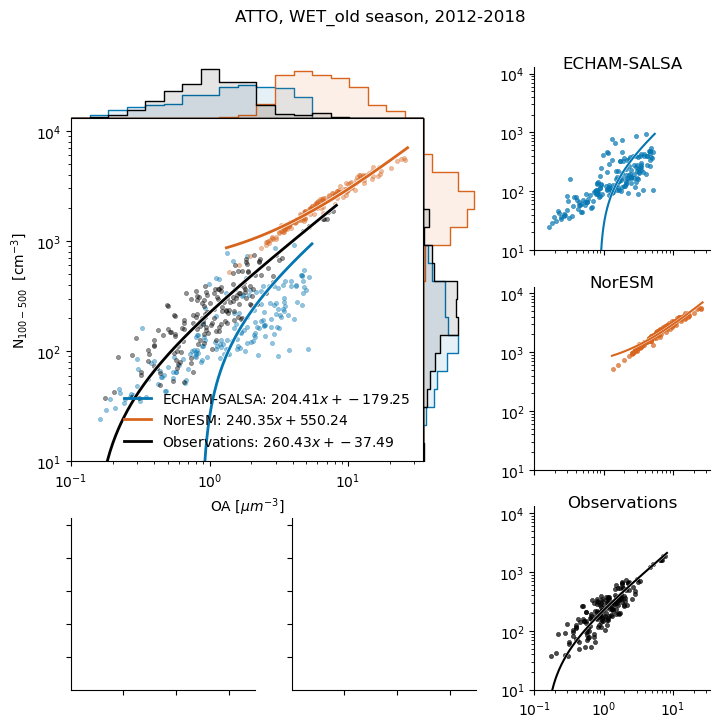

<Figure size 432x288 with 0 Axes>

<Figure size 432x288 with 0 Axes>

<Figure size 432x288 with 0 Axes>

In [85]:

## Settings
alpha_scatt = 0.5

ylab = r'N$_{100-500}$  [cm$^{-3}$]'
xlab = r'OA [$\mu m^{-3}$]'

season = 'WET_old'
xlims = [.1,35]

ylims = [10,13000]

# OBS: 
v_x = 'OA'
v_y = 'N100-500'


xscale='log'
yscale='log'

fig, ax, daxs, axs_extra = make_cool_grid5()##ncols_extra=2, nrows_extra=2,)# w_ratio_sideplot=.5)
axs_extra = axs_extra.flatten()

## Settings
alpha_scatt = 0.6



# Make plot
make_plot(v_x, v_y, xlims, ylims, season, 
          xlab, ylab, .3, models_and_obs, fig, ax, daxs, axs_extra,
          yscale=yscale,
          xscale=xscale,
         )


for mo, ax_ex in zip(models_and_obs, axs_extra[:]):
    df_s =  dic_df_med[mo]
    print(mo)
    mask_months = select_months(df_s, season=season)
    df_s = df_s[mask_months].copy()
    print(len(df_s))
    popt, pov, label, func = get_odr_fit_and_labs(df_s,v_x,v_y, fit_func='linear', return_func=True)
    
    _mi = df_s[v_x].min()
    _ma = df_s[v_x].max() 
    _xlim = [_mi*.95, _ma*1.05]
    x = np.linspace(*_xlim,1000)
    ax.plot(x, func(x, *popt), c='w', linewidth=3,label='__nolegend__')
    ax.plot(x, func(x, *popt), linewidth=2, c=cdic_model[mo],label=f'{mo}: {label}')

    ax_ex.plot(x, func(x, *popt), c='w', linewidth=2,label=f'{mo}: {label}',
             )
    ax_ex.plot(x, func(x, *popt), c=cdic_model[mo],label=f'{mo}: {label}',
              )    
    ax_ex.set_yscale(yscale)
    ax_ex.set_xscale(xscale)


ax.set_yscale(yscale)
ax.set_xscale(xscale)


    
fn = make_fn_scat(f'lin1_{season}', v_x, v_y)
ax.legend(frameon=False)
fig.savefig(fn, dpi=150)
fig.savefig(fn.with_suffix('.pdf'), dpi=150)

#### JFM

(0.0, 18.9)
(0.0, 18.9)
(0.0, 21.0)
ECHAM-SALSA
203
Beta: [ 375.31365654 -676.3967037 ]
Beta Std Error: [100.76755876 264.80836008]
Beta Covariance: [[  7782.81910692 -20145.71142323]
 [-20145.71142323  53747.57141193]]
Residual Variance: 1.3046816018643277
Inverse Condition #: 0.04993357033344365
Reason(s) for Halting:
  Sum of squares convergence
[ 375.31365654 -676.3967037 ]
NorESM
203
Beta: [235.63865279 596.97057402]
Beta Std Error: [ 6.53581064 65.30964603]
Beta Covariance: [[  26.02853438 -226.32814733]
 [-226.32814733 2598.99505212]]
Residual Variance: 1.6411535149564496
Inverse Condition #: 0.047319376763874904
Reason(s) for Halting:
  Sum of squares convergence
[235.63865279 596.97057402]
Observations
203
Beta: [257.06736329   1.86295957]
Beta Std Error: [ 7.42936172 15.97457558]
Beta Covariance: [[ 318.5243246  -479.4355414 ]
 [-479.4355414  1472.64562785]]
Residual Variance: 0.17328477408456472
Inverse Condition #: 0.2948194373602746
Reason(s) for Halting:
  Sum of squares 

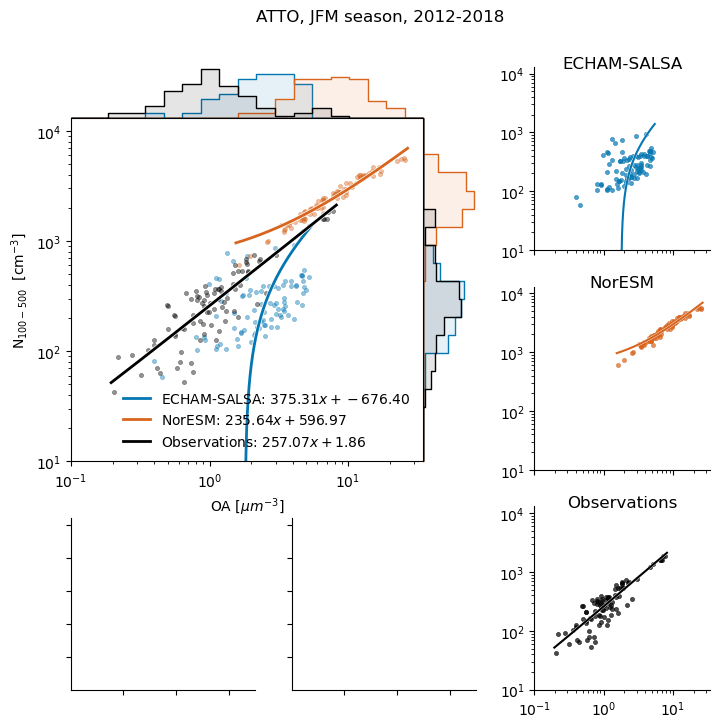

<Figure size 432x288 with 0 Axes>

<Figure size 432x288 with 0 Axes>

<Figure size 432x288 with 0 Axes>

In [86]:

## Settings
alpha_scatt = 0.5

ylab = r'N$_{100-500}$  [cm$^{-3}$]'
xlab = r'OA [$\mu m^{-3}$]'

season = 'JFM'
xlims = [.1,35]

ylims = [10,13000]

# OBS: 
v_x = 'OA'
v_y = 'N100-500'


xscale='log'
yscale='log'

fig, ax, daxs, axs_extra = make_cool_grid5()##ncols_extra=2, nrows_extra=2,)# w_ratio_sideplot=.5)
axs_extra = axs_extra.flatten()

## Settings
alpha_scatt = 0.6



# Make plot
make_plot(v_x, v_y, xlims, ylims, season, 
          xlab, ylab, .3, models_and_obs, fig, ax, daxs, axs_extra,
          yscale=yscale,
          xscale=xscale,
         )


for mo, ax_ex in zip(models_and_obs, axs_extra[:]):
    df_s =  dic_df_med[mo]
    print(mo)
    mask_months = select_months(df_s, season=season)
    df_s = df_s[mask_months].copy()
    print(len(df_s))
    popt, pov, label, func = get_odr_fit_and_labs(df_s,v_x,v_y, fit_func='linear', return_func=True)
    
    _mi = df_s[v_x].min()
    _ma = df_s[v_x].max() 
    _xlim = [_mi*.95, _ma*1.05]
    x = np.linspace(*_xlim,1000)
    ax.plot(x, func(x, *popt), c='w', linewidth=3,label='__nolegend__')
    ax.plot(x, func(x, *popt), linewidth=2, c=cdic_model[mo],label=f'{mo}: {label}')

    ax_ex.plot(x, func(x, *popt), c='w', linewidth=2,label=f'{mo}: {label}',
             )
    ax_ex.plot(x, func(x, *popt), c=cdic_model[mo],label=f'{mo}: {label}',
              )    
    ax_ex.set_yscale(yscale)
    ax_ex.set_xscale(xscale)


ax.set_yscale(yscale)
ax.set_xscale(xscale)


    
fn = make_fn_scat(f'lin1_{season}', v_x, v_y)
ax.legend(frameon=False)
fig.savefig(fn, dpi=150)
fig.savefig(fn.with_suffix('.pdf'), dpi=150)

#### SON

(0.0, 24.15)
(0.0, 24.15)
(0.0, 26.25)
ECHAM-SALSA
273
Beta: [  92.60081914 -103.22712829]
Beta Std Error: [ 8.09768663 53.23217853]
Beta Covariance: [[  25.74230995 -160.52892387]
 [-160.52892387 1112.43350974]]
Residual Variance: 2.547266696121592
Inverse Condition #: 0.043755249303639936
Reason(s) for Halting:
  Sum of squares convergence
[  92.60081914 -103.22712829]
NorESM
273
Beta: [ 150.51498804 1083.51455335]
Beta Std Error: [ 5.29415504 97.4468653 ]
Beta Covariance: [[   5.25530542  -88.37853776]
 [ -88.37853776 1780.49351265]]
Residual Variance: 5.333291859459505
Inverse Condition #: 0.021474060158037954
Reason(s) for Halting:
  Sum of squares convergence
[ 150.51498804 1083.51455335]
Observations
273
Beta: [207.6874634  -4.3771651]
Beta Std Error: [13.53386272 72.53360975]
Beta Covariance: [[ 106.38577957 -515.25209085]
 [-515.25209085 3055.75569197]]
Residual Variance: 1.7217098070597607
Inverse Condition #: 0.07270145609021847
Reason(s) for Halting:
  Sum of squares conver

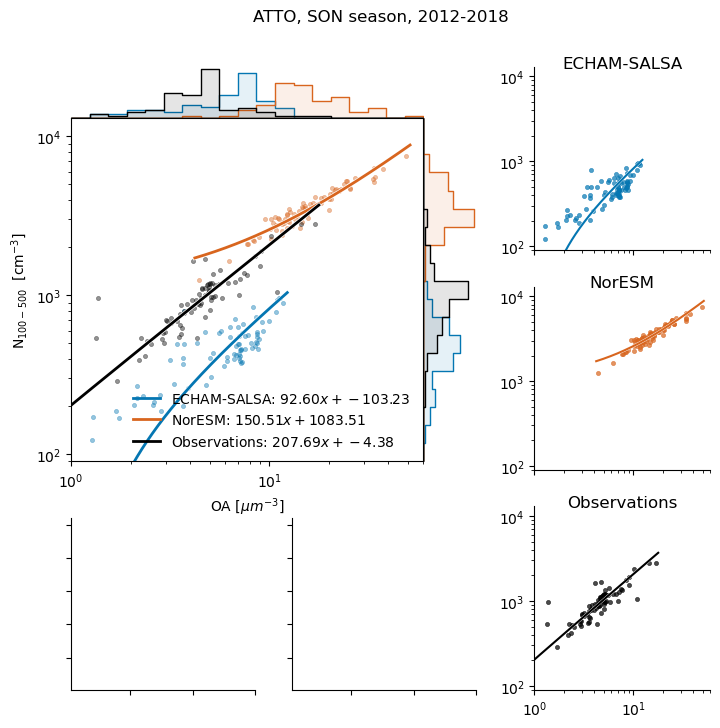

<Figure size 432x288 with 0 Axes>

<Figure size 432x288 with 0 Axes>

<Figure size 432x288 with 0 Axes>

In [137]:

## Settings
alpha_scatt = 0.5

ylab = r'N$_{100-500}$  [cm$^{-3}$]'
xlab = r'OA [$\mu m^{-3}$]'

season = 'SON'
xlims = [1,60]

ylims = [90,13000]

# OBS: 
v_x = 'OA'
v_y = 'N100-500'


xscale='log'
yscale='log'

fig, ax, daxs, axs_extra = make_cool_grid5()##ncols_extra=2, nrows_extra=2,)# w_ratio_sideplot=.5)
axs_extra = axs_extra.flatten()

## Settings
alpha_scatt = 0.6



# Make plot
make_plot(v_x, v_y, xlims, ylims, season, 
          xlab, ylab, .3, models_and_obs, fig, ax, daxs, axs_extra,
          yscale=yscale,
          xscale=xscale,
         )


for mo, ax_ex in zip(models_and_obs, axs_extra[:]):
    df_s =  dic_df_med[mo]
    print(mo)
    mask_months = select_months(df_s, season=season)
    df_s = df_s[mask_months].copy()
    print(len(df_s))
    popt, pov, label, func = get_odr_fit_and_labs(df_s,v_x,v_y, fit_func='linear', return_func=True)
    
    _mi = df_s[v_x].min()
    _ma = df_s[v_x].max() 
    _xlim = [_mi*.95, _ma*1.05]
    x = np.linspace(*_xlim,1000)
    ax.plot(x, func(x, *popt), c='w', linewidth=3,label='__nolegend__')
    ax.plot(x, func(x, *popt), linewidth=2, c=cdic_model[mo],label=f'{mo}: {label}')

    ax_ex.plot(x, func(x, *popt), c='w', linewidth=2,label=f'{mo}: {label}',
             )
    ax_ex.plot(x, func(x, *popt), c=cdic_model[mo],label=f'{mo}: {label}',
              )    
    ax_ex.set_yscale(yscale)
    ax_ex.set_xscale(xscale)


ax.set_yscale(yscale)
ax.set_xscale(xscale)


    
fn = make_fn_scat(f'lin1_{season}', v_x, v_y)
ax.legend(frameon=False)
fig.savefig(fn, dpi=150)
fig.savefig(fn.with_suffix('.pdf'), dpi=150)

## N200

#### JFM

(0.0, 28.35)
(0.0, 28.35)
(0.0, 48.3)
ECHAM-SALSA
203
Beta: [ 41.57366437 -45.52621524]
Beta Std Error: [2.25756626 6.33796493]
Beta Covariance: [[ 16.63404768 -43.05697024]
 [-43.05697024 131.1041963 ]]
Residual Variance: 0.3063959858772681
Inverse Condition #: 0.11336786515176285
Reason(s) for Halting:
  Sum of squares convergence
[ 41.57366437 -45.52621524]
NorESM
203
Beta: [  38.50381831 -134.15143419]
Beta Std Error: [ 1.02502315 10.2488261 ]
Beta Covariance: [[ 0.69196992 -6.01693998]
 [-6.01693998 69.17801875]]
Residual Variance: 1.518378788939529
Inverse Condition #: 0.047387104376822156
Reason(s) for Halting:
  Sum of squares convergence
[  38.50381831 -134.15143419]
Observations
203
Beta: [65.0694057  13.01050121]
Beta Std Error: [2.79335797 5.89051082]
Beta Covariance: [[ 22.06459225 -33.21252342]
 [-33.21252342  98.11798795]]
Residual Variance: 0.3536366622985818
Inverse Condition #: 0.2917287521557269
Reason(s) for Halting:
  Sum of squares convergence
[65.0694057  13.0105

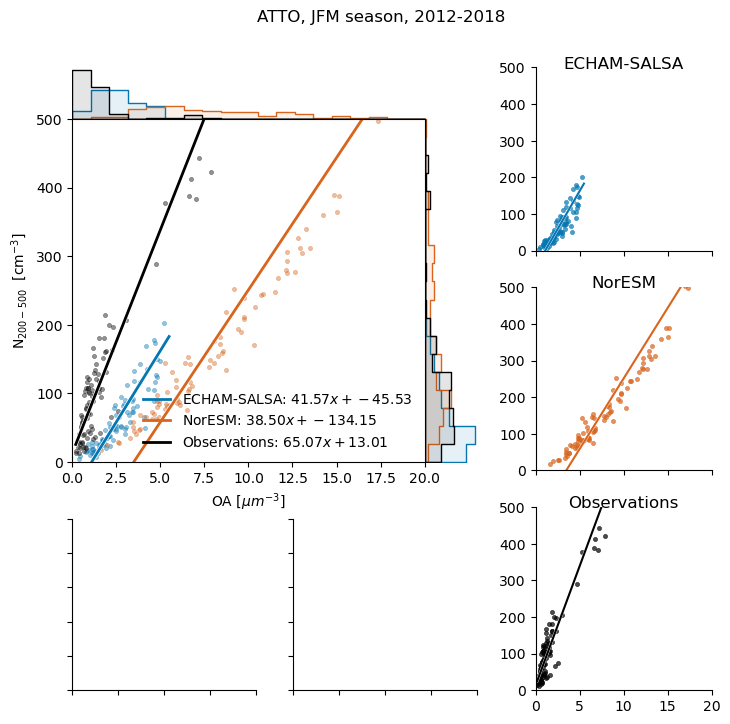

<Figure size 432x288 with 0 Axes>

<Figure size 432x288 with 0 Axes>

<Figure size 432x288 with 0 Axes>

In [101]:

## Settings
alpha_scatt = 0.5

## Settings
alpha_scatt = 0.5

ylab = r'N$_{200-500}$  [cm$^{-3}$]'
xlab = r'OA [$\mu m^{-3}$]'

season = 'JFM'
xlims = [0,20]

ylims = [0,500]

# OBS: 
v_x = 'OA'
v_y = 'N200-500'


xscale='linear'
yscale='linear'

fig, ax, daxs, axs_extra = make_cool_grid5()##ncols_extra=2, nrows_extra=2,)# w_ratio_sideplot=.5)
axs_extra = axs_extra.flatten()

## Settings
alpha_scatt = 0.6



# Make plot
make_plot(v_x, v_y, xlims, ylims, season, 
          xlab, ylab, .3, models_and_obs, fig, ax, daxs, axs_extra,
          yscale=yscale,
          xscale=xscale,
         )


for mo, ax_ex in zip(models_and_obs, axs_extra[:]):
    df_s =  dic_df_med[mo]
    print(mo)
    mask_months = select_months(df_s, season=season)
    df_s = df_s[mask_months].copy()
    print(len(df_s))
    popt, pov, label, func = get_odr_fit_and_labs(df_s,v_x,v_y, fit_func='linear', return_func=True)
    
    _mi = df_s[v_x].min()
    _ma = df_s[v_x].max() 
    _xlim = [_mi*.95, _ma*1.05]
    x = np.linspace(*_xlim,1000)
    ax.plot(x, func(x, *popt), c='w', linewidth=3,label='__nolegend__')
    ax.plot(x, func(x, *popt), linewidth=2, c=cdic_model[mo],label=f'{mo}: {label}')

    ax_ex.plot(x, func(x, *popt), c='w', linewidth=2,label=f'{mo}: {label}',
             )
    ax_ex.plot(x, func(x, *popt), c=cdic_model[mo],label=f'{mo}: {label}',
              )    
    ax_ex.set_yscale(yscale)
    ax_ex.set_xscale(xscale)


ax.set_yscale(yscale)
ax.set_xscale(xscale)


    
fn = make_fn_scat(f'lin1_{season}', v_x, v_y)
ax.legend(frameon=False)
fig.savefig(fn, dpi=150)
fig.savefig(fn.with_suffix('.pdf'), dpi=150)

#### SON

(0.0, 26.25)
(0.0, 26.25)
(0.0, 27.3)
ECHAM-SALSA
273
Beta: [ 29.1792582  -54.78793773]
Beta Std Error: [ 1.78935203 11.89616853]
Beta Covariance: [[  2.08385683 -12.99490331]
 [-12.99490331  92.10654949]]
Residual Variance: 1.5364686504297809
Inverse Condition #: 0.04768806550236637
Reason(s) for Halting:
  Sum of squares convergence
[ 29.1792582  -54.78793773]
NorESM
273
Beta: [  43.72997408 -168.06244554]
Beta Std Error: [ 0.61358652 11.36551801]
Beta Covariance: [[  0.41212134  -6.93064416]
 [ -6.93064416 141.40082677]]
Residual Variance: 0.9135377955763929
Inverse Condition #: 0.022028975650275333
Reason(s) for Halting:
  Sum of squares convergence
[  43.72997408 -168.06244554]
Observations
273
Beta: [ 71.47619591 -41.10528973]
Beta Std Error: [ 4.85583857 25.97408587]
Beta Covariance: [[ 12.86941789 -62.3280655 ]
 [-62.3280655  368.22304607]]
Residual Variance: 1.8321860724893217
Inverse Condition #: 0.07214990600571526
Reason(s) for Halting:
  Sum of squares convergence
[ 71.476

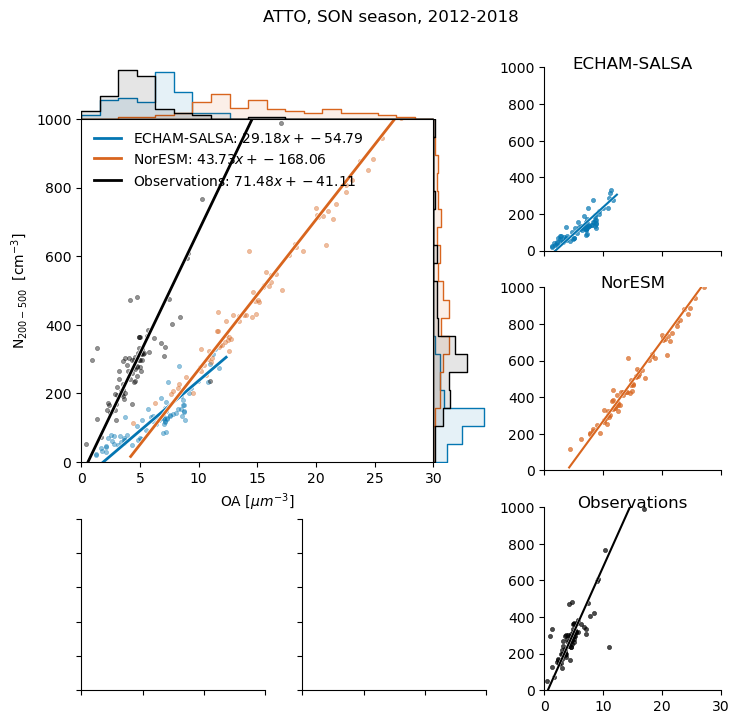

<Figure size 432x288 with 0 Axes>

<Figure size 432x288 with 0 Axes>

<Figure size 432x288 with 0 Axes>

In [94]:

## Settings
alpha_scatt = 0.5

## Settings
alpha_scatt = 0.5

ylab = r'N$_{200-500}$  [cm$^{-3}$]'
xlab = r'OA [$\mu m^{-3}$]'

season = 'SON'
xlims = [0,20]

ylims = [0,500]
xlims = [0,30]

ylims = [0,1000]
# OBS: 
v_x = 'OA'
v_y = 'N200-500'


xscale='linear'
yscale='linear'

fig, ax, daxs, axs_extra = make_cool_grid5()##ncols_extra=2, nrows_extra=2,)# w_ratio_sideplot=.5)
axs_extra = axs_extra.flatten()

## Settings
alpha_scatt = 0.6



# Make plot
make_plot(v_x, v_y, xlims, ylims, season, 
          xlab, ylab, .3, models_and_obs, fig, ax, daxs, axs_extra,
          yscale=yscale,
          xscale=xscale,
         )


for mo, ax_ex in zip(models_and_obs, axs_extra[:]):
    df_s =  dic_df_med[mo]
    print(mo)
    mask_months = select_months(df_s, season=season)
    df_s = df_s[mask_months].copy()
    print(len(df_s))
    popt, pov, label, func = get_odr_fit_and_labs(df_s,v_x,v_y, fit_func='linear', return_func=True)
    
    _mi = df_s[v_x].min()
    _ma = df_s[v_x].max() 
    _xlim = [_mi*.95, _ma*1.05]
    x = np.linspace(*_xlim,1000)
    ax.plot(x, func(x, *popt), c='w', linewidth=3,label='__nolegend__')
    ax.plot(x, func(x, *popt), linewidth=2, c=cdic_model[mo],label=f'{mo}: {label}')

    ax_ex.plot(x, func(x, *popt), c='w', linewidth=2,label=f'{mo}: {label}',
             )
    ax_ex.plot(x, func(x, *popt), c=cdic_model[mo],label=f'{mo}: {label}',
              )    
    ax_ex.set_yscale(yscale)
    ax_ex.set_xscale(xscale)


ax.set_yscale(yscale)
ax.set_xscale(xscale)


    
fn = make_fn_scat(f'lin1_{season}', v_x, v_y)
ax.legend(frameon=False)
fig.savefig(fn, dpi=150)
fig.savefig(fn.with_suffix('.pdf'), dpi=150)

## Extra stuff

In [ ]:
case_mod

In [ ]:
mo= 'NorESM'
ca = case_mod
df_s = dic_df_mod_case[mo][ca]#.loc[mask_obs_ind_su]

(df_s['SOA']/df_s['OA']).plot()

In [ ]:
df_s['POA'] = df_s['OA']-df_s['SOA']

df_s[['POA','SOA']].resample('M').mean().plot.area(stacked=True, alpha=0.5, linewidth=0)

In [ ]:
mo= 'NorESM'
ca = case_mod
df_s = dic_df_mod_case[mo][ca]#.loc[mask_obs_ind_su]

(df_s['SOA']/df_s['OA']).plot()

In [ ]:
mo= 'NorESM'
ca = case_mod
df_s = dic_df_mod_case[mo][ca]#.loc[mask_obs_ind_su]

(df_s['OA']).plot()

In [ ]:
mo= 'ECHAM-SALSA'
ca = case_name_echam
df_s = dic_df_mod_case[mo][ca]#.loc[mask_obs_ind_su]

#(df_s['SOA']/df_s['OA']).plot()

df_s['OA'].plot()
df_s['OAG'].plot(alpha=.5)

In [ ]:
df_s.columns

In [ ]:
mo= 'ECHAM-SALSA'
ca = case_name_echam
df_s = dic_df_mod_case[mo][ca]#.loc[mask_obs_ind_su]

#(df_s['SOA']/df_s['OA']).plot()

df_s['OA'].plot()
df_s['OAG'].plot(alpha=.5)

In [ ]:
mo= 'NorESM'
ca = case_mod
df_s = dic_df_mod_case[mo][ca]#.loc[mask_obs_ind_su]




seas = 'WET_early'
month_ma = select_months(df_s, season=seas)
_df = df_s[month_ma]
(_df['SOA']/_df['OA']).plot(label=seas, alpha=.4)


seas = 'WET_late'
month_ma = select_months(df_s, season=seas)
_df = df_s[month_ma]
(_df['SOA']/_df['OA']).plot(label=seas, alpha=.4)


seas = 'DRY_early'
month_ma = select_months(df_s, season=seas)
_df = df_s[month_ma]
(_df['SOA']/_df['OA']).plot(label=seas, alpha=.4)


seas = 'DRY_late'
month_ma = select_months(df_s, season=seas)
_df = df_s[month_ma]
(_df['SOA']/_df['OA']).plot(label=seas, alpha=.4)

plt.title('SOA/total OA')
plt.legend()

In [ ]:
mo= 'NorESM'
ca = case_mod
df_s = dic_df_mod_case[mo][ca]#.loc[mask_obs_ind_su]




seas = 'WET_early'
month_ma = select_months(df_s, season=seas)
_df = df_s[month_ma]
(_df['OA']).plot(label=seas, alpha=.4)


seas = 'WET_late'
month_ma = select_months(df_s, season=seas)
_df = df_s[month_ma]
(_df['OA']).plot(label=seas, alpha=.4)


seas = 'DRY_early'
month_ma = select_months(df_s, season=seas)
_df = df_s[month_ma]
(_df['OA']).plot(label=seas, alpha=.4)


seas = 'DRY_late'
month_ma = select_months(df_s, season=seas)
_df = df_s[month_ma]
(_df['OA']).plot(label=seas, alpha=.4)
plt.title('OA')

plt.legend()

In [ ]:
mo= 'NorESM'
ca = case_mod
df_s = dic_df_mod_case[mo][ca]#.loc[mask_obs_ind_su]




seas = 'WET_early'
month_ma = select_months(df_s, season=seas)
_df = df_s[month_ma]
(_df['SOA']).plot(label=seas, alpha=.4)


seas = 'WET_late'
month_ma = select_months(df_s, season=seas)
_df = df_s[month_ma]
(_df['SOA']).plot(label=seas, alpha=.4)


seas = 'DRY_early'
month_ma = select_months(df_s, season=seas)
_df = df_s[month_ma]
(_df['SOA']).plot(label=seas, alpha=.4)


seas = 'DRY_late'
month_ma = select_months(df_s, season=seas)
_df = df_s[month_ma]
(_df['SOA']).plot(label=seas, alpha=.4)


plt.legend()
plt.title('SOA')

In [ ]:
month_ma = select_months(df_s, season='WET_early')

_df = df_s[month_ma]
(_df['SOA']/_df['OA']).plot()

In [ ]:
month_ma = select_months(df_s, season='WET')

_df = df_s[month_ma]
(_df['SOA']/_df['OA']).plot()

In [ ]:
month_ma = select_months(df_s, season='DRY')

_df = df_s[month_ma]
(_df['SOA']/_df['OA']).plot()